In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cvxpy as cp

sns.set()

## First, Load the Data

In [2]:
path_to_prices = r'C:\Users\Rafay\Documents\thesis\ActualWork\Data\results\prices.csv'
path_to_factors = r'C:\Users\Rafay\Documents\thesis\ActualWork\Data\results\3factors.csv'
prices = pd.read_csv(path_to_prices)
factors = pd.read_csv(path_to_factors)
assets_list = list(prices['symbol'].unique())
prices.head()

,Unnamed: 0,symbol,date,open,high,low,close,volume,adjclose,splits,dividends
0,0,AMZN,2006-01-03,2.3735,2.3925,2.3125,2.3790,151644000,2.3790,0.0,0.0
1,1,AMZN,2006-01-04,2.3745,2.3865,2.3345,2.3625,148818000,2.3625,0.0,0.0
2,2,AMZN,2006-01-05,2.3580,2.4100,2.3555,2.3825,108344000,2.3825,0.0,0.0
3,3,AMZN,2006-01-06,2.3985,2.4290,2.3660,2.3935,123058000,2.3935,0.0,0.0
4,4,AMZN,2006-01-09,2.3275,2.3550,2.3200,2.3540,178862000,2.3540,0.0,0.0


In [3]:
pivot_prices = np.round(pd.pivot_table(prices, values='close', 
                                index='date', 
                                columns='symbol', 
                                aggfunc=np.mean),2)
pivot_prices = pivot_prices.reset_index()
pivot_prices['date'] = pd.to_datetime(pivot_prices['date'])
factors['date'] = pd.to_datetime(factors['Date'], format="%Y%m%d")

pivot_prices.head()

symbol,date,A,AAPL,ABB,ABT,ACN,ADBE,ADI,ADP,ADSK,...,WELL,WFC,WM,WMB,WPC,WTRG,WY,XEL,XOM,YUM
0,2006-01-03,23.96,2.67,10.19,18.98,29.30,38.52,36.70,36.74,42.75,...,34.55,31.90,30.67,19.48,25.74,22.05,66.64,18.57,58.47,16.80
1,2006-01-04,24.03,2.68,10.48,19.00,29.46,38.42,37.04,36.86,42.52,...,34.92,31.53,30.27,19.61,26.14,22.15,68.25,18.66,58.57,16.95
2,2006-01-05,24.66,2.66,10.55,19.25,29.68,38.07,38.22,36.55,41.87,...,35.64,31.50,30.39,19.40,27.20,22.31,67.65,18.65,58.28,17.67
3,2006-01-06,24.79,2.72,10.64,19.62,31.15,39.00,38.37,36.87,44.29,...,35.79,31.68,30.54,19.48,26.62,22.44,67.75,18.72,59.43,17.62
4,2006-01-09,24.71,2.72,10.95,20.35,31.06,38.38,38.91,36.77,43.64,...,36.30,31.67,31.04,19.79,27.00,22.50,67.59,18.67,59.40,17.76


In [4]:
pivot_prices = pivot_prices.set_index('date')
returns = pivot_prices.pct_change()
pivot_prices = pivot_prices.reset_index()
returns = returns.reset_index()
returns = returns.merge(factors, on='date', how='left')
returns = returns.drop(['Date'], axis=1)
returns = returns.dropna()
returns.describe()

,A,AAPL,ABB,ABT,ACN,ADBE,ADI,ADP,ADSK,AEE,...,WPC,WTRG,WY,XEL,XOM,YUM,Mkt-RF,SMB,HML,RF
count,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,...,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000
mean,0.000617,0.001254,0.000483,0.000558,0.000711,0.000904,0.000556,0.000519,0.000814,0.000212,...,0.000423,0.000321,0.000162,0.000415,0.000049,0.000648,0.030220,-0.005257,-0.011089,0.004483
std,0.019759,0.020795,0.020749,0.013860,0.016458,0.021275,0.019470,0.014627,0.024392,0.014647,...,0.017828,0.015733,0.024531,0.012631,0.016720,0.017376,1.051192,0.425688,0.414513,0.007001
min,-0.110117,-0.179039,-0.176218,-0.097857,-0.134543,-0.190346,-0.166149,-0.152526,-0.158599,-0.173750,...,-0.177856,-0.129066,-0.618934,-0.126918,-0.139525,-0.188261,-9.610000,-5.390000,-3.110000,0.000000
25%,-0.008193,-0.008296,-0.008518,-0.006159,-0.006860,-0.008508,-0.008628,-0.005821,-0.011073,-0.006411,...,-0.006701,-0.007085,-0.009605,-0.005654,-0.007461,-0.007099,-0.380000,-0.210000,-0.210000,0.000000
50%,0.000953,0.000809,0.000895,0.000395,0.000966,0.001173,0.000623,0.000764,0.001043,0.000582,...,0.000487,0.000767,0.000593,0.000557,0.000000,0.000632,0.080000,0.010000,-0.020000,0.000000
75%,0.010247,0.011663,0.010005,0.007652,0.008430,0.010885,0.009898,0.007501,0.012529,0.007422,...,0.007561,0.007984,0.010542,0.006963,0.007675,0.008395,0.510000,0.210000,0.180000,0.010000
max,0.138682,0.138728,0.219495,0.109360,0.163668,0.177193,0.156463,0.118576,0.161985,0.178014,...,0.206257,0.196295,0.253155,0.112577,0.171905,0.232484,9.200000,2.360000,4.160000,0.020000


In [6]:
'''
Inputs: AssetReturns: Pandas DataFrame, each date is a row, one column for each asset
        FactorReturn: Pandas DataFrame, each date is a row, one column for each factor
        Technique: Method through which parameters will be estimated. Default: OLS
Outputs: mu: numpy array, key: Symbol. value: return estimate
         Q: nxn Asset Covariance Matrix (n: # of assets)
'''
def GetParameterEstimates(AssetReturns, FactorReturns, technique='OLS', log=True):
    # Only have OLS implemented so far
    if technique!='OLS':
        return [], []
    
    AssetReturns_np = AssetReturns.to_numpy()
    FactorReturns_np = FactorReturns.to_numpy()
    T,n = AssetReturns_np.shape
    _, p = FactorReturns.shape

    # Get Data Matrix - Factors
    X = np.zeros((T, p+1))
    X[:,:-1] = np.ones((T,1)) # Add ones to first row
    X[:,1:] = FactorReturns

    # Get regression coefficients for Assets
    # B = (X^TX)^(-1)X^Ty
    B = np.matmul(np.linalg.inv((np.matmul(np.transpose(X), X))), (np.matmul(np.transpose(X), AssetReturns_np)))

    # Get alpha and betas
    a = np.transpose(B[0,:])
    V = B[1:(p+1),:]

    # Residual Variance to get D
    ep = AssetReturns_np - np.matmul(X, B)
    sigma_ep = 1/(T-p-1) * np.sum(np.square(ep), axis=0)
    D = np.diag(sigma_ep)

    # Get Factor Estimated Return and Covariance Matrix
    f_bar = np.transpose(np.mean(FactorReturns_np, axis=0))
    F = np.cov(FactorReturns_np, rowvar=False)

    # Get mu
    mu = a + np.matmul(np.transpose(V), f_bar)

    # Get Q
    Q = np.matmul(np.matmul(np.transpose(V), F), V) + D

    # Make sure Q is PSD
    w,v = np.linalg.eig(Q)
    min_eig = np.min(w)


    if min_eig<0:
        Q -= min_eig*np.identity(n)

    print(Q)
    
    if log:
        print("Shape of X: {}".format(X.shape))
        print("Shape of B: {}".format(B.shape))
        print("Shape of X*B: {}".format(np.matmul(X, B).shape))
        print("Shape of ep: {}".format(ep.shape))
        print("Shape of sigma_ep: {}".format(sigma_ep.shape))
        print("Shape of D: {}".format(sigma_ep.shape))
        print("Shape of Q: {}".format(Q.shape))
    
    return mu, Q


TypeError: GetParameterEstimates() missing 2 required positional arguments: 'AssetReturns' and 'FactorReturns'

In [24]:
'''
Mean Variance Optimizer
Inputs: mu: numpy array, key: Symbol. value: return estimate
        Q: nxn Asset Covariance Matrix (n: # of assets)
Outputs: x: optimal allocations
'''

def MVO(mu,Q):
    
    # # of Assets
    n = len(mu)

    # Decision Variables
    w = cp.Variable(n)
    
    # Target Return for Constraint
    targetRet = np.mean(mu)
    
    constraints = [
        cp.sum(w) == 1, # Sum to 1
        mu.T @ w >= targetRet, # Target Return Constraint
        w>=0 # Disallow Short Sales
    ]

    # Objective Function
    risk = cp.quad_form(w, Q)

    prob = cp.Problem(cp.Minimize(risk), constraints=constraints)
    prob.solve()
    return w.value

'''
Risk Parity Optimizer
Inputs: mu: numpy array, key: Symbol. value: return estimate
        Q: nxn Asset Covariance Matrix (n: # of assets)
Outputs: x: optimal allocations
'''

def RP(mu,Q):
    
    # # of Assets
    n = len(mu)

    # Decision Variables
    w = cp.Variable(n)

    # Kappa
    k = 2
          
    constraints = [
        w>=0 # Disallow Short Sales
    ]

    # Objective Function
    risk = cp.quad_form(w, Q)
    log_term = 0
    for i in range(n):
        log_term += cp.log(w[i])
    
    prob = cp.Problem(cp.Minimize(risk-(k*log_term)), constraints=constraints)
    
    # ECOS fails sometimes, if it does then do SCS
    try:
        prob.solve(verbose=False)
    except:
        prob.solve(solver='SCS',verbose=False)
    x = w.value
    x = np.divide(x, np.sum(x))
    return x


'''
Distributionally Robust Risk Parity With Wasserstein Distance Optimizer
Inputs: mu: numpy array, key: Symbol. value: return estimate
        Q: nxn Asset Covariance Matrix (n: # of assets)
Outputs: x: optimal allocations

Formula:
    \min_{\boldsymbol{\phi} \in \mathcal{X}} {(\sqrt{\boldsymbol{\phi}^T \Sigma_{\mathcal{P}}(R)\boldsymbol{\phi}} + \sqrt{\delta}||\boldsymbol{\phi}||_p)^2} - c\sum_{i=1}^n ln(y)

'''
import math
def DRRPW(mu,Q):
    
    # # of Assets
    n = len(mu)

    # Decision Variables
    w = cp.Variable(n)

    # Kappa
    k = 2

    # Size of uncertainty set
    delta = 0.05

    # Norm for x
    p = 2

    constraints = [
        w>=0 # Disallow Short Sales
    ]

    # risk = cp.quad_form(w, Q)

    log_term = 0
    for i in range(n):
        log_term += cp.log(w[i])
    
    # We need to compute \sqrt{x^T Q x} intelligently because
    # cvxpy does not compute well with the \sqrt

    # To do this, I will take the Cholesky decomposition
    # Q = LL^T
    # Then, take the 2-norm of L*x

    # Idea: (L_1 * x_1)^2 = Q_1 x_1

    L = np.linalg.cholesky(Q)

    obj = cp.power(cp.norm(L@w,2) + math.sqrt(delta)*cp.norm(w, p),2)
    obj = obj - k*log_term

    prob = cp.Problem(cp.Minimize(obj), constraints=constraints)
    
    # ECOS fails sometimes, if it does then do SCS
    try:
        prob.solve(verbose=False)
    except:
        prob.solve(solver='SCS',verbose=False)
    
    x = w.value
    x = np.divide(x, np.sum(x))
    
    # Check Risk Parity Condition is actually met
    risk_contrib = np.multiply(x, Q.dot(x))
    # print("DRRPW Worked? {}".format(np.all(np.isclose(risk_contrib, risk_contrib[0]))))

    return x


In [8]:
from datetime import datetime

def generate_date_list(data, start, end):
    start = datetime.fromisoformat(start)
    end = datetime.fromisoformat(end)

    # Train model from start_date to date
    mask = (data['date'] >= start) & (data['date'] <= end)
    data = data.loc[mask]
    return data.date.apply(lambda x: x.date()).unique().tolist()

In [9]:
from enum import Enum
class Optimizers(Enum):
    MVO = 1
    RP = 2
    DRRPW = 3
    
def GetOptimalAllocation(mu, Q, technique=Optimizers.MVO):
    if technique == Optimizers.MVO:
        return MVO(mu,Q)
    if technique == Optimizers.RP:
        return RP(mu, Q)
    if technique == Optimizers.DRRPW:
        return DRRPW(mu, Q)
    


In [20]:
portVal

,date,Wealth
0,2007-01-03,1.000000e+06
1,2007-01-04,4.456809e+09
2,2007-01-05,2.102627e+13
3,2007-01-08,1.013757e+17
4,2007-01-09,4.511221e+20
...,...,...
246,2007-12-24,inf
247,2007-12-26,inf
248,2007-12-27,inf
249,2007-12-28,inf


In [34]:
from tqdm import tqdm
from functools import partial
tqdm = partial(tqdm, position=0, leave=True)

date = '2017-06-12'
assets_list_cleaned = [x for x in assets_list if str(x) != 'nan']
holdings = pd.DataFrame(columns=['date']+assets_list_cleaned)
portVal = pd.DataFrame(columns=['date', 'Wealth'])
factors = ['Mkt-RF', 'SMB', 'HML']
InitialValue = 1000000 # $1,000,000
lookback = 30 # Number of days preceeding current date to train
RP
# opt_type = Optimizers.DRRPW
opt_type = Optimizers.RP

dates = generate_date_list(returns, start='2007-01-01', end='2007-12-31')
first = True
for date in tqdm(dates):
    # Get Asset Prices for Today
    currentPrices = (pivot_prices[pivot_prices['date']==str(date)]
        .drop('date',axis=1)
        .values
        .flatten())
    
    # Update Portfolio Value
    if first:
        portVal.loc[len(portVal)] = [date] + [InitialValue]
        CurrentPortfolioValue = InitialValue
        first = False
    else:     
        CurrentPortfolioValue = np.dot(currentPrices,noShares)
        portVal.loc[len(portVal)] = [date] + [CurrentPortfolioValue]
        
    # We don't want the current date information, hence the lack of equality
    # Get last 30
    date = str(date)
    
    returns_lastn = returns[(returns['date'] < date)].tail(lookback)
    factor_returns = returns_lastn[factors]
    asset_returns = returns_lastn.drop(factors + ['date', 'RF'], axis=1)

    mu, Q = GetParameterEstimates(asset_returns, factor_returns, log=False)
    
    x = GetOptimalAllocation(mu, Q, opt_type)
    # x = np.ones(len(mu)) / len(mu)
    # Update Holdings
    holdings.loc[len(holdings)] = [date] + list(x)

    # Update shares held
    # 50% of 100k = 50k. If price is 100 we have 50,000/100=50 shares
    noShares = np.divide(x*CurrentPortfolioValue, currentPrices)
    print('Done {}'.format(date))
portVal['date'] = pd.to_datetime(portVal['date'])
portVal.merge(returns[['date','RF']], how='left', on='date')
# drrpw=portVal
rp=portVal
# ew = portVal


  0%|          | 0/251 [00:00<?, ?it/s]

[[1.31563924e-04 4.78923376e-06 3.36168943e-05 ... 1.72207348e-05
  2.24191911e-05 2.68483760e-05]
 [4.78923376e-06 3.85101982e-04 2.40320162e-05 ... 2.00440514e-06
  1.09435614e-05 3.71502250e-05]
 [3.36168943e-05 2.40320162e-05 1.39812229e-04 ... 2.69702181e-05
  4.42076950e-05 4.98815308e-05]
 ...
 [1.72207348e-05 2.00440514e-06 2.69702181e-05 ... 3.35858421e-05
  1.93967023e-05 1.94395908e-05]
 [2.24191911e-05 1.09435614e-05 4.42076950e-05 ... 1.93967023e-05
  2.09528724e-04 3.25638684e-05]
 [2.68483760e-05 3.71502250e-05 4.98815308e-05 ... 1.94395908e-05
  3.25638684e-05 1.89101937e-04]]


  0%|          | 1/251 [00:00<03:40,  1.13it/s]

Done 2007-01-03
[[ 1.34602772e-04  6.83311890e-06  4.07130779e-05 ...  1.64788052e-05
   3.26751517e-05  2.87602121e-05]
 [ 6.83311890e-06  3.76470952e-04  3.13491750e-05 ... -2.08396111e-06
   2.72663286e-05  3.47070194e-05]
 [ 4.07130779e-05  3.13491750e-05  1.42912596e-04 ...  2.19747298e-05
   5.55848433e-05  5.04630097e-05]
 ...
 [ 1.64788052e-05 -2.08396111e-06  2.19747298e-05 ...  4.00724173e-05
   1.76167280e-05  1.38424329e-05]
 [ 3.26751517e-05  2.72663286e-05  5.55848433e-05 ...  1.76167280e-05
   2.18669458e-04  4.16125315e-05]
 [ 2.87602121e-05  3.47070194e-05  5.04630097e-05 ...  1.38424329e-05
   4.16125315e-05  1.82993370e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
  1%|          | 2/251 [00:01<03:23,  1.23it/s]

Done 2007-01-04
[[ 1.34699819e-04  6.52758946e-06  4.40047093e-05 ...  1.58373360e-05
   3.44966712e-05  2.89767218e-05]
 [ 6.52758946e-06  3.95675063e-04  1.42540173e-05 ... -2.99990702e-06
   2.11447882e-05  3.26721432e-05]
 [ 4.40047093e-05  1.42540173e-05  1.83569319e-04 ...  2.62674560e-05
   6.35693875e-05  4.86561193e-05]
 ...
 [ 1.58373360e-05 -2.99990702e-06  2.62674560e-05 ...  3.94909039e-05
   2.00203732e-05  1.43959999e-05]
 [ 3.44966712e-05  2.11447882e-05  6.35693875e-05 ...  2.00203732e-05
   2.30851098e-04  4.16649718e-05]
 [ 2.89767218e-05  3.26721432e-05  4.86561193e-05 ...  1.43959999e-05
   4.16649718e-05  1.78322474e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
  1%|          | 3/251 [00:02<03:30,  1.18it/s]

Done 2007-01-05
[[ 1.38011136e-04  6.97781100e-06  5.02526627e-05 ...  2.25352538e-05
   3.31456593e-05  2.97917964e-05]
 [ 6.97781100e-06  3.95038324e-04  2.28921043e-05 ... -2.41403294e-06
   2.53056773e-05  4.07495545e-05]
 [ 5.02526627e-05  2.28921043e-05  1.97813283e-04 ...  4.13697252e-05
   5.84018449e-05  5.73812525e-05]
 ...
 [ 2.25352538e-05 -2.41403294e-06  4.13697252e-05 ...  5.51667198e-05
   2.33405748e-05  2.04321246e-05]
 [ 3.31456593e-05  2.53056773e-05  5.84018449e-05 ...  2.33405748e-05
   2.31098445e-04  3.92964580e-05]
 [ 2.97917964e-05  4.07495545e-05  5.73812525e-05 ...  2.04321246e-05
   3.92964580e-05  1.71559941e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
  2%|▏         | 4/251 [00:03<03:22,  1.22it/s]

Done 2007-01-08
[[ 1.38079739e-04  6.99137795e-06  5.13153490e-05 ...  2.22014737e-05
   3.18913701e-05  3.05661324e-05]
 [ 6.99137795e-06  3.75837191e-04  1.83551601e-05 ... -3.03061177e-06
   2.17645230e-05  3.75752371e-05]
 [ 5.13153490e-05  1.83551601e-05  2.04250924e-04 ...  4.17134805e-05
   5.62014024e-05  5.72811997e-05]
 ...
 [ 2.22014737e-05 -3.03061177e-06  4.17134805e-05 ...  5.50311393e-05
   2.20878014e-05  2.01999780e-05]
 [ 3.18913701e-05  2.17645230e-05  5.62014024e-05 ...  2.20878014e-05
   2.27441626e-04  3.75431476e-05]
 [ 3.05661324e-05  3.75752371e-05  5.72811997e-05 ...  2.01999780e-05
   3.75431476e-05  1.71392546e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
  2%|▏         | 5/251 [00:04<03:32,  1.16it/s]

Done 2007-01-09
[[ 1.35975528e-04  1.72157682e-05  5.32776790e-05 ...  2.29353026e-05
   3.84753968e-05  3.46637995e-05]
 [ 1.72157682e-05  6.34324905e-04  4.79724875e-06 ... -3.08366245e-06
   3.59221315e-05  3.23186786e-05]
 [ 5.32776790e-05  4.79724875e-06  2.00398622e-04 ...  4.24322458e-05
   5.75048011e-05  5.08067081e-05]
 ...
 [ 2.29353026e-05 -3.08366245e-06  4.24322458e-05 ...  5.49159712e-05
   2.38951759e-05  2.10604807e-05]
 [ 3.84753968e-05  3.59221315e-05  5.75048011e-05 ...  2.38951759e-05
   2.26716015e-04  4.17150507e-05]
 [ 3.46637995e-05  3.23186786e-05  5.08067081e-05 ...  2.10604807e-05
   4.17150507e-05  1.66011057e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
  2%|▏         | 6/251 [00:05<03:31,  1.16it/s]

Done 2007-01-10
[[ 1.38334583e-04  4.21700452e-06  5.57301181e-05 ...  2.45940942e-05
   3.92550820e-05  3.19905255e-05]
 [ 4.21700452e-06  6.96789946e-04  7.67054013e-07 ... -1.28290436e-06
   2.20250790e-05  4.70702234e-05]
 [ 5.57301181e-05  7.67054013e-07  1.98955983e-04 ...  3.73057378e-05
   6.27905814e-05  4.65467500e-05]
 ...
 [ 2.45940942e-05 -1.28290436e-06  3.73057378e-05 ...  5.61163629e-05
   2.62028161e-05  1.94760090e-05]
 [ 3.92550820e-05  2.20250790e-05  6.27905814e-05 ...  2.62028161e-05
   2.33241694e-04  3.96515299e-05]
 [ 3.19905255e-05  4.70702234e-05  4.65467500e-05 ...  1.94760090e-05
   3.96515299e-05  1.70628671e-04]]


  3%|▎         | 7/251 [00:06<03:34,  1.14it/s]

Done 2007-01-11
[[ 1.08640612e-04 -2.06361478e-05  2.94752570e-05 ...  1.33856179e-05
   2.59087458e-05  1.06001862e-05]
 [-2.06361478e-05  6.87366773e-04 -3.03046612e-05 ... -1.54074658e-05
  -1.84937731e-06  2.80702387e-05]
 [ 2.94752570e-05 -3.03046612e-05  1.75629108e-04 ...  2.59198235e-05
   5.50879783e-05  2.28879362e-05]
 ...
 [ 1.33856179e-05 -1.54074658e-05  2.59198235e-05 ...  5.29880667e-05
   2.28712423e-05  9.04337510e-06]
 [ 2.59087458e-05 -1.84937731e-06  5.50879783e-05 ...  2.28712423e-05
   2.32100290e-04  3.20253317e-05]
 [ 1.06001862e-05  2.80702387e-05  2.28879362e-05 ...  9.04337510e-06
   3.20253317e-05  1.46009113e-04]]


  3%|▎         | 8/251 [00:06<03:27,  1.17it/s]

Done 2007-01-12
[[ 1.09406469e-04 -2.12961502e-05  2.85684163e-05 ...  1.19288683e-05
   2.51439028e-05  9.43900224e-06]
 [-2.12961502e-05  6.75509174e-04 -3.47207706e-05 ... -1.95469973e-05
  -1.69856304e-05  1.78309867e-05]
 [ 2.85684163e-05 -3.47207706e-05  2.00409036e-04 ...  2.34910802e-05
   7.23637060e-05  2.54543897e-05]
 ...
 [ 1.19288683e-05 -1.95469973e-05  2.34910802e-05 ...  5.43931011e-05
   2.00223440e-05  5.55767549e-06]
 [ 2.51439028e-05 -1.69856304e-05  7.23637060e-05 ...  2.00223440e-05
   2.31354186e-04  2.90542813e-05]
 [ 9.43900224e-06  1.78309867e-05  2.54543897e-05 ...  5.55767549e-06
   2.90542813e-05  1.37738508e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
  4%|▎         | 9/251 [00:07<03:20,  1.21it/s]

Done 2007-01-16
[[ 9.48881248e-05 -2.70303232e-05  3.86278519e-05 ...  1.22990262e-05
   3.50332749e-05  1.80431659e-05]
 [-2.70303232e-05  6.97707894e-04 -4.18252578e-05 ... -1.86068595e-05
  -2.21425280e-05  1.89526748e-05]
 [ 3.86278519e-05 -4.18252578e-05  1.82172585e-04 ...  1.62824568e-05
   5.47566205e-05  2.20615891e-05]
 ...
 [ 1.22990262e-05 -1.86068595e-05  1.62824568e-05 ...  5.33033841e-05
   1.32432497e-05  3.69959023e-06]
 [ 3.50332749e-05 -2.21425280e-05  5.47566205e-05 ...  1.32432497e-05
   2.12904119e-04  2.64954313e-05]
 [ 1.80431659e-05  1.89526748e-05  2.20615891e-05 ...  3.69959023e-06
   2.64954313e-05  1.38640622e-04]]


  4%|▍         | 10/251 [00:08<03:17,  1.22it/s]

Done 2007-01-17
[[ 1.10208873e-04 -3.23823201e-05  3.99647875e-05 ...  1.31835020e-05
   3.57013686e-05  1.58525347e-05]
 [-3.23823201e-05  7.22491434e-04 -3.75740876e-05 ... -1.68067091e-05
  -1.82425322e-05  1.37595213e-05]
 [ 3.99647875e-05 -3.75740876e-05  1.87548185e-04 ...  1.41852397e-05
   5.30555377e-05  2.53740552e-05]
 ...
 [ 1.31835020e-05 -1.68067091e-05  1.41852397e-05 ...  5.25121707e-05
   1.21346529e-05  3.82744445e-06]
 [ 3.57013686e-05 -1.82425322e-05  5.30555377e-05 ...  1.21346529e-05
   2.14514140e-04  2.85787461e-05]
 [ 1.58525347e-05  1.37595213e-05  2.53740552e-05 ...  3.82744445e-06
   2.85787461e-05  1.38431167e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
  4%|▍         | 11/251 [00:09<03:11,  1.26it/s]

Done 2007-01-18
[[ 1.24024479e-04 -3.02253937e-05  4.22534973e-05 ...  1.32376722e-05
   3.93775274e-05  1.77000064e-05]
 [-3.02253937e-05  8.70759735e-04 -3.01120837e-05 ... -1.59209835e-05
  -1.29125591e-05  2.05635159e-05]
 [ 4.22534973e-05 -3.01120837e-05  1.87551571e-04 ...  1.49746078e-05
   5.33956006e-05  2.63825831e-05]
 ...
 [ 1.32376722e-05 -1.59209835e-05  1.49746078e-05 ...  5.37988068e-05
   1.31742592e-05  4.29779526e-06]
 [ 3.93775274e-05 -1.29125591e-05  5.33956006e-05 ...  1.31742592e-05
   2.13250348e-04  2.99218252e-05]
 [ 1.77000064e-05  2.05635159e-05  2.63825831e-05 ...  4.29779526e-06
   2.99218252e-05  1.42809139e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
  5%|▍         | 12/251 [00:09<03:05,  1.29it/s]

Done 2007-01-19
[[ 1.20116086e-04 -3.13813202e-05  3.73109892e-05 ...  1.15418384e-05
   3.65962399e-05  1.25273127e-05]
 [-3.13813202e-05  8.71701321e-04 -3.03918590e-05 ... -1.64273512e-05
  -1.13700525e-05  1.98342492e-05]
 [ 3.73109892e-05 -3.03918590e-05  2.04550283e-04 ...  1.31277287e-05
   5.35848623e-05  2.01256845e-05]
 ...
 [ 1.15418384e-05 -1.64273512e-05  1.31277287e-05 ...  5.29414754e-05
   1.17685086e-05  2.52950905e-06]
 [ 3.65962399e-05 -1.13700525e-05  5.35848623e-05 ...  1.17685086e-05
   2.30887598e-04  2.77408379e-05]
 [ 1.25273127e-05  1.98342492e-05  2.01256845e-05 ...  2.52950905e-06
   2.77408379e-05  1.37808793e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
  5%|▌         | 13/251 [00:10<03:04,  1.29it/s]

Done 2007-01-22
[[ 1.11464247e-04 -2.54285379e-05  3.30997370e-05 ...  1.02944352e-05
   3.50147856e-05  6.17204844e-06]
 [-2.54285379e-05  8.81921904e-04 -2.56136078e-05 ... -1.78383562e-05
  -7.48363048e-06  3.16108440e-05]
 [ 3.30997370e-05 -2.56136078e-05  1.97856421e-04 ...  1.19189785e-05
   5.15920519e-05  1.49547916e-05]
 ...
 [ 1.02944352e-05 -1.78383562e-05  1.19189785e-05 ...  5.29436545e-05
   1.13766425e-05 -1.00585420e-06]
 [ 3.50147856e-05 -7.48363048e-06  5.15920519e-05 ...  1.13766425e-05
   2.31276072e-04  2.16815293e-05]
 [ 6.17204844e-06  3.16108440e-05  1.49547916e-05 ... -1.00585420e-06
   2.16815293e-05  1.06918847e-04]]


  6%|▌         | 14/251 [00:11<03:06,  1.27it/s]

Done 2007-01-23
[[ 1.12079395e-04 -2.74813188e-05  3.55340230e-05 ...  1.02086262e-05
   3.76157163e-05  6.49948930e-06]
 [-2.74813188e-05  8.79077846e-04 -3.07627185e-05 ... -1.82104674e-05
  -1.40733554e-05  3.02836125e-05]
 [ 3.55340230e-05 -3.07627185e-05  2.07167441e-04 ...  1.22962531e-05
   5.99640126e-05  1.67293196e-05]
 ...
 [ 1.02086262e-05 -1.82104674e-05  1.22962531e-05 ...  5.22132883e-05
   1.17890272e-05 -1.01459687e-06]
 [ 3.76157163e-05 -1.40733554e-05  5.99640126e-05 ...  1.17890272e-05
   2.34169673e-04  2.35248090e-05]
 [ 6.49948930e-06  3.02836125e-05  1.67293196e-05 ... -1.01459687e-06
   2.35248090e-05  1.00814808e-04]]


  6%|▌         | 15/251 [00:12<03:09,  1.25it/s]

Done 2007-01-24
[[ 1.11974857e-04 -2.08205672e-05  3.32814045e-05 ...  1.25759553e-05
   3.51168535e-05  7.87098519e-06]
 [-2.08205672e-05  8.51010200e-04 -2.45833973e-05 ... -1.68695051e-05
  -8.18884461e-06  2.87511700e-05]
 [ 3.32814045e-05 -2.45833973e-05  2.04642896e-04 ...  1.61255015e-05
   6.04503019e-05  1.88577162e-05]
 ...
 [ 1.25759553e-05 -1.68695051e-05  1.61255015e-05 ...  5.93330853e-05
   1.67772509e-05  1.16494593e-06]
 [ 3.51168535e-05 -8.18884461e-06  6.04503019e-05 ...  1.67772509e-05
   2.33415834e-04  2.53814409e-05]
 [ 7.87098519e-06  2.87511700e-05  1.88577162e-05 ...  1.16494593e-06
   2.53814409e-05  8.98207556e-05]]


  6%|▋         | 16/251 [00:13<03:07,  1.26it/s]

Done 2007-01-25
[[ 1.18706017e-04 -2.33230763e-05  4.59204455e-05 ...  1.55049287e-05
   4.69286538e-05  6.82935235e-06]
 [-2.33230763e-05  8.48116244e-04 -2.12772558e-05 ... -1.27816731e-05
  -4.39466323e-06  3.59591987e-05]
 [ 4.59204455e-05 -2.12772558e-05  2.14041722e-04 ...  1.81446048e-05
   7.18041916e-05  1.64094995e-05]
 ...
 [ 1.55049287e-05 -1.27816731e-05  1.81446048e-05 ...  5.92781877e-05
   1.91101047e-05  1.34776412e-06]
 [ 4.69286538e-05 -4.39466323e-06  7.18041916e-05 ...  1.91101047e-05
   2.44259903e-04  2.48932776e-05]
 [ 6.82935235e-06  3.59591987e-05  1.64094995e-05 ...  1.34776412e-06
   2.48932776e-05  7.34248986e-05]]


  7%|▋         | 17/251 [00:13<03:12,  1.22it/s]

Done 2007-01-26
[[ 1.22496320e-04 -2.95656155e-05  4.60087089e-05 ...  1.23679250e-05
   4.54343907e-05  5.23967940e-06]
 [-2.95656155e-05  8.44593281e-04 -2.85966172e-05 ... -9.66727611e-06
  -1.25400507e-05  4.19884421e-05]
 [ 4.60087089e-05 -2.85966172e-05  2.17798365e-04 ...  1.77421455e-05
   7.49015141e-05  1.58676076e-05]
 ...
 [ 1.23679250e-05 -9.66727611e-06  1.77421455e-05 ...  5.75549522e-05
   1.81813053e-05  2.15929046e-06]
 [ 4.54343907e-05 -1.25400507e-05  7.49015141e-05 ...  1.81813053e-05
   2.44304101e-04  2.22661041e-05]
 [ 5.23967940e-06  4.19884421e-05  1.58676076e-05 ...  2.15929046e-06
   2.22661041e-05  7.38210389e-05]]


  7%|▋         | 18/251 [00:14<03:16,  1.18it/s]

Done 2007-01-29
[[ 1.22968911e-04 -1.88135313e-05  4.30185743e-05 ...  1.11270477e-05
   4.04890905e-05  9.79689416e-06]
 [-1.88135313e-05  8.19356252e-04 -2.87179479e-05 ... -4.31152915e-06
   1.15027250e-07  2.03526006e-05]
 [ 4.30185743e-05 -2.87179479e-05  2.18212262e-04 ...  1.83962791e-05
   7.00009267e-05  1.69492312e-05]
 ...
 [ 1.11270477e-05 -4.31152915e-06  1.83962791e-05 ...  5.64681061e-05
   1.74209688e-05  6.08030108e-06]
 [ 4.04890905e-05  1.15027250e-07  7.00009267e-05 ...  1.74209688e-05
   2.39113290e-04  2.28418623e-05]
 [ 9.79689416e-06  2.03526006e-05  1.69492312e-05 ...  6.08030108e-06
   2.28418623e-05  5.06195382e-05]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
  8%|▊         | 19/251 [00:15<03:15,  1.19it/s]

Done 2007-01-30
[[ 1.23145757e-04 -1.73633242e-05  4.59793017e-05 ...  1.11091780e-05
   4.33354553e-05  1.02589516e-05]
 [-1.73633242e-05  7.78416358e-04 -3.73676378e-05 ... -4.89898435e-06
  -5.64670227e-06  1.89413830e-05]
 [ 4.59793017e-05 -3.73676378e-05  2.32696406e-04 ...  2.05331448e-05
   7.78193390e-05  1.76741328e-05]
 ...
 [ 1.11091780e-05 -4.89898435e-06  2.05331448e-05 ...  5.52424205e-05
   1.90274296e-05  6.01665376e-06]
 [ 4.33354553e-05 -5.64670227e-06  7.78193390e-05 ...  1.90274296e-05
   2.40560166e-04  2.33539645e-05]
 [ 1.02589516e-05  1.89413830e-05  1.76741328e-05 ...  6.01665376e-06
   2.33539645e-05  4.70164506e-05]]


  8%|▊         | 20/251 [00:16<03:07,  1.23it/s]

Done 2007-01-31
[[ 1.20946466e-04 -1.75310473e-05  4.39608328e-05 ...  9.62439533e-06
   3.92949010e-05  9.85969235e-06]
 [-1.75310473e-05  7.77250935e-04 -3.64845001e-05 ... -5.44845252e-06
  -1.05343625e-05  2.50974012e-05]
 [ 4.39608328e-05 -3.64845001e-05  2.31689242e-04 ...  1.86012748e-05
   7.16889891e-05  1.83274923e-05]
 ...
 [ 9.62439533e-06 -5.44845252e-06  1.86012748e-05 ...  5.33404278e-05
   1.55296262e-05  5.31075183e-06]
 [ 3.92949010e-05 -1.05343625e-05  7.16889891e-05 ...  1.55296262e-05
   2.27661349e-04  2.12503033e-05]
 [ 9.85969235e-06  2.50974012e-05  1.83274923e-05 ...  5.31075183e-06
   2.12503033e-05  5.51064900e-05]]


  8%|▊         | 21/251 [00:17<03:06,  1.23it/s]

Done 2007-02-01
[[ 1.22900270e-04 -1.89321431e-05  4.64516226e-05 ...  1.12196333e-05
   4.38535277e-05  7.65019882e-06]
 [-1.89321431e-05  7.77390600e-04 -4.21613129e-05 ... -1.00752491e-05
  -2.19603149e-05  2.63705012e-05]
 [ 4.64516226e-05 -4.21613129e-05  2.34144698e-04 ...  2.18547032e-05
   7.80347228e-05  1.26569668e-05]
 ...
 [ 1.12196333e-05 -1.00752491e-05  2.18547032e-05 ...  5.27604625e-05
   1.83598029e-05  3.77137376e-06]
 [ 4.38535277e-05 -2.19603149e-05  7.80347228e-05 ...  1.83598029e-05
   2.24506955e-04  1.59397606e-05]
 [ 7.65019882e-06  2.63705012e-05  1.26569668e-05 ...  3.77137376e-06
   1.59397606e-05  5.72510030e-05]]


  9%|▉         | 22/251 [00:18<03:01,  1.26it/s]

Done 2007-02-02
[[ 1.32730481e-04 -1.50421035e-05  4.76561886e-05 ...  9.51152636e-06
   4.17264839e-05  8.82943952e-06]
 [-1.50421035e-05  7.54410070e-04 -3.93646602e-05 ... -1.13823827e-05
  -3.13844446e-05  2.33842683e-05]
 [ 4.76561886e-05 -3.93646602e-05  2.13050876e-04 ...  1.99771612e-05
   8.09825004e-05  1.38711252e-05]
 ...
 [ 9.51152636e-06 -1.13823827e-05  1.99771612e-05 ...  5.04922285e-05
   1.89335545e-05  3.26153921e-06]
 [ 4.17264839e-05 -3.13844446e-05  8.09825004e-05 ...  1.89335545e-05
   2.06776596e-04  1.39796051e-05]
 [ 8.82943952e-06  2.33842683e-05  1.38711252e-05 ...  3.26153921e-06
   1.39796051e-05  5.69264702e-05]]


  9%|▉         | 23/251 [00:18<02:55,  1.30it/s]

Done 2007-02-05
[[ 1.35778143e-04 -1.05128147e-05  4.63052794e-05 ...  8.17376703e-06
   4.07084518e-05  9.66796495e-06]
 [-1.05128147e-05  7.54526874e-04 -3.77974487e-05 ... -7.88544289e-06
  -2.53414337e-05  2.39960481e-05]
 [ 4.63052794e-05 -3.77974487e-05  2.15832419e-04 ...  1.88886689e-05
   8.18871882e-05  1.44801363e-05]
 ...
 [ 8.17376703e-06 -7.88544289e-06  1.88886689e-05 ...  5.13566962e-05
   1.63990740e-05  3.49880108e-06]
 [ 4.07084518e-05 -2.53414337e-05  8.18871882e-05 ...  1.63990740e-05
   1.91907555e-04  1.53412412e-05]
 [ 9.66796495e-06  2.39960481e-05  1.44801363e-05 ...  3.49880108e-06
   1.53412412e-05  5.50901969e-05]]


 10%|▉         | 24/251 [00:19<02:56,  1.28it/s]

Done 2007-02-06
[[ 1.37580696e-04 -7.65250819e-06  4.84416754e-05 ...  1.02768067e-05
   4.39176796e-05  1.21920957e-05]
 [-7.65250819e-06  7.45672707e-04 -3.47973097e-05 ... -1.07400350e-05
  -1.90537857e-05  2.06047557e-05]
 [ 4.84416754e-05 -3.47973097e-05  2.18041109e-04 ...  2.41050328e-05
   8.26733284e-05  2.00787809e-05]
 ...
 [ 1.02768067e-05 -1.07400350e-05  2.41050328e-05 ...  5.57606228e-05
   1.82915888e-05  4.69201533e-06]
 [ 4.39176796e-05 -1.90537857e-05  8.26733284e-05 ...  1.82915888e-05
   1.86880548e-04  1.91119400e-05]
 [ 1.21920957e-05  2.06047557e-05  2.00787809e-05 ...  4.69201533e-06
   1.91119400e-05  6.33679352e-05]]


 10%|▉         | 25/251 [00:20<02:59,  1.26it/s]

Done 2007-02-07
[[ 1.49884303e-04 -4.08762101e-06  5.00654732e-05 ...  1.10542261e-05
   4.59461160e-05  1.41853505e-05]
 [-4.08762101e-06  7.44678202e-04 -3.91687891e-05 ... -9.34783655e-06
  -1.99149948e-05  1.50269766e-05]
 [ 5.00654732e-05 -3.91687891e-05  2.21567577e-04 ...  2.44475755e-05
   8.12427513e-05  1.84111552e-05]
 ...
 [ 1.10542261e-05 -9.34783655e-06  2.44475755e-05 ...  5.57145250e-05
   1.80782973e-05  5.05081844e-06]
 [ 4.59461160e-05 -1.99149948e-05  8.12427513e-05 ...  1.80782973e-05
   1.89666169e-04  1.80590342e-05]
 [ 1.41853505e-05  1.50269766e-05  1.84111552e-05 ...  5.05081844e-06
   1.80590342e-05  6.10415329e-05]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 10%|█         | 26/251 [00:21<02:57,  1.27it/s]

Done 2007-02-08
[[ 1.43256828e-04 -3.92078551e-06  4.44003369e-05 ...  7.93315472e-06
   4.10090373e-05  1.21225345e-05]
 [-3.92078551e-06  7.41965900e-04 -4.23776421e-05 ... -9.71515517e-06
  -2.03841819e-05  1.34168019e-05]
 [ 4.44003369e-05 -4.23776421e-05  2.25962705e-04 ...  2.10308575e-05
   7.80618024e-05  2.08475155e-05]
 ...
 [ 7.93315472e-06 -9.71515517e-06  2.10308575e-05 ...  5.49797678e-05
   1.47820210e-05  4.30612219e-06]
 [ 4.10090373e-05 -2.03841819e-05  7.80618024e-05 ...  1.47820210e-05
   1.92112088e-04  1.77100498e-05]
 [ 1.21225345e-05  1.34168019e-05  2.08475155e-05 ...  4.30612219e-06
   1.77100498e-05  6.08178397e-05]]


 11%|█         | 27/251 [00:21<02:52,  1.30it/s]

Done 2007-02-09
[[ 1.34563362e-04  2.43879685e-06  4.27370705e-05 ...  9.55820049e-06
   3.86986417e-05  1.33994651e-05]
 [ 2.43879685e-06  7.87107270e-04 -4.09201316e-05 ... -6.68602656e-06
  -1.29913138e-05  1.89080684e-05]
 [ 4.27370705e-05 -4.09201316e-05  2.25809288e-04 ...  2.18973788e-05
   7.70795723e-05  2.09155955e-05]
 ...
 [ 9.55820049e-06 -6.68602656e-06  2.18973788e-05 ...  5.62901701e-05
   1.68141387e-05  5.15497247e-06]
 [ 3.86986417e-05 -1.29913138e-05  7.70795723e-05 ...  1.68141387e-05
   1.89794923e-04  1.90775467e-05]
 [ 1.33994651e-05  1.89080684e-05  2.09155955e-05 ...  5.15497247e-06
   1.90775467e-05  6.19767462e-05]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 11%|█         | 28/251 [00:22<02:53,  1.29it/s]

Done 2007-02-12
[[ 1.24962944e-04  2.21630231e-06  3.21670694e-05 ...  7.12193115e-06
   3.10357594e-05  9.26259367e-06]
 [ 2.21630231e-06  8.00432748e-04 -4.70083849e-05 ... -7.93651546e-06
  -1.72433784e-05  1.70342012e-05]
 [ 3.21670694e-05 -4.70083849e-05  2.17199107e-04 ...  1.95870008e-05
   7.15081141e-05  1.47987267e-05]
 ...
 [ 7.12193115e-06 -7.93651546e-06  1.95870008e-05 ...  5.57052923e-05
   1.52970004e-05  3.65492455e-06]
 [ 3.10357594e-05 -1.72433784e-05  7.15081141e-05 ...  1.52970004e-05
   1.86320373e-04  1.48885163e-05]
 [ 9.26259367e-06  1.70342012e-05  1.47987267e-05 ...  3.65492455e-06
   1.48885163e-05  6.10921453e-05]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 12%|█▏        | 29/251 [00:23<02:47,  1.32it/s]

Done 2007-02-13
[[ 1.15140986e-04 -4.27863227e-06  4.01035694e-05 ...  9.71015567e-06
   3.68771724e-05  6.44624951e-06]
 [-4.27863227e-06  7.97964711e-04 -4.41609924e-05 ... -9.54117538e-06
  -1.93031765e-05  2.59783674e-05]
 [ 4.01035694e-05 -4.41609924e-05  2.18649586e-04 ...  2.31284198e-05
   7.60596374e-05  3.84442388e-06]
 ...
 [ 9.71015567e-06 -9.54117538e-06  2.31284198e-05 ...  5.70285175e-05
   1.83331350e-05  1.47644115e-06]
 [ 3.68771724e-05 -1.93031765e-05  7.60596374e-05 ...  1.83331350e-05
   1.90241749e-04  8.29198135e-06]
 [ 6.44624951e-06  2.59783674e-05  3.84442388e-06 ...  1.47644115e-06
   8.29198135e-06  7.29069266e-05]]


 12%|█▏        | 30/251 [00:24<02:52,  1.28it/s]

Done 2007-02-14
[[ 1.09569408e-04 -3.58510231e-06  4.11602373e-05 ...  9.03845609e-06
   3.53428459e-05  5.91833672e-06]
 [-3.58510231e-06  7.13675262e-04 -3.04022920e-05 ... -7.83625862e-06
  -1.73820282e-05  2.70605584e-05]
 [ 4.11602373e-05 -3.04022920e-05  2.45750351e-04 ...  2.56317082e-05
   8.06874388e-05  8.57528534e-06]
 ...
 [ 9.03845609e-06 -7.83625862e-06  2.56317082e-05 ...  5.60492172e-05
   1.76326534e-05  1.37090714e-06]
 [ 3.53428459e-05 -1.73820282e-05  8.06874388e-05 ...  1.76326534e-05
   1.87924235e-04  7.71978733e-06]
 [ 5.91833672e-06  2.70605584e-05  8.57528534e-06 ...  1.37090714e-06
   7.71978733e-06  7.24609290e-05]]


 12%|█▏        | 31/251 [00:25<02:59,  1.23it/s]

Done 2007-02-15
[[ 1.31870133e-04 -1.07956550e-05  3.38688546e-05 ...  1.20138750e-05
   3.04341112e-05  5.87149957e-06]
 [-1.07956550e-05  7.07639409e-04 -3.65230688e-05 ... -1.08052483e-06
  -3.41759565e-05  2.70017869e-05]
 [ 3.38688546e-05 -3.65230688e-05  2.91747214e-04 ...  2.63662942e-05
   6.43700264e-05  6.16675812e-06]
 ...
 [ 1.20138750e-05 -1.08052483e-06  2.63662942e-05 ...  4.79385174e-05
   1.73444194e-05  5.59813902e-06]
 [ 3.04341112e-05 -3.41759565e-05  6.43700264e-05 ...  1.73444194e-05
   1.48373267e-04  1.87489715e-06]
 [ 5.87149957e-06  2.70017869e-05  6.16675812e-06 ...  5.59813902e-06
   1.87489715e-06  7.30834734e-05]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 13%|█▎        | 32/251 [00:25<03:00,  1.21it/s]

Done 2007-02-16
[[ 1.67032344e-04 -5.50049607e-06  3.61709392e-05 ...  1.31356498e-05
   2.81231598e-05  6.30996466e-06]
 [-5.50049607e-06  6.89042323e-04 -2.04711812e-05 ...  2.05717345e-07
  -2.44171183e-05  2.77636537e-05]
 [ 3.61709392e-05 -2.04711812e-05  2.67096288e-04 ...  2.49132786e-05
   5.25679085e-05  7.92422151e-06]
 ...
 [ 1.31356498e-05  2.05717345e-07  2.49132786e-05 ...  4.79711459e-05
   1.63966344e-05  5.32913345e-06]
 [ 2.81231598e-05 -2.44171183e-05  5.25679085e-05 ...  1.63966344e-05
   1.34557595e-04  1.51116697e-06]
 [ 6.30996466e-06  2.77636537e-05  7.92422151e-06 ...  5.32913345e-06
   1.51116697e-06  7.27655552e-05]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 13%|█▎        | 33/251 [00:26<03:10,  1.15it/s]

Done 2007-02-20
[[ 1.66745273e-04 -1.04771383e-05  3.13796209e-05 ...  4.74028699e-06
   3.37978858e-05  2.02564693e-06]
 [-1.04771383e-05  6.93055466e-04 -2.63267078e-05 ... -2.60724734e-07
  -3.07083867e-05  3.57513979e-05]
 [ 3.13796209e-05 -2.63267078e-05  2.53484645e-04 ...  1.38035319e-05
   5.20244228e-05 -5.56976614e-06]
 ...
 [ 4.74028699e-06 -2.60724734e-07  1.38035319e-05 ...  3.09324643e-05
   7.21361832e-06  9.51301409e-07]
 [ 3.37978858e-05 -3.07083867e-05  5.20244228e-05 ...  7.21361832e-06
   1.32673954e-04 -2.84877579e-06]
 [ 2.02564693e-06  3.57513979e-05 -5.56976614e-06 ...  9.51301409e-07
  -2.84877579e-06  9.94479802e-05]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 14%|█▎        | 34/251 [00:27<03:05,  1.17it/s]

Done 2007-02-21
[[ 1.70088123e-04 -9.18051546e-06  2.72389390e-05 ...  3.98395097e-06
   3.32135456e-05  2.26380127e-06]
 [-9.18051546e-06  7.46133471e-04 -4.18448993e-05 ... -4.13888264e-06
  -3.53722216e-05  3.59451347e-05]
 [ 2.72389390e-05 -4.18448993e-05  2.52824373e-04 ...  1.58655488e-05
   5.39516265e-05  9.93306000e-07]
 ...
 [ 3.98395097e-06 -4.13888264e-06  1.58655488e-05 ...  3.13418476e-05
   7.57512265e-06  1.30826288e-06]
 [ 3.32135456e-05 -3.53722216e-05  5.39516265e-05 ...  7.57512265e-06
   1.29696283e-04 -3.73947666e-06]
 [ 2.26380127e-06  3.59451347e-05  9.93306000e-07 ...  1.30826288e-06
  -3.73947666e-06  1.02183549e-04]]


 14%|█▍        | 35/251 [00:28<03:02,  1.18it/s]

Done 2007-02-22
[[ 1.72667159e-04 -2.32091961e-06  2.62016361e-05 ...  3.46372648e-06
   3.31523550e-05  2.68041135e-06]
 [-2.32091961e-06  4.71900693e-04 -3.45890125e-05 ... -5.27254703e-06
  -2.59589333e-05  2.66182119e-05]
 [ 2.62016361e-05 -3.45890125e-05  2.52865077e-04 ...  1.62191684e-05
   5.25962925e-05  4.59858685e-06]
 ...
 [ 3.46372648e-06 -5.27254703e-06  1.62191684e-05 ...  3.17084156e-05
   7.35582504e-06  1.14689752e-06]
 [ 3.31523550e-05 -2.59589333e-05  5.25962925e-05 ...  7.35582504e-06
   1.27101004e-04 -2.58962863e-06]
 [ 2.68041135e-06  2.66182119e-05  4.59858685e-06 ...  1.14689752e-06
  -2.58962863e-06  1.07057615e-04]]


 14%|█▍        | 36/251 [00:33<07:52,  2.20s/it]

Done 2007-02-23
[[ 1.72893771e-04  1.53533338e-05  2.49463271e-05 ...  3.81540384e-06
   2.83093922e-05  4.32861239e-06]
 [ 1.53533338e-05  3.92643727e-04 -1.91437695e-05 ... -5.65952668e-06
   5.87931338e-06  5.45466711e-06]
 [ 2.49463271e-05 -1.91437695e-05  2.53444125e-04 ...  1.91026224e-05
   5.33380148e-05  7.90643947e-06]
 ...
 [ 3.81540384e-06 -5.65952668e-06  1.91026224e-05 ...  3.19172777e-05
   9.99816341e-06  6.62869133e-07]
 [ 2.83093922e-05  5.87931338e-06  5.33380148e-05 ...  9.99816341e-06
   1.17158995e-04  2.65080827e-06]
 [ 4.32861239e-06  5.45466711e-06  7.90643947e-06 ...  6.62869133e-07
   2.65080827e-06  1.09790439e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 15%|█▍        | 37/251 [00:34<06:23,  1.79s/it]

Done 2007-02-26
[[ 1.72908676e-04  1.57259553e-05  2.54293445e-05 ...  4.01362309e-06
   2.85158696e-05  3.52401201e-06]
 [ 1.57259553e-05  3.89899545e-04 -1.47677939e-05 ... -6.25749511e-06
   6.09418325e-06  8.94215375e-06]
 [ 2.54293445e-05 -1.47677939e-05  2.52915108e-04 ...  2.17014910e-05
   5.42026000e-05 -8.48045493e-07]
 ...
 [ 4.01362309e-06 -6.25749511e-06  2.17014910e-05 ...  3.45538622e-05
   1.09812536e-05 -1.16919718e-06]
 [ 2.85158696e-05  6.09418325e-06  5.42026000e-05 ...  1.09812536e-05
   1.17002920e-04  7.50115947e-07]
 [ 3.52401201e-06  8.94215375e-06 -8.48045493e-07 ... -1.16919718e-06
   7.50115947e-07  1.12260657e-04]]


 15%|█▌        | 38/251 [00:39<09:24,  2.65s/it]

Done 2007-02-27
[[2.12537481e-04 8.44308935e-05 1.15219268e-04 ... 4.80308466e-05
  8.28682217e-05 4.54002738e-05]
 [8.44308935e-05 4.63253850e-04 1.04583976e-04 ... 5.01226885e-05
  8.19465346e-05 6.28050741e-05]
 [1.15219268e-04 1.04583976e-04 4.61321954e-04 ... 1.00679400e-04
  1.67372480e-04 7.61038220e-05]
 ...
 [4.80308466e-05 5.01226885e-05 1.00679400e-04 ... 6.51855309e-05
  6.32432345e-05 3.08266806e-05]
 [8.28682217e-05 8.19465346e-05 1.67372480e-04 ... 6.32432345e-05
  1.79296389e-04 4.98365389e-05]
 [4.54002738e-05 6.28050741e-05 7.61038220e-05 ... 3.08266806e-05
  4.98365389e-05 1.49080305e-04]]


 16%|█▌        | 39/251 [00:42<09:55,  2.81s/it]

Done 2007-02-28
[[2.16489478e-04 6.58192364e-05 9.81575785e-05 ... 4.77583299e-05
  7.56255588e-05 3.18074579e-05]
 [6.58192364e-05 4.37241881e-04 9.35024111e-05 ... 4.38006196e-05
  6.68755418e-05 3.89268325e-05]
 [9.81575785e-05 9.35024111e-05 4.74785966e-04 ... 9.43195025e-05
  1.50681828e-04 7.33147884e-05]
 ...
 [4.77583299e-05 4.38006196e-05 9.43195025e-05 ... 6.48640446e-05
  6.08402900e-05 2.53843012e-05]
 [7.56255588e-05 6.68755418e-05 1.50681828e-04 ... 6.08402900e-05
  1.73289170e-04 3.89876726e-05]
 [3.18074579e-05 3.89268325e-05 7.33147884e-05 ... 2.53843012e-05
  3.89876726e-05 1.55299740e-04]]


 16%|█▌        | 40/251 [00:45<10:30,  2.99s/it]

Done 2007-03-01
[[2.05397401e-04 6.04176998e-05 1.00421271e-04 ... 4.93112464e-05
  7.73866107e-05 3.81833911e-05]
 [6.04176998e-05 4.67183577e-04 7.01611464e-05 ... 3.60455815e-05
  5.28629032e-05 3.78863740e-05]
 [1.00421271e-04 7.01611464e-05 4.66338692e-04 ... 9.43558546e-05
  1.51451762e-04 7.71388340e-05]
 ...
 [4.93112464e-05 3.60455815e-05 9.43558546e-05 ... 6.56127107e-05
  6.21109921e-05 2.78946042e-05]
 [7.73866107e-05 5.28629032e-05 1.51451762e-04 ... 6.21109921e-05
  1.70918128e-04 4.17493438e-05]
 [3.81833911e-05 3.78863740e-05 7.71388340e-05 ... 2.78946042e-05
  4.17493438e-05 1.59920694e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 16%|█▋        | 41/251 [00:46<08:08,  2.32s/it]

Done 2007-03-02
[[2.11095422e-04 6.00598008e-05 1.06565755e-04 ... 5.43091298e-05
  8.45952315e-05 4.13718191e-05]
 [6.00598008e-05 3.40910497e-04 8.20988123e-05 ... 3.79914522e-05
  5.57754282e-05 3.98318323e-05]
 [1.06565755e-04 8.20988123e-05 4.65722436e-04 ... 9.71697092e-05
  1.53594188e-04 8.06370705e-05]
 ...
 [5.43091298e-05 3.79914522e-05 9.71697092e-05 ... 6.76802547e-05
  6.61523254e-05 3.01197230e-05]
 [8.45952315e-05 5.57754282e-05 1.53594188e-04 ... 6.61523254e-05
  1.75450873e-04 4.49154082e-05]
 [4.13718191e-05 3.98318323e-05 8.06370705e-05 ... 3.01197230e-05
  4.49154082e-05 1.59040670e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 17%|█▋        | 42/251 [00:47<06:25,  1.84s/it]

Done 2007-03-05
[[2.00586792e-04 4.10248742e-05 1.28278994e-04 ... 5.28134231e-05
  6.64012193e-05 4.38674000e-05]
 [4.10248742e-05 3.45696394e-04 9.76139653e-05 ... 3.32110698e-05
  4.40946788e-05 3.88051160e-05]
 [1.28278994e-04 9.76139653e-05 4.92442729e-04 ... 1.19876279e-04
  1.64274848e-04 9.74740491e-05]
 ...
 [5.28134231e-05 3.32110698e-05 1.19876279e-04 ... 8.20756090e-05
  6.31559069e-05 4.26131065e-05]
 [6.64012193e-05 4.40946788e-05 1.64274848e-04 ... 6.31559069e-05
  1.56741579e-04 4.49721860e-05]
 [4.38674000e-05 3.88051160e-05 9.74740491e-05 ... 4.26131065e-05
  4.49721860e-05 1.70237210e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 17%|█▋        | 43/251 [00:48<05:14,  1.51s/it]

Done 2007-03-06
[[2.01396445e-04 4.59509295e-05 1.30767329e-04 ... 5.40550711e-05
  6.98572915e-05 5.31467548e-05]
 [4.59509295e-05 3.50983169e-04 1.12683675e-04 ... 4.28382500e-05
  5.23216556e-05 5.55576004e-05]
 [1.30767329e-04 1.12683675e-04 5.05984411e-04 ... 1.26756403e-04
  1.74639387e-04 1.23021910e-04]
 ...
 [5.40550711e-05 4.28382500e-05 1.26756403e-04 ... 8.59596338e-05
  6.93349226e-05 5.58011283e-05]
 [6.98572915e-05 5.23216556e-05 1.74639387e-04 ... 6.93349226e-05
  1.63385994e-04 5.83688494e-05]
 [5.31467548e-05 5.55576004e-05 1.23021910e-04 ... 5.58011283e-05
  5.83688494e-05 1.99907254e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 18%|█▊        | 44/251 [00:49<04:33,  1.32s/it]

Done 2007-03-07
[[2.00119259e-04 4.59403021e-05 1.28085579e-04 ... 5.32659512e-05
  6.78128100e-05 5.26997533e-05]
 [4.59403021e-05 3.46125372e-04 1.13574369e-04 ... 4.33980863e-05
  5.50547658e-05 5.44956845e-05]
 [1.28085579e-04 1.13574369e-04 4.92839029e-04 ... 1.24950043e-04
  1.70441428e-04 1.23252238e-04]
 ...
 [5.32659512e-05 4.33980863e-05 1.24950043e-04 ... 8.60868512e-05
  6.77379724e-05 5.53675807e-05]
 [6.78128100e-05 5.50547658e-05 1.70441428e-04 ... 6.77379724e-05
  1.47780025e-04 5.90373314e-05]
 [5.26997533e-05 5.44956845e-05 1.23252238e-04 ... 5.53675807e-05
  5.90373314e-05 1.99748824e-04]]


 18%|█▊        | 45/251 [00:49<03:55,  1.14s/it]

Done 2007-03-08
[[2.37417875e-04 5.23606001e-05 1.64446189e-04 ... 6.16629202e-05
  7.99803066e-05 6.47112064e-05]
 [5.23606001e-05 3.41122927e-04 1.13110840e-04 ... 4.13306121e-05
  4.98079157e-05 5.35229371e-05]
 [1.64446189e-04 1.13110840e-04 5.38285808e-04 ... 1.31082031e-04
  1.78865948e-04 1.35597707e-04]
 ...
 [6.16629202e-05 4.13306121e-05 1.31082031e-04 ... 8.46658792e-05
  6.61541204e-05 5.75830831e-05]
 [7.99803066e-05 4.98079157e-05 1.78865948e-04 ... 6.61541204e-05
  1.46903956e-04 5.97250780e-05]
 [6.47112064e-05 5.35229371e-05 1.35597707e-04 ... 5.75830831e-05
  5.97250780e-05 2.03388380e-04]]


 18%|█▊        | 46/251 [00:52<05:53,  1.72s/it]

Done 2007-03-09
[[2.27538218e-04 5.09341647e-05 1.55104329e-04 ... 5.76398726e-05
  7.18080218e-05 6.32375140e-05]
 [5.09341647e-05 3.39139756e-04 1.08662263e-04 ... 3.90676159e-05
  4.72034732e-05 5.37676723e-05]
 [1.55104329e-04 1.08662263e-04 5.32096400e-04 ... 1.29492864e-04
  1.69770215e-04 1.31168043e-04]
 ...
 [5.76398726e-05 3.90676159e-05 1.29492864e-04 ... 8.38969033e-05
  6.24184809e-05 5.54085419e-05]
 [7.18080218e-05 4.72034732e-05 1.69770215e-04 ... 6.24184809e-05
  1.39733434e-04 5.71311160e-05]
 [6.32375140e-05 5.37676723e-05 1.31168043e-04 ... 5.54085419e-05
  5.71311160e-05 2.01503880e-04]]


 19%|█▊        | 47/251 [00:56<07:32,  2.22s/it]

Done 2007-03-12
[[2.28646573e-04 5.37624142e-05 1.62451107e-04 ... 6.02608714e-05
  7.55339275e-05 6.91929800e-05]
 [5.37624142e-05 3.51118543e-04 1.06562346e-04 ... 4.15880238e-05
  4.56358188e-05 5.79532679e-05]
 [1.62451107e-04 1.06562346e-04 5.36691309e-04 ... 1.30930285e-04
  1.71850082e-04 1.37331966e-04]
 ...
 [6.02608714e-05 4.15880238e-05 1.30930285e-04 ... 8.42834057e-05
  6.21141720e-05 5.64145116e-05]
 [7.55339275e-05 4.56358188e-05 1.71850082e-04 ... 6.21141720e-05
  1.39455087e-04 5.90093427e-05]
 [6.91929800e-05 5.79532679e-05 1.37331966e-04 ... 5.64145116e-05
  5.90093427e-05 2.01204365e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 19%|█▉        | 48/251 [00:57<06:01,  1.78s/it]

Done 2007-03-13
[[2.30985947e-04 6.20239080e-05 1.73430377e-04 ... 6.84164637e-05
  8.16497094e-05 7.40957554e-05]
 [6.20239080e-05 3.60538128e-04 1.24501999e-04 ... 4.88470350e-05
  5.49941455e-05 6.31227918e-05]
 [1.73430377e-04 1.24501999e-04 5.54707329e-04 ... 1.42497204e-04
  1.78223542e-04 1.46205278e-04]
 ...
 [6.84164637e-05 4.88470350e-05 1.42497204e-04 ... 9.06792873e-05
  6.86523055e-05 6.18182978e-05]
 [8.16497094e-05 5.49941455e-05 1.78223542e-04 ... 6.86523055e-05
  1.44085392e-04 6.38408160e-05]
 [7.40957554e-05 6.31227918e-05 1.46205278e-04 ... 6.18182978e-05
  6.38408160e-05 2.03805836e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 20%|█▉        | 49/251 [00:57<04:58,  1.48s/it]

Done 2007-03-14
[[2.35667229e-04 6.17107661e-05 1.66901433e-04 ... 6.31292942e-05
  7.57293215e-05 7.32732714e-05]
 [6.17107661e-05 3.67464886e-04 1.22598546e-04 ... 4.56710886e-05
  5.62643036e-05 6.40723623e-05]
 [1.66901433e-04 1.22598546e-04 5.35612267e-04 ... 1.34731359e-04
  1.60676543e-04 1.44820710e-04]
 ...
 [6.31292942e-05 4.56710886e-05 1.34731359e-04 ... 9.17999322e-05
  5.74913565e-05 5.96438290e-05]
 [7.57293215e-05 5.62643036e-05 1.60676543e-04 ... 5.74913565e-05
  1.45188346e-04 6.43021645e-05]
 [7.32732714e-05 6.40723623e-05 1.44820710e-04 ... 5.96438290e-05
  6.43021645e-05 2.03953612e-04]]


 20%|█▉        | 50/251 [01:00<06:18,  1.88s/it]

Done 2007-03-15
[[2.39784966e-04 5.84346288e-05 1.57990764e-04 ... 6.32665960e-05
  7.04245119e-05 7.00486110e-05]
 [5.84346288e-05 3.68286714e-04 1.20005167e-04 ... 4.67289542e-05
  5.48012472e-05 6.19570638e-05]
 [1.57990764e-04 1.20005167e-04 5.39518237e-04 ... 1.45443831e-04
  1.57842623e-04 1.46539457e-04]
 ...
 [6.32665960e-05 4.67289542e-05 1.45443831e-04 ... 1.01160752e-04
  6.00723756e-05 6.44786752e-05]
 [7.04245119e-05 5.48012472e-05 1.57842623e-04 ... 6.00723756e-05
  1.45660061e-04 6.36196641e-05]
 [7.00486110e-05 6.19570638e-05 1.46539457e-04 ... 6.44786752e-05
  6.36196641e-05 1.99734094e-04]]


 20%|██        | 51/251 [01:01<05:14,  1.57s/it]

Done 2007-03-16
[[2.38438023e-04 5.95884027e-05 1.54887373e-04 ... 6.08919173e-05
  6.69882751e-05 6.97292772e-05]
 [5.95884027e-05 3.63360889e-04 1.25180246e-04 ... 4.86780477e-05
  5.53575624e-05 6.07356198e-05]
 [1.54887373e-04 1.25180246e-04 5.33243489e-04 ... 1.41278585e-04
  1.48267093e-04 1.47932533e-04]
 ...
 [6.08919173e-05 4.86780477e-05 1.41278585e-04 ... 1.03261328e-04
  5.49421963e-05 6.49116339e-05]
 [6.69882751e-05 5.53575624e-05 1.48267093e-04 ... 5.49421963e-05
  1.41274112e-04 6.21695803e-05]
 [6.97292772e-05 6.07356198e-05 1.47932533e-04 ... 6.49116339e-05
  6.21695803e-05 2.01161087e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 21%|██        | 52/251 [01:02<04:21,  1.31s/it]

Done 2007-03-19
[[2.26406092e-04 6.09989835e-05 1.53766192e-04 ... 6.19857385e-05
  7.03873828e-05 7.30281724e-05]
 [6.09989835e-05 3.69574565e-04 1.37003969e-04 ... 5.31018903e-05
  6.36333299e-05 6.60002510e-05]
 [1.53766192e-04 1.37003969e-04 5.36304499e-04 ... 1.43770690e-04
  1.63138720e-04 1.63679333e-04]
 ...
 [6.19857385e-05 5.31018903e-05 1.43770690e-04 ... 1.04728851e-04
  6.04560582e-05 7.04398332e-05]
 [7.03873828e-05 6.36333299e-05 1.63138720e-04 ... 6.04560582e-05
  1.52370142e-04 7.21071024e-05]
 [7.30281724e-05 6.60002510e-05 1.63679333e-04 ... 7.04398332e-05
  7.21071024e-05 2.11442688e-04]]


 21%|██        | 53/251 [01:02<03:47,  1.15s/it]

Done 2007-03-20
[[2.26039779e-04 6.16277613e-05 1.55247460e-04 ... 6.56879417e-05
  7.32246269e-05 7.28459252e-05]
 [6.16277613e-05 3.63605407e-04 1.37754272e-04 ... 5.41254033e-05
  6.50160966e-05 6.68572395e-05]
 [1.55247460e-04 1.37754272e-04 5.36140914e-04 ... 1.49873404e-04
  1.68083766e-04 1.62396639e-04]
 ...
 [6.56879417e-05 5.41254033e-05 1.49873404e-04 ... 1.13936441e-04
  6.67407905e-05 7.16944145e-05]
 [7.32246269e-05 6.50160966e-05 1.68083766e-04 ... 6.67407905e-05
  1.59338680e-04 7.33258771e-05]
 [7.28459252e-05 6.68572395e-05 1.62396639e-04 ... 7.16944145e-05
  7.33258771e-05 2.11488532e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 22%|██▏       | 54/251 [01:03<03:20,  1.02s/it]

Done 2007-03-21
[[2.25518514e-04 6.66326258e-05 1.58588286e-04 ... 6.70810583e-05
  7.51167043e-05 7.48726197e-05]
 [6.66326258e-05 3.79383289e-04 1.62016894e-04 ... 6.52628330e-05
  7.67403773e-05 7.74114259e-05]
 [1.58588286e-04 1.62016894e-04 5.62773273e-04 ... 1.65779603e-04
  1.89234069e-04 1.79231929e-04]
 ...
 [6.70810583e-05 6.52628330e-05 1.65779603e-04 ... 1.19757746e-04
  7.72726956e-05 7.70092096e-05]
 [7.51167043e-05 7.67403773e-05 1.89234069e-04 ... 7.72726956e-05
  1.70906429e-04 8.20698579e-05]
 [7.48726197e-05 7.74114259e-05 1.79231929e-04 ... 7.70092096e-05
  8.20698579e-05 2.08675911e-04]]


 22%|██▏       | 55/251 [01:04<03:04,  1.06it/s]

Done 2007-03-22
[[2.22473509e-04 6.61907322e-05 1.59144348e-04 ... 6.75140641e-05
  7.85645404e-05 7.44665324e-05]
 [6.61907322e-05 3.64476459e-04 1.57391619e-04 ... 6.30241353e-05
  7.70241462e-05 7.52231578e-05]
 [1.59144348e-04 1.57391619e-04 5.49420134e-04 ... 1.61758576e-04
  1.92376452e-04 1.74621477e-04]
 ...
 [6.75140641e-05 6.30241353e-05 1.61758576e-04 ... 1.20307756e-04
  7.92682947e-05 7.49590969e-05]
 [7.85645404e-05 7.70241462e-05 1.92376452e-04 ... 7.92682947e-05
  1.77313099e-04 8.25378269e-05]
 [7.44665324e-05 7.52231578e-05 1.74621477e-04 ... 7.49590969e-05
  8.25378269e-05 2.08147126e-04]]


 22%|██▏       | 56/251 [01:05<02:50,  1.14it/s]

Done 2007-03-23
[[2.36578058e-04 5.94644667e-05 1.48937968e-04 ... 6.92027063e-05
  7.64167862e-05 6.65209248e-05]
 [5.94644667e-05 3.66913983e-04 1.54617342e-04 ... 6.27188521e-05
  7.40578821e-05 7.25209725e-05]
 [1.48937968e-04 1.54617342e-04 5.46635145e-04 ... 1.62406223e-04
  1.88085192e-04 1.66366393e-04]
 ...
 [6.92027063e-05 6.27188521e-05 1.62406223e-04 ... 1.18979519e-04
  8.18488441e-05 7.54586634e-05]
 [7.64167862e-05 7.40578821e-05 1.88085192e-04 ... 8.18488441e-05
  1.77137364e-04 7.86595390e-05]
 [6.65209248e-05 7.25209725e-05 1.66366393e-04 ... 7.54586634e-05
  7.86595390e-05 2.10510863e-04]]


 23%|██▎       | 57/251 [01:05<02:44,  1.18it/s]

Done 2007-03-26
[[2.36881961e-04 5.63254380e-05 1.50330308e-04 ... 6.84536319e-05
  7.60376445e-05 6.68901305e-05]
 [5.63254380e-05 3.23119146e-04 1.45332173e-04 ... 5.96982263e-05
  6.93075007e-05 6.61980423e-05]
 [1.50330308e-04 1.45332173e-04 5.45632540e-04 ... 1.61734145e-04
  1.89843046e-04 1.65460798e-04]
 ...
 [6.84536319e-05 5.96982263e-05 1.61734145e-04 ... 1.19032654e-04
  8.01686092e-05 7.54201387e-05]
 [7.60376445e-05 6.93075007e-05 1.89843046e-04 ... 8.01686092e-05
  1.78271837e-04 8.01793857e-05]
 [6.68901305e-05 6.61980423e-05 1.65460798e-04 ... 7.54201387e-05
  8.01793857e-05 2.14149546e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 23%|██▎       | 58/251 [01:06<02:37,  1.22it/s]

Done 2007-03-27
[[2.39067733e-04 5.98481027e-05 1.48687160e-04 ... 6.83189064e-05
  7.35131348e-05 6.83063688e-05]
 [5.98481027e-05 3.14943292e-04 1.55750143e-04 ... 6.45570665e-05
  7.41021155e-05 7.19251119e-05]
 [1.48687160e-04 1.55750143e-04 5.47156192e-04 ... 1.64389936e-04
  1.87190481e-04 1.71375256e-04]
 ...
 [6.83189064e-05 6.45570665e-05 1.64389936e-04 ... 1.21352605e-04
  8.00054665e-05 7.85992101e-05]
 [7.35131348e-05 7.41021155e-05 1.87190481e-04 ... 8.00054665e-05
  1.76135082e-04 8.20828011e-05]
 [6.83063688e-05 7.19251119e-05 1.71375256e-04 ... 7.85992101e-05
  8.20828011e-05 2.14092771e-04]]


 24%|██▎       | 59/251 [01:07<02:43,  1.17it/s]

Done 2007-03-28
[[2.35710502e-04 6.63485359e-05 1.46764905e-04 ... 6.52266032e-05
  6.98594376e-05 7.06597900e-05]
 [6.63485359e-05 3.41204305e-04 1.74733138e-04 ... 7.01225647e-05
  8.27433796e-05 8.04387246e-05]
 [1.46764905e-04 1.74733138e-04 5.50352164e-04 ... 1.60839446e-04
  1.82569201e-04 1.79092217e-04]
 ...
 [6.52266032e-05 7.01225647e-05 1.60839446e-04 ... 1.19060548e-04
  7.55226467e-05 8.21362076e-05]
 [6.98594376e-05 8.27433796e-05 1.82569201e-04 ... 7.55226467e-05
  1.72376761e-04 8.46852585e-05]
 [7.06597900e-05 8.04387246e-05 1.79092217e-04 ... 8.21362076e-05
  8.46852585e-05 2.04143459e-04]]


 24%|██▍       | 60/251 [01:08<02:44,  1.16it/s]

Done 2007-03-29
[[2.35723384e-04 7.63964355e-05 1.53635251e-04 ... 7.25265816e-05
  8.16859959e-05 7.63001321e-05]
 [7.63964355e-05 3.40029845e-04 1.73985799e-04 ... 7.60885252e-05
  9.33254078e-05 8.47558896e-05]
 [1.53635251e-04 1.73985799e-04 5.20155499e-04 ... 1.63453267e-04
  1.86757526e-04 1.72462484e-04]
 ...
 [7.25265816e-05 7.60885252e-05 1.63453267e-04 ... 1.23899144e-04
  8.39941379e-05 8.49062496e-05]
 [8.16859959e-05 9.33254078e-05 1.86757526e-04 ... 8.39941379e-05
  1.73683535e-04 8.95360230e-05]
 [7.63001321e-05 8.47558896e-05 1.72462484e-04 ... 8.49062496e-05
  8.95360230e-05 2.03891922e-04]]


 24%|██▍       | 61/251 [01:09<02:38,  1.20it/s]

Done 2007-03-30
[[2.08439237e-04 7.59899439e-05 1.52148153e-04 ... 6.90274619e-05
  8.06799141e-05 7.42532118e-05]
 [7.59899439e-05 3.44326062e-04 1.73289292e-04 ... 7.53726357e-05
  9.30653928e-05 8.39812880e-05]
 [1.52148153e-04 1.73289292e-04 4.82241530e-04 ... 1.66842638e-04
  1.86997301e-04 1.74301640e-04]
 ...
 [6.90274619e-05 7.53726357e-05 1.66842638e-04 ... 1.26660448e-04
  8.42590579e-05 8.35948961e-05]
 [8.06799141e-05 9.30653928e-05 1.86997301e-04 ... 8.42590579e-05
  1.77403342e-04 8.86291603e-05]
 [7.42532118e-05 8.39812880e-05 1.74301640e-04 ... 8.35948961e-05
  8.86291603e-05 2.02347992e-04]]


 25%|██▍       | 62/251 [01:10<02:40,  1.18it/s]

Done 2007-04-02
[[1.71925638e-04 6.90821328e-05 1.42522518e-04 ... 6.88134999e-05
  7.58747177e-05 7.11493435e-05]
 [6.90821328e-05 3.43128727e-04 1.69620363e-04 ... 7.56856878e-05
  9.33359901e-05 8.42180868e-05]
 [1.42522518e-04 1.69620363e-04 4.72423852e-04 ... 1.67760438e-04
  1.86145485e-04 1.73999164e-04]
 ...
 [6.88134999e-05 7.56856878e-05 1.67760438e-04 ... 1.31397287e-04
  8.57396540e-05 8.44588989e-05]
 [7.58747177e-05 9.33359901e-05 1.86145485e-04 ... 8.57396540e-05
  1.80299040e-04 9.02064277e-05]
 [7.11493435e-05 8.42180868e-05 1.73999164e-04 ... 8.44588989e-05
  9.02064277e-05 2.05639243e-04]]


 25%|██▌       | 63/251 [01:11<02:42,  1.16it/s]

Done 2007-04-03
[[1.76441680e-04 7.46163994e-05 1.53186203e-04 ... 6.95213417e-05
  8.09233422e-05 7.71756283e-05]
 [7.46163994e-05 3.42037817e-04 1.74539254e-04 ... 7.32629306e-05
  9.51112412e-05 8.71453903e-05]
 [1.53186203e-04 1.74539254e-04 4.83817645e-04 ... 1.63794409e-04
  1.89482110e-04 1.81167695e-04]
 ...
 [6.95213417e-05 7.32629306e-05 1.63794409e-04 ... 1.31979251e-04
  8.19371241e-05 8.36874864e-05]
 [8.09233422e-05 9.51112412e-05 1.89482110e-04 ... 8.19371241e-05
  1.81113644e-04 9.45658175e-05]
 [7.71756283e-05 8.71453903e-05 1.81167695e-04 ... 8.36874864e-05
  9.45658175e-05 1.71524596e-04]]


 25%|██▌       | 64/251 [01:12<02:48,  1.11it/s]

Done 2007-04-04
[[1.75719287e-04 8.33000886e-05 1.60684565e-04 ... 6.72400099e-05
  8.43629928e-05 7.71709334e-05]
 [8.33000886e-05 2.90163184e-04 1.89308688e-04 ... 7.07095902e-05
  1.05049730e-04 8.90721954e-05]
 [1.60684565e-04 1.89308688e-04 4.98680644e-04 ... 1.57698856e-04
  1.92313110e-04 1.78966034e-04]
 ...
 [6.72400099e-05 7.07095902e-05 1.57698856e-04 ... 1.36975924e-04
  7.80242964e-05 7.85942473e-05]
 [8.43629928e-05 1.05049730e-04 1.92313110e-04 ... 7.80242964e-05
  1.81174751e-04 9.20278891e-05]
 [7.71709334e-05 8.90721954e-05 1.78966034e-04 ... 7.85942473e-05
  9.20278891e-05 1.71394376e-04]]


 26%|██▌       | 65/251 [01:12<02:38,  1.18it/s]

Done 2007-04-05
[[1.75466756e-04 8.24588930e-05 1.58090251e-04 ... 6.67769235e-05
  8.37596727e-05 7.71859456e-05]
 [8.24588930e-05 2.90163644e-04 1.88145434e-04 ... 7.05951979e-05
  1.04827854e-04 8.99826261e-05]
 [1.58090251e-04 1.88145434e-04 4.99504079e-04 ... 1.56943704e-04
  1.91192893e-04 1.80090991e-04]
 ...
 [6.67769235e-05 7.05951979e-05 1.56943704e-04 ... 1.36775959e-04
  7.78298661e-05 7.89088865e-05]
 [8.37596727e-05 1.04827854e-04 1.91192893e-04 ... 7.78298661e-05
  1.80858219e-04 9.23413297e-05]
 [7.71859456e-05 8.99826261e-05 1.80090991e-04 ... 7.89088865e-05
  9.23413297e-05 1.71457221e-04]]


 26%|██▋       | 66/251 [01:13<02:32,  1.22it/s]

Done 2007-04-09
[[1.76845056e-04 8.06597423e-05 1.55131036e-04 ... 6.77431547e-05
  8.24502238e-05 7.61943769e-05]
 [8.06597423e-05 2.93494853e-04 1.97199964e-04 ... 7.12557562e-05
  1.08858129e-04 9.45246468e-05]
 [1.55131036e-04 1.97199964e-04 4.98333653e-04 ... 1.58573137e-04
  1.93542242e-04 1.84248844e-04]
 ...
 [6.77431547e-05 7.12557562e-05 1.58573137e-04 ... 1.36288514e-04
  7.80821747e-05 8.00398335e-05]
 [8.24502238e-05 1.08858129e-04 1.93542242e-04 ... 7.80821747e-05
  1.82219202e-04 9.35029020e-05]
 [7.61943769e-05 9.45246468e-05 1.84248844e-04 ... 8.00398335e-05
  9.35029020e-05 1.69287528e-04]]


 27%|██▋       | 67/251 [01:14<02:35,  1.18it/s]

Done 2007-04-10
[[1.78487582e-04 7.98165553e-05 1.52645587e-04 ... 6.69103437e-05
  8.22483388e-05 7.51036760e-05]
 [7.98165553e-05 2.92808804e-04 1.99813810e-04 ... 7.52954865e-05
  1.10846960e-04 9.12362631e-05]
 [1.52645587e-04 1.99813810e-04 5.01320259e-04 ... 1.62037919e-04
  1.97917449e-04 1.84540970e-04]
 ...
 [6.69103437e-05 7.52954865e-05 1.62037919e-04 ... 1.33683552e-04
  8.07850342e-05 8.40173761e-05]
 [8.22483388e-05 1.10846960e-04 1.97917449e-04 ... 8.07850342e-05
  1.85009223e-04 9.38114520e-05]
 [7.51036760e-05 9.12362631e-05 1.84540970e-04 ... 8.40173761e-05
  9.38114520e-05 1.57330069e-04]]


 27%|██▋       | 68/251 [01:16<03:47,  1.24s/it]

Done 2007-04-11
[[1.33414963e-04 2.63891417e-05 6.04267014e-05 ... 3.27832322e-05
  3.11863379e-05 3.66485299e-05]
 [2.63891417e-05 2.07668192e-04 7.05240682e-05 ... 2.84216693e-05
  3.98910610e-05 3.85801314e-05]
 [6.04267014e-05 7.05240682e-05 2.52404723e-04 ... 8.23837427e-05
  7.49439103e-05 9.44584021e-05]
 ...
 [3.27832322e-05 2.84216693e-05 8.23837427e-05 ... 1.05882775e-04
  3.61139464e-05 5.21985114e-05]
 [3.11863379e-05 3.98910610e-05 7.49439103e-05 ... 3.61139464e-05
  1.06013930e-04 4.33634839e-05]
 [3.66485299e-05 3.85801314e-05 9.44584021e-05 ... 5.21985114e-05
  4.33634839e-05 1.24063412e-04]]


 27%|██▋       | 69/251 [01:17<03:18,  1.09s/it]

Done 2007-04-12
[[1.26617093e-04 2.74620549e-05 5.87889608e-05 ... 2.88147578e-05
  3.12928816e-05 3.47706583e-05]
 [2.74620549e-05 2.11147817e-04 6.78037133e-05 ... 2.78207263e-05
  3.94638970e-05 3.73123698e-05]
 [5.87889608e-05 6.78037133e-05 2.41330542e-04 ... 8.83626083e-05
  7.53104679e-05 1.07842325e-04]
 ...
 [2.88147578e-05 2.78207263e-05 8.83626083e-05 ... 1.05434370e-04
  3.45389770e-05 5.64115135e-05]
 [3.12928816e-05 3.94638970e-05 7.53104679e-05 ... 3.45389770e-05
  1.06353582e-04 4.30921980e-05]
 [3.47706583e-05 3.73123698e-05 1.07842325e-04 ... 5.64115135e-05
  4.30921980e-05 1.18664687e-04]]


 28%|██▊       | 70/251 [01:18<03:04,  1.02s/it]

Done 2007-04-13
[[1.28967291e-04 2.62770444e-05 4.87083305e-05 ... 2.50249671e-05
  2.38864725e-05 2.80092053e-05]
 [2.62770444e-05 2.00549214e-04 8.40465172e-05 ... 3.44537514e-05
  4.38987633e-05 4.38007028e-05]
 [4.87083305e-05 8.40465172e-05 2.37281879e-04 ... 8.63893173e-05
  6.88110062e-05 1.01675067e-04]
 ...
 [2.50249671e-05 3.44537514e-05 8.63893173e-05 ... 1.04869436e-04
  3.14467165e-05 5.31948851e-05]
 [2.38864725e-05 4.38987633e-05 6.88110062e-05 ... 3.14467165e-05
  1.01418270e-04 3.72183240e-05]
 [2.80092053e-05 4.38007028e-05 1.01675067e-04 ... 5.31948851e-05
  3.72183240e-05 1.12036258e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 28%|██▊       | 71/251 [01:18<02:48,  1.07it/s]

Done 2007-04-16
[[1.06178962e-04 2.04012013e-05 3.94159381e-05 ... 1.83289928e-05
  1.86299084e-05 2.40473535e-05]
 [2.04012013e-05 1.91564760e-04 7.86147174e-05 ... 3.11310210e-05
  3.87083154e-05 3.97600964e-05]
 [3.94159381e-05 7.86147174e-05 2.43604851e-04 ... 8.41553094e-05
  6.39016048e-05 1.06167082e-04]
 ...
 [1.83289928e-05 3.11310210e-05 8.41553094e-05 ... 9.98808188e-05
  2.65459685e-05 5.20565597e-05]
 [1.86299084e-05 3.87083154e-05 6.39016048e-05 ... 2.65459685e-05
  9.22801868e-05 3.43618026e-05]
 [2.40473535e-05 3.97600964e-05 1.06167082e-04 ... 5.20565597e-05
  3.43618026e-05 1.23708124e-04]]


 29%|██▊       | 72/251 [01:19<02:46,  1.08it/s]

Done 2007-04-17
[[1.10381051e-04 1.88848767e-05 3.47920528e-05 ... 1.63628811e-05
  2.08262440e-05 1.94736951e-05]
 [1.88848767e-05 1.96957220e-04 7.95513755e-05 ... 3.36699411e-05
  3.39133767e-05 4.50762530e-05]
 [3.47920528e-05 7.95513755e-05 2.03772449e-04 ... 5.72761315e-05
  5.75901240e-05 7.70245815e-05]
 ...
 [1.63628811e-05 3.36699411e-05 5.72761315e-05 ... 8.26622215e-05
  2.56948972e-05 3.43621517e-05]
 [2.08262440e-05 3.39133767e-05 5.75901240e-05 ... 2.56948972e-05
  9.16414620e-05 3.08939428e-05]
 [1.94736951e-05 4.50762530e-05 7.70245815e-05 ... 3.43621517e-05
  3.08939428e-05 1.06703824e-04]]


 29%|██▉       | 73/251 [01:20<02:36,  1.13it/s]

Done 2007-04-18
[[1.12340740e-04 2.06736087e-05 3.57841120e-05 ... 1.70765612e-05
  2.22281674e-05 2.09613260e-05]
 [2.06736087e-05 1.80778638e-04 6.68141518e-05 ... 2.90844441e-05
  3.07408511e-05 3.23271329e-05]
 [3.57841120e-05 6.68141518e-05 1.98319009e-04 ... 5.40084844e-05
  5.07965119e-05 6.23308749e-05]
 ...
 [1.70765612e-05 2.90844441e-05 5.40084844e-05 ... 8.20184702e-05
  2.40281665e-05 2.86299457e-05]
 [2.22281674e-05 3.07408511e-05 5.07965119e-05 ... 2.40281665e-05
  8.82211469e-05 2.82612627e-05]
 [2.09613260e-05 3.23271329e-05 6.23308749e-05 ... 2.86299457e-05
  2.82612627e-05 8.45350424e-05]]


 29%|██▉       | 74/251 [01:21<02:34,  1.15it/s]

Done 2007-04-19
[[1.15938028e-04 2.08202833e-05 3.83610092e-05 ... 1.84738761e-05
  2.04643950e-05 2.34670883e-05]
 [2.08202833e-05 1.79297408e-04 6.80745052e-05 ... 2.97942374e-05
  2.98686819e-05 3.34745034e-05]
 [3.83610092e-05 6.80745052e-05 1.98741705e-04 ... 5.43606774e-05
  5.36587575e-05 6.24645240e-05]
 ...
 [1.84738761e-05 2.97942374e-05 5.43606774e-05 ... 8.37689731e-05
  2.46640161e-05 3.05198547e-05]
 [2.04643950e-05 2.98686819e-05 5.36587575e-05 ... 2.46640161e-05
  9.31383076e-05 3.00102576e-05]
 [2.34670883e-05 3.34745034e-05 6.24645240e-05 ... 3.05198547e-05
  3.00102576e-05 8.80410890e-05]]


 30%|██▉       | 75/251 [01:22<02:28,  1.18it/s]

Done 2007-04-20
[[8.91719323e-05 1.55469194e-05 2.72180403e-05 ... 1.37440121e-05
  2.09628184e-05 1.88688474e-05]
 [1.55469194e-05 1.81528102e-04 6.37945876e-05 ... 2.90183048e-05
  3.33085548e-05 3.42766654e-05]
 [2.72180403e-05 6.37945876e-05 1.66805318e-04 ... 4.78885363e-05
  5.65564145e-05 5.80523247e-05]
 ...
 [1.37440121e-05 2.90183048e-05 4.78885363e-05 ... 7.97838129e-05
  2.75960835e-05 2.84220304e-05]
 [2.09628184e-05 3.33085548e-05 5.65564145e-05 ... 2.75960835e-05
  1.19193833e-04 3.63413925e-05]
 [1.88688474e-05 3.42766654e-05 5.80523247e-05 ... 2.84220304e-05
  3.63413925e-05 8.60939654e-05]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 30%|███       | 76/251 [01:23<02:26,  1.20it/s]

Done 2007-04-23
[[9.01970371e-05 1.33897048e-05 2.70406669e-05 ... 1.47633509e-05
  2.20851387e-05 1.95599161e-05]
 [1.33897048e-05 2.08106667e-04 5.66763512e-05 ... 2.67659519e-05
  2.84736481e-05 3.02060168e-05]
 [2.70406669e-05 5.66763512e-05 1.65911044e-04 ... 4.82159236e-05
  5.47624498e-05 5.67873832e-05]
 ...
 [1.47633509e-05 2.67659519e-05 4.82159236e-05 ... 8.26431696e-05
  2.89215980e-05 2.96372176e-05]
 [2.20851387e-05 2.84736481e-05 5.47624498e-05 ... 2.89215980e-05
  1.16113771e-04 3.71267543e-05]
 [1.95599161e-05 3.02060168e-05 5.67873832e-05 ... 2.96372176e-05
  3.71267543e-05 8.64370380e-05]]


 31%|███       | 77/251 [01:24<02:31,  1.15it/s]

Done 2007-04-24
[[8.79189894e-05 1.87132348e-05 3.12020022e-05 ... 1.54767775e-05
  2.49822092e-05 2.10316481e-05]
 [1.87132348e-05 1.92216726e-04 6.08436061e-05 ... 2.67490445e-05
  3.43836765e-05 3.15687136e-05]
 [3.12020022e-05 6.08436061e-05 1.66896228e-04 ... 4.74811262e-05
  6.01711084e-05 5.78694190e-05]
 ...
 [1.54767775e-05 2.67490445e-05 4.74811262e-05 ... 8.43827226e-05
  2.92517638e-05 2.81961042e-05]
 [2.49822092e-05 3.43836765e-05 6.01711084e-05 ... 2.92517638e-05
  1.18837590e-04 3.83603020e-05]
 [2.10316481e-05 3.15687136e-05 5.78694190e-05 ... 2.81961042e-05
  3.83603020e-05 8.63463331e-05]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 31%|███       | 78/251 [01:24<02:30,  1.15it/s]

Done 2007-04-25
[[7.86807323e-05 8.32499098e-06 1.38452111e-05 ... 5.80617787e-06
  1.41556955e-05 1.10168799e-05]
 [8.32499098e-06 1.99242381e-04 5.79282985e-05 ... 1.94473697e-05
  3.06915956e-05 2.91717554e-05]
 [1.38452111e-05 5.79282985e-05 1.82953359e-04 ... 3.56623162e-05
  5.37251190e-05 5.39651532e-05]
 ...
 [5.80617787e-06 1.94473697e-05 3.56623162e-05 ... 7.61737531e-05
  2.09062402e-05 2.15212808e-05]
 [1.41556955e-05 3.06915956e-05 5.37251190e-05 ... 2.09062402e-05
  1.13927482e-04 3.40079243e-05]
 [1.10168799e-05 2.91717554e-05 5.39651532e-05 ... 2.15212808e-05
  3.40079243e-05 8.48642538e-05]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 31%|███▏      | 79/251 [01:25<02:22,  1.21it/s]

Done 2007-04-26
[[7.78513857e-05 7.26597051e-06 1.32577130e-05 ... 1.00828351e-05
  1.84867476e-05 1.54021210e-05]
 [7.26597051e-06 2.32199069e-04 6.11174993e-05 ... 2.29113562e-05
  3.40182892e-05 3.25758133e-05]
 [1.32577130e-05 6.11174993e-05 2.31435829e-04 ... 3.39106899e-05
  5.19856623e-05 4.88339364e-05]
 ...
 [1.00828351e-05 2.29113562e-05 3.39106899e-05 ... 7.70493858e-05
  2.99738537e-05 2.81001730e-05]
 [1.84867476e-05 3.40182892e-05 5.19856623e-05 ... 2.99738537e-05
  1.08048039e-04 4.31037484e-05]
 [1.54021210e-05 3.25758133e-05 4.88339364e-05 ... 2.81001730e-05
  4.31037484e-05 8.45810361e-05]]


 32%|███▏      | 80/251 [01:26<02:19,  1.23it/s]

Done 2007-04-27
[[7.84736583e-05 1.16482575e-05 2.12268262e-05 ... 1.47558763e-05
  2.65144721e-05 1.99406160e-05]
 [1.16482575e-05 2.32292442e-04 6.47389513e-05 ... 2.10473055e-05
  3.97474112e-05 3.17515686e-05]
 [2.12268262e-05 6.47389513e-05 2.32734880e-04 ... 3.21167766e-05
  5.96572931e-05 4.70954254e-05]
 ...
 [1.47558763e-05 2.10473055e-05 3.21167766e-05 ... 7.21563507e-05
  3.12257948e-05 2.39956727e-05]
 [2.65144721e-05 3.97474112e-05 5.96572931e-05 ... 3.12257948e-05
  1.05518652e-04 4.42644758e-05]
 [1.99406160e-05 3.17515686e-05 4.70954254e-05 ... 2.39956727e-05
  4.42644758e-05 8.25876539e-05]]


 32%|███▏      | 81/251 [01:27<02:22,  1.19it/s]

Done 2007-04-30
[[8.42421774e-05 1.51885295e-05 2.65707431e-05 ... 1.68042536e-05
  2.98404292e-05 2.31311025e-05]
 [1.51885295e-05 2.33293610e-04 7.02768918e-05 ... 2.40683878e-05
  4.29083752e-05 3.58016800e-05]
 [2.65707431e-05 7.02768918e-05 2.49572590e-04 ... 3.78938560e-05
  6.74692547e-05 5.53956562e-05]
 ...
 [1.68042536e-05 2.40683878e-05 3.78938560e-05 ... 7.52444693e-05
  3.43575712e-05 2.74355233e-05]
 [2.98404292e-05 4.29083752e-05 6.74692547e-05 ... 3.43575712e-05
  1.05665814e-04 4.88356884e-05]
 [2.31311025e-05 3.58016800e-05 5.53956562e-05 ... 2.74355233e-05
  4.88356884e-05 8.88514649e-05]]


 33%|███▎      | 82/251 [01:28<02:22,  1.19it/s]

Done 2007-05-01
[[1.56846867e-04 1.38531355e-05 2.89208308e-05 ... 1.19924839e-05
  2.07936659e-05 1.46687760e-05]
 [1.38531355e-05 2.29514277e-04 6.70303431e-05 ... 2.14429998e-05
  3.81911585e-05 3.00109189e-05]
 [2.89208308e-05 6.70303431e-05 2.47190118e-04 ... 3.66111104e-05
  6.45217466e-05 4.96782866e-05]
 ...
 [1.19924839e-05 2.14429998e-05 3.66111104e-05 ... 7.57576204e-05
  2.91189289e-05 2.06189424e-05]
 [2.07936659e-05 3.81911585e-05 6.45217466e-05 ... 2.91189289e-05
  9.93505400e-05 3.76792574e-05]
 [1.46687760e-05 3.00109189e-05 4.96782866e-05 ... 2.06189424e-05
  3.76792574e-05 9.49576681e-05]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 33%|███▎      | 83/251 [01:29<02:25,  1.16it/s]

Done 2007-05-02
[[1.58348592e-04 1.48320095e-05 3.06273548e-05 ... 1.12610969e-05
  2.13876998e-05 1.65895611e-05]
 [1.48320095e-05 2.31467258e-04 7.13850183e-05 ... 1.81128639e-05
  3.74395455e-05 4.23729808e-05]
 [3.06273548e-05 7.13850183e-05 2.50312558e-04 ... 3.25884631e-05
  6.55456935e-05 6.78977458e-05]
 ...
 [1.12610969e-05 1.81128639e-05 3.25884631e-05 ... 6.38144000e-05
  2.30029933e-05 2.16426509e-05]
 [2.13876998e-05 3.74395455e-05 6.55456935e-05 ... 2.30029933e-05
  9.68863615e-05 4.81445437e-05]
 [1.65895611e-05 4.23729808e-05 6.78977458e-05 ... 2.16426509e-05
  4.81445437e-05 2.02933758e-04]]


 33%|███▎      | 84/251 [01:29<02:23,  1.16it/s]

Done 2007-05-03
[[1.57813915e-04 1.50122565e-05 3.11654592e-05 ... 8.63916043e-06
  2.39564177e-05 1.95792751e-05]
 [1.50122565e-05 2.15415760e-04 5.19694907e-05 ... 7.49264657e-06
  2.65915353e-05 3.39821934e-05]
 [3.11654592e-05 5.19694907e-05 2.38664941e-04 ... 1.58375192e-05
  5.18154046e-05 5.89902203e-05]
 ...
 [8.63916043e-06 7.49264657e-06 1.58375192e-05 ... 5.25509309e-05
  1.40752063e-05 1.22512258e-05]
 [2.39564177e-05 2.65915353e-05 5.18154046e-05 ... 1.40752063e-05
  9.24515583e-05 4.29864913e-05]
 [1.95792751e-05 3.39821934e-05 5.89902203e-05 ... 1.22512258e-05
  4.29864913e-05 2.06359385e-04]]


 34%|███▍      | 85/251 [01:33<04:42,  1.70s/it]

Done 2007-05-04
[[1.57476594e-04 1.55974371e-05 3.20829708e-05 ... 8.55245463e-06
  2.25844488e-05 2.18975106e-05]
 [1.55974371e-05 2.15514344e-04 5.02284193e-05 ... 7.02788186e-06
  2.32918305e-05 3.63408034e-05]
 [3.20829708e-05 5.02284193e-05 2.37632031e-04 ... 1.51873332e-05
  4.63712886e-05 6.31140213e-05]
 ...
 [8.55245463e-06 7.02788186e-06 1.51873332e-05 ... 5.26387048e-05
  1.29739817e-05 1.27756717e-05]
 [2.25844488e-05 2.32918305e-05 4.63712886e-05 ... 1.29739817e-05
  8.80067016e-05 4.19734224e-05]
 [2.18975106e-05 3.63408034e-05 6.31140213e-05 ... 1.27756717e-05
  4.19734224e-05 2.05698220e-04]]


 34%|███▍      | 86/251 [01:34<03:55,  1.43s/it]

Done 2007-05-07
[[1.48593946e-04 2.02436388e-05 3.73253317e-05 ... 8.16295675e-06
  2.18050960e-05 2.31533950e-05]
 [2.02436388e-05 2.41780397e-04 4.99892067e-05 ... 9.53086734e-06
  2.89899660e-05 3.90302487e-05]
 [3.73253317e-05 4.99892067e-05 2.37668087e-04 ... 1.59888572e-05
  4.82724735e-05 6.41843728e-05]
 ...
 [8.16295675e-06 9.53086734e-06 1.59888572e-05 ... 5.31763445e-05
  1.30826483e-05 1.25425701e-05]
 [2.18050960e-05 2.89899660e-05 4.82724735e-05 ... 1.30826483e-05
  8.66602818e-05 4.05883088e-05]
 [2.31533950e-05 3.90302487e-05 6.41843728e-05 ... 1.25425701e-05
  4.05883088e-05 2.08678832e-04]]


 35%|███▍      | 87/251 [01:35<03:20,  1.22s/it]

Done 2007-05-08
[[1.48564941e-04 2.25569754e-05 3.86693982e-05 ... 1.06848220e-05
  2.18608690e-05 1.94032950e-05]
 [2.25569754e-05 2.27586983e-04 5.23255118e-05 ... 1.33780112e-05
  2.91161484e-05 3.07534509e-05]
 [3.86693982e-05 5.23255118e-05 2.59006827e-04 ... 1.97940023e-05
  5.02892333e-05 6.93694051e-05]
 ...
 [1.06848220e-05 1.33780112e-05 1.97940023e-05 ... 4.98929809e-05
  1.62061600e-05 1.02881560e-05]
 [2.18608690e-05 2.91161484e-05 5.02892333e-05 ... 1.62061600e-05
  8.72024734e-05 3.23062885e-05]
 [1.94032950e-05 3.07534509e-05 6.93694051e-05 ... 1.02881560e-05
  3.23062885e-05 2.00424649e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 35%|███▌      | 88/251 [01:35<02:58,  1.10s/it]

Done 2007-05-09
[[1.47395673e-04 2.41398653e-05 3.94991404e-05 ... 1.00954107e-05
  2.36098694e-05 1.96839517e-05]
 [2.41398653e-05 2.34735899e-04 5.03275019e-05 ... 1.20114456e-05
  2.97556629e-05 2.87570367e-05]
 [3.94991404e-05 5.03275019e-05 2.48916433e-04 ... 1.62233155e-05
  4.89964842e-05 6.23529958e-05]
 ...
 [1.00954107e-05 1.20114456e-05 1.62233155e-05 ... 4.92168683e-05
  1.50524320e-05 7.80305040e-06]
 [2.36098694e-05 2.97556629e-05 4.89964842e-05 ... 1.50524320e-05
  8.72128101e-05 3.11028352e-05]
 [1.96839517e-05 2.87570367e-05 6.23529958e-05 ... 7.80305040e-06
  3.11028352e-05 1.95259254e-04]]


 35%|███▌      | 89/251 [01:36<02:41,  1.00it/s]

Done 2007-05-10
[[2.05075472e-04 2.13833811e-05 6.92310791e-05 ... 2.84623067e-05
  5.85837209e-05 4.34482631e-05]
 [2.13833811e-05 2.07463613e-04 2.46408231e-05 ... 1.18710987e-05
  2.36899260e-05 1.69871188e-05]
 [6.92310791e-05 2.46408231e-05 2.42716564e-04 ... 3.05498367e-05
  6.64785711e-05 5.91843758e-05]
 ...
 [2.84623067e-05 1.18710987e-05 3.05498367e-05 ... 5.76921648e-05
  3.00817129e-05 1.84112105e-05]
 [5.85837209e-05 2.36899260e-05 6.64785711e-05 ... 3.00817129e-05
  1.11567855e-04 4.57647669e-05]
 [4.34482631e-05 1.69871188e-05 5.91843758e-05 ... 1.84112105e-05
  4.57647669e-05 1.99448024e-04]]


 36%|███▌      | 90/251 [01:37<02:26,  1.10it/s]

Done 2007-05-11
[[2.04845967e-04 2.28407066e-05 6.95458410e-05 ... 2.61633986e-05
  6.16051095e-05 4.55697685e-05]
 [2.28407066e-05 2.09757800e-04 2.67658912e-05 ... 1.19966854e-05
  2.80667393e-05 1.88505006e-05]
 [6.95458410e-05 2.67658912e-05 2.44697856e-04 ... 2.95171253e-05
  7.12069074e-05 6.16985629e-05]
 ...
 [2.61633986e-05 1.19966854e-05 2.95171253e-05 ... 5.09830256e-05
  3.01402235e-05 1.99115595e-05]
 [6.16051095e-05 2.80667393e-05 7.12069074e-05 ... 3.01402235e-05
  1.25875508e-04 5.01849780e-05]
 [4.55697685e-05 1.88505006e-05 6.16985629e-05 ... 1.99115595e-05
  5.01849780e-05 1.94799654e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 36%|███▋      | 91/251 [01:38<02:20,  1.13it/s]

Done 2007-05-14
[[2.08635702e-04 2.01373759e-05 6.99297459e-05 ... 2.46876898e-05
  6.02127773e-05 4.65510385e-05]
 [2.01373759e-05 2.02458449e-04 2.52774345e-05 ... 9.40578602e-06
  2.39317039e-05 2.09739635e-05]
 [6.99297459e-05 2.52774345e-05 2.43835844e-04 ... 2.71293696e-05
  6.97800115e-05 6.34876779e-05]
 ...
 [2.46876898e-05 9.40578602e-06 2.71293696e-05 ... 5.41272151e-05
  2.71772021e-05 1.74069548e-05]
 [6.02127773e-05 2.39317039e-05 6.97800115e-05 ... 2.71772021e-05
  1.20346407e-04 5.12250871e-05]
 [4.65510385e-05 2.09739635e-05 6.34876779e-05 ... 1.74069548e-05
  5.12250871e-05 2.00359903e-04]]


 37%|███▋      | 92/251 [01:38<02:15,  1.17it/s]

Done 2007-05-15
[[2.96829843e-04 1.00596329e-05 6.36370211e-05 ... 3.31287934e-05
  6.26952488e-05 2.67503394e-05]
 [1.00596329e-05 2.22326106e-04 2.85065306e-05 ... 5.66034618e-06
  2.29161953e-05 3.08746474e-05]
 [6.36370211e-05 2.85065306e-05 2.44228518e-04 ... 2.64977261e-05
  7.07942887e-05 6.54387419e-05]
 ...
 [3.31287934e-05 5.66034618e-06 2.64977261e-05 ... 5.15656176e-05
  2.71170239e-05 1.44570186e-05]
 [6.26952488e-05 2.29161953e-05 7.07942887e-05 ... 2.71170239e-05
  1.19071986e-04 5.37886255e-05]
 [2.67503394e-05 3.08746474e-05 6.54387419e-05 ... 1.44570186e-05
  5.37886255e-05 2.04194897e-04]]


 37%|███▋      | 93/251 [01:39<02:09,  1.22it/s]

Done 2007-05-16
[[2.90796033e-04 3.93454200e-06 5.96708566e-05 ... 3.76711765e-05
  6.12691251e-05 2.79878470e-05]
 [3.93454200e-06 2.22070103e-04 2.36460476e-05 ... 2.49003470e-06
  1.91249594e-05 2.95475498e-05]
 [5.96708566e-05 2.36460476e-05 2.40944829e-04 ... 2.91249216e-05
  6.92323672e-05 6.30624234e-05]
 ...
 [3.76711765e-05 2.49003470e-06 2.91249216e-05 ... 5.45715210e-05
  3.05525691e-05 1.44469629e-05]
 [6.12691251e-05 1.91249594e-05 6.92323672e-05 ... 3.05525691e-05
  1.17563761e-04 5.32592888e-05]
 [2.79878470e-05 2.95475498e-05 6.30624234e-05 ... 1.44469629e-05
  5.32592888e-05 2.04466280e-04]]


 37%|███▋      | 94/251 [01:40<02:01,  1.29it/s]

Done 2007-05-17
[[2.92463801e-04 5.26466362e-06 5.72144759e-05 ... 3.58135436e-05
  6.06822872e-05 2.63094664e-05]
 [5.26466362e-06 2.29689328e-04 2.43595842e-05 ... 6.29310247e-06
  2.10172755e-05 3.61662971e-05]
 [5.72144759e-05 2.43595842e-05 2.32537957e-04 ... 3.17407119e-05
  6.66744137e-05 6.26420857e-05]
 ...
 [3.58135436e-05 6.29310247e-06 3.17407119e-05 ... 5.42291539e-05
  3.28212491e-05 2.04899805e-05]
 [6.06822872e-05 2.10172755e-05 6.66744137e-05 ... 3.28212491e-05
  1.17575335e-04 5.66395214e-05]
 [2.63094664e-05 3.61662971e-05 6.26420857e-05 ... 2.04899805e-05
  5.66395214e-05 1.99456579e-04]]


 38%|███▊      | 95/251 [01:41<01:57,  1.33it/s]

Done 2007-05-18
[[2.93044165e-04 4.68602130e-06 5.82842355e-05 ... 3.67976698e-05
  6.51232543e-05 2.72868470e-05]
 [4.68602130e-06 2.29353222e-04 2.65559779e-05 ... 5.86364827e-06
  2.15317526e-05 3.77097049e-05]
 [5.82842355e-05 2.65559779e-05 2.33098112e-04 ... 3.31857775e-05
  7.30049140e-05 6.74781486e-05]
 ...
 [3.67976698e-05 5.86364827e-06 3.31857775e-05 ... 5.51703593e-05
  3.57251694e-05 2.06812495e-05]
 [6.51232543e-05 2.15317526e-05 7.30049140e-05 ... 3.57251694e-05
  1.25954920e-04 5.92903408e-05]
 [2.72868470e-05 3.77097049e-05 6.74781486e-05 ... 2.06812495e-05
  5.92903408e-05 1.99586199e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 38%|███▊      | 96/251 [01:41<01:57,  1.32it/s]

Done 2007-05-21
[[2.93590995e-04 2.07961254e-06 5.98278716e-05 ... 3.42974315e-05
  6.05616490e-05 3.54005051e-05]
 [2.07961254e-06 2.22834049e-04 2.17165753e-05 ... 3.29123239e-06
  1.94088598e-05 3.71314757e-05]
 [5.98278716e-05 2.17165753e-05 2.32769759e-04 ... 3.41034083e-05
  7.18993025e-05 6.61895086e-05]
 ...
 [3.42974315e-05 3.29123239e-06 3.41034083e-05 ... 5.52918119e-05
  3.44593222e-05 2.24387300e-05]
 [6.05616490e-05 1.94088598e-05 7.18993025e-05 ... 3.44593222e-05
  1.23774326e-04 6.09638468e-05]
 [3.54005051e-05 3.71314757e-05 6.61895086e-05 ... 2.24387300e-05
  6.09638468e-05 1.99939574e-04]]


 39%|███▊      | 97/251 [01:42<01:55,  1.33it/s]

Done 2007-05-22
[[2.92060013e-04 6.57573503e-06 5.72324115e-05 ... 3.33149352e-05
  6.43487166e-05 4.22577498e-05]
 [6.57573503e-06 2.23810745e-04 2.73176022e-05 ... 1.35186960e-07
  1.48295313e-05 3.84237429e-05]
 [5.72324115e-05 2.73176022e-05 2.42026596e-04 ... 2.87214385e-05
  6.78576391e-05 7.13308707e-05]
 ...
 [3.33149352e-05 1.35186960e-07 2.87214385e-05 ... 5.38928753e-05
  3.50732595e-05 1.83772401e-05]
 [6.43487166e-05 1.48295313e-05 6.78576391e-05 ... 3.50732595e-05
  1.27375751e-04 5.55113507e-05]
 [4.22577498e-05 3.84237429e-05 7.13308707e-05 ... 1.83772401e-05
  5.55113507e-05 1.98698341e-04]]


 39%|███▉      | 98/251 [01:43<01:52,  1.37it/s]

Done 2007-05-23
[[ 2.87377010e-04 -2.95309346e-06  5.09363064e-05 ...  2.72376809e-05
   5.87741836e-05  3.38984603e-05]
 [-2.95309346e-06  2.06617493e-04  1.65374826e-05 ... -6.45525125e-06
   4.77020521e-06  2.69037068e-05]
 [ 5.09363064e-05  1.65374826e-05  2.39733564e-04 ...  2.04310417e-05
   6.18989254e-05  6.19356844e-05]
 ...
 [ 2.72376809e-05 -6.45525125e-06  2.04310417e-05 ...  9.09664064e-05
   2.78464360e-05  9.28466788e-06]
 [ 5.87741836e-05  4.77020521e-06  6.18989254e-05 ...  2.78464360e-05
   1.21775865e-04  4.65721300e-05]
 [ 3.38984603e-05  2.69037068e-05  6.19356844e-05 ...  9.28466788e-06
   4.65721300e-05  1.96762403e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 39%|███▉      | 99/251 [01:44<01:52,  1.35it/s]

Done 2007-05-24
[[3.12242101e-04 1.37511819e-05 7.03052153e-05 ... 4.41673615e-05
  7.06960050e-05 4.28931657e-05]
 [1.37511819e-05 2.24967581e-04 3.90681882e-05 ... 6.67406647e-06
  1.77706388e-05 4.42004256e-05]
 [7.03052153e-05 3.90681882e-05 2.59865955e-04 ... 4.12510810e-05
  7.08912613e-05 6.84917117e-05]
 ...
 [4.41673615e-05 6.67406647e-06 4.12510810e-05 ... 1.24003836e-04
  4.31448645e-05 2.36734008e-05]
 [7.06960050e-05 1.77706388e-05 7.08912613e-05 ... 4.31448645e-05
  1.24823280e-04 4.47109914e-05]
 [4.28931657e-05 4.42004256e-05 6.84917117e-05 ... 2.36734008e-05
  4.47109914e-05 1.97703750e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 40%|███▉      | 100/251 [01:44<01:50,  1.37it/s]

Done 2007-05-25
[[3.12461907e-04 2.26343174e-05 7.63454139e-05 ... 4.67510122e-05
  7.46406890e-05 4.79990289e-05]
 [2.26343174e-05 2.09649698e-04 4.85567086e-05 ... 1.04860539e-05
  2.36796269e-05 5.28292438e-05]
 [7.63454139e-05 4.85567086e-05 2.60049262e-04 ... 4.33007161e-05
  7.35259854e-05 6.99944055e-05]
 ...
 [4.67510122e-05 1.04860539e-05 4.33007161e-05 ... 1.45077304e-04
  4.41229190e-05 2.55894490e-05]
 [7.46406890e-05 2.36796269e-05 7.35259854e-05 ... 4.41229190e-05
  1.30569942e-04 4.67022960e-05]
 [4.79990289e-05 5.28292438e-05 6.99944055e-05 ... 2.55894490e-05
  4.67022960e-05 1.97382022e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 40%|████      | 101/251 [01:45<01:51,  1.34it/s]

Done 2007-05-29
[[3.09070301e-04 1.81155666e-05 7.03022761e-05 ... 4.54164916e-05
  7.25322903e-05 3.77276011e-05]
 [1.81155666e-05 2.08202152e-04 4.38061594e-05 ... 8.11764360e-06
  1.76420042e-05 4.50482999e-05]
 [7.03022761e-05 4.38061594e-05 2.53793777e-04 ... 4.05761573e-05
  6.80411027e-05 5.89858008e-05]
 ...
 [4.54164916e-05 8.11764360e-06 4.05761573e-05 ... 1.44777448e-04
  4.42952488e-05 1.97565018e-05]
 [7.25322903e-05 1.76420042e-05 6.80411027e-05 ... 4.42952488e-05
  1.34730718e-04 3.47212965e-05]
 [3.77276011e-05 4.50482999e-05 5.89858008e-05 ... 1.97565018e-05
  3.47212965e-05 1.82741734e-04]]


 41%|████      | 102/251 [01:46<01:48,  1.37it/s]

Done 2007-05-30
[[3.03036674e-04 3.00134275e-05 7.02592186e-05 ... 4.22500317e-05
  7.20359661e-05 3.66757956e-05]
 [3.00134275e-05 2.28938373e-04 5.27816160e-05 ... 1.47729660e-05
  2.77480087e-05 4.72997819e-05]
 [7.02592186e-05 5.27816160e-05 2.42387510e-04 ... 4.08440703e-05
  7.16575267e-05 6.20697138e-05]
 ...
 [4.22500317e-05 1.47729660e-05 4.08440703e-05 ... 1.42220228e-04
  4.56979649e-05 1.84812232e-05]
 [7.20359661e-05 2.77480087e-05 7.16575267e-05 ... 4.56979649e-05
  1.42201918e-04 3.43226535e-05]
 [3.66757956e-05 4.72997819e-05 6.20697138e-05 ... 1.84812232e-05
  3.43226535e-05 1.82973784e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 41%|████      | 103/251 [01:46<01:48,  1.36it/s]

Done 2007-05-31
[[3.03550073e-04 2.62392161e-05 6.74018529e-05 ... 4.22801029e-05
  7.11891108e-05 3.28932434e-05]
 [2.62392161e-05 2.30270713e-04 5.41033455e-05 ... 1.75095290e-05
  2.12651075e-05 4.71281210e-05]
 [6.74018529e-05 5.41033455e-05 2.43458391e-04 ... 4.34099335e-05
  6.65201152e-05 6.09683433e-05]
 ...
 [4.22801029e-05 1.75095290e-05 4.34099335e-05 ... 1.43684227e-04
  4.52830413e-05 2.15018309e-05]
 [7.11891108e-05 2.12651075e-05 6.65201152e-05 ... 4.52830413e-05
  1.46958959e-04 2.80864335e-05]
 [3.28932434e-05 4.71281210e-05 6.09683433e-05 ... 2.15018309e-05
  2.80864335e-05 1.83875329e-04]]


 41%|████▏     | 104/251 [01:47<01:47,  1.37it/s]

Done 2007-06-01
[[3.00292047e-04 1.86749327e-05 6.51155372e-05 ... 4.01448753e-05
  7.11809062e-05 3.08473340e-05]
 [1.86749327e-05 2.67156624e-04 4.05896971e-05 ... 1.09138080e-05
  1.55893501e-05 3.57337066e-05]
 [6.51155372e-05 4.05896971e-05 2.44838782e-04 ... 4.11598017e-05
  6.71206229e-05 6.00960676e-05]
 ...
 [4.01448753e-05 1.09138080e-05 4.11598017e-05 ... 1.45010075e-04
  4.41657630e-05 1.87919368e-05]
 [7.11809062e-05 1.55893501e-05 6.71206229e-05 ... 4.41657630e-05
  1.45284543e-04 2.80437590e-05]
 [3.08473340e-05 3.57337066e-05 6.00960676e-05 ... 1.87919368e-05
  2.80437590e-05 1.79717490e-04]]


 42%|████▏     | 105/251 [01:48<01:46,  1.37it/s]

Done 2007-06-04
[[2.99993051e-04 1.84092991e-05 6.42165469e-05 ... 3.87660934e-05
  6.46464986e-05 3.05742760e-05]
 [1.84092991e-05 2.74257923e-04 4.35499784e-05 ... 1.11648232e-05
  1.83020932e-05 3.90810759e-05]
 [6.42165469e-05 4.35499784e-05 2.43416832e-04 ... 3.87242299e-05
  5.87037297e-05 6.03708050e-05]
 ...
 [3.87660934e-05 1.11648232e-05 3.87242299e-05 ... 1.42862004e-04
  3.83350400e-05 1.85192791e-05]
 [6.46464986e-05 1.83020932e-05 5.87037297e-05 ... 3.83350400e-05
  1.17951765e-04 2.88198088e-05]
 [3.05742760e-05 3.90810759e-05 6.03708050e-05 ... 1.85192791e-05
  2.88198088e-05 1.79853679e-04]]


 42%|████▏     | 106/251 [01:49<01:47,  1.35it/s]

Done 2007-06-05
[[2.99533368e-04 2.12930883e-05 6.59807615e-05 ... 4.07064742e-05
  6.19428476e-05 3.25205253e-05]
 [2.12930883e-05 2.61685528e-04 4.57558677e-05 ... 1.30399899e-05
  2.08756196e-05 3.94602956e-05]
 [6.59807615e-05 4.57558677e-05 2.45275096e-04 ... 4.25069345e-05
  5.91961577e-05 6.26839847e-05]
 ...
 [4.07064742e-05 1.30399899e-05 4.25069345e-05 ... 1.47828304e-04
  3.91981277e-05 2.03687508e-05]
 [6.19428476e-05 2.08756196e-05 5.91961577e-05 ... 3.91981277e-05
  1.15310664e-04 3.02955447e-05]
 [3.25205253e-05 3.94602956e-05 6.26839847e-05 ... 2.03687508e-05
  3.02955447e-05 1.83161211e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 43%|████▎     | 107/251 [01:49<01:46,  1.35it/s]

Done 2007-06-06
[[3.00948981e-04 1.53079888e-05 7.43070257e-05 ... 4.27923534e-05
  5.47126006e-05 3.38640765e-05]
 [1.53079888e-05 2.56095421e-04 4.44069173e-05 ... 1.12561176e-05
  1.53886403e-05 3.80892831e-05]
 [7.43070257e-05 4.44069173e-05 2.77415388e-04 ... 5.82292253e-05
  7.01406867e-05 7.43446911e-05]
 ...
 [4.27923534e-05 1.12561176e-05 5.82292253e-05 ... 1.46119118e-04
  4.27791195e-05 2.58838669e-05]
 [5.47126006e-05 1.53886403e-05 7.01406867e-05 ... 4.27791195e-05
  1.15931895e-04 3.27998017e-05]
 [3.38640765e-05 3.80892831e-05 7.43446911e-05 ... 2.58838669e-05
  3.27998017e-05 1.87011860e-04]]


 43%|████▎     | 108/251 [01:50<01:45,  1.36it/s]

Done 2007-06-07
[[3.32189826e-04 1.77111318e-05 9.42022980e-05 ... 7.30457101e-05
  7.94657029e-05 6.06604233e-05]
 [1.77111318e-05 2.49524173e-04 4.09811827e-05 ... 1.35117329e-05
  1.42507969e-05 4.24514979e-05]
 [9.42022980e-05 4.09811827e-05 2.51536613e-04 ... 7.01225484e-05
  7.05606689e-05 8.76684749e-05]
 ...
 [7.30457101e-05 1.35117329e-05 7.01225484e-05 ... 1.66371089e-04
  5.80592863e-05 4.52822436e-05]
 [7.94657029e-05 1.42507969e-05 7.05606689e-05 ... 5.80592863e-05
  1.23566549e-04 4.75109239e-05]
 [6.06604233e-05 4.24514979e-05 8.76684749e-05 ... 4.52822436e-05
  4.75109239e-05 2.06698254e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 43%|████▎     | 109/251 [01:51<01:43,  1.37it/s]

Done 2007-06-08
[[3.32170460e-04 1.71314113e-05 9.69773036e-05 ... 7.51998227e-05
  8.12753701e-05 6.50671883e-05]
 [1.71314113e-05 2.23148483e-04 3.36693663e-05 ... 1.22136081e-05
  9.89011093e-06 3.59787712e-05]
 [9.69773036e-05 3.36693663e-05 1.95911609e-04 ... 7.26459511e-05
  7.04916159e-05 7.97935365e-05]
 ...
 [7.51998227e-05 1.22136081e-05 7.26459511e-05 ... 1.69689906e-04
  6.07682852e-05 4.77591176e-05]
 [8.12753701e-05 9.89011093e-06 7.04916159e-05 ... 6.07682852e-05
  1.23965245e-04 4.99759859e-05]
 [6.50671883e-05 3.59787712e-05 7.97935365e-05 ... 4.77591176e-05
  4.99759859e-05 2.12379199e-04]]


 44%|████▍     | 110/251 [01:52<01:47,  1.32it/s]

Done 2007-06-11
[[3.26049608e-04 1.36363701e-05 9.79247820e-05 ... 7.41812712e-05
  8.05036306e-05 6.81369915e-05]
 [1.36363701e-05 2.92255389e-04 2.01250881e-05 ... 6.89282827e-06
  7.71058814e-06 3.73307051e-05]
 [9.79247820e-05 2.01250881e-05 2.06428222e-04 ... 7.49235791e-05
  7.17745669e-05 8.10792184e-05]
 ...
 [7.41812712e-05 6.89282827e-06 7.49235791e-05 ... 1.69816862e-04
  6.08536331e-05 4.91171693e-05]
 [8.05036306e-05 7.71058814e-06 7.17745669e-05 ... 6.08536331e-05
  1.24011141e-04 5.06802848e-05]
 [6.81369915e-05 3.73307051e-05 8.10792184e-05 ... 4.91171693e-05
  5.06802848e-05 2.12843503e-04]]


 44%|████▍     | 111/251 [01:52<01:44,  1.33it/s]

Done 2007-06-12
[[3.23310792e-04 1.26619519e-05 9.97455970e-05 ... 7.78719706e-05
  8.24790153e-05 6.89219242e-05]
 [1.26619519e-05 2.89840964e-04 1.90952813e-05 ... 6.88049829e-06
  6.77682258e-06 3.53918179e-05]
 [9.97455970e-05 1.90952813e-05 2.09610140e-04 ... 8.33192648e-05
  7.70178264e-05 8.51077158e-05]
 ...
 [7.78719706e-05 6.88049829e-06 8.33192648e-05 ... 1.77243125e-04
  6.55402971e-05 5.37900350e-05]
 [8.24790153e-05 6.77682258e-06 7.70178264e-05 ... 6.55402971e-05
  1.24245963e-04 5.29649508e-05]
 [6.89219242e-05 3.53918179e-05 8.51077158e-05 ... 5.37900350e-05
  5.29649508e-05 2.09679854e-04]]


 45%|████▍     | 112/251 [01:53<01:42,  1.35it/s]

Done 2007-06-13
[[ 2.69244341e-04 -8.65539368e-06  1.19114760e-04 ...  9.44874511e-05
   9.07843280e-05  7.48426464e-05]
 [-8.65539368e-06  3.19446611e-04  5.84470008e-06 ... -8.49828844e-06
  -9.02249714e-06  2.53310844e-05]
 [ 1.19114760e-04  5.84470008e-06  2.20606481e-04 ...  9.74521243e-05
   8.65506753e-05  9.35920467e-05]
 ...
 [ 9.44874511e-05 -8.49828844e-06  9.74521243e-05 ...  1.92176165e-04
   7.73989013e-05  6.12401020e-05]
 [ 9.07843280e-05 -9.02249714e-06  8.65506753e-05 ...  7.73989013e-05
   1.31960040e-04  5.68320170e-05]
 [ 7.48426464e-05  2.53310844e-05  9.35920467e-05 ...  6.12401020e-05
   5.68320170e-05  2.01855353e-04]]


 45%|████▌     | 113/251 [01:54<01:41,  1.36it/s]

Done 2007-06-14
[[ 2.68857693e-04 -9.08476956e-06  1.19709386e-04 ...  9.72508344e-05
   9.51815668e-05  5.73783754e-05]
 [-9.08476956e-06  3.18875063e-04  5.57667132e-06 ... -7.52270377e-06
  -7.31284583e-06  1.77290015e-05]
 [ 1.19709386e-04  5.57667132e-06  2.24685070e-04 ...  1.04043612e-04
   9.54853776e-05  6.87337984e-05]
 ...
 [ 9.72508344e-05 -7.52270377e-06  1.04043612e-04 ...  1.98484668e-04
   8.48182720e-05  5.11678065e-05]
 [ 9.51815668e-05 -7.31284583e-06  9.54853776e-05 ...  8.48182720e-05
   1.39929423e-04  5.19356822e-05]
 [ 5.73783754e-05  1.77290015e-05  6.87337984e-05 ...  5.11678065e-05
   5.19356822e-05  8.58223804e-05]]


 45%|████▌     | 114/251 [01:55<01:41,  1.35it/s]

Done 2007-06-15
[[ 2.71186996e-04 -1.00190122e-05  1.12494598e-04 ...  9.43765372e-05
   9.16688889e-05  5.33562496e-05]
 [-1.00190122e-05  3.19979822e-04  4.19234427e-06 ... -4.33237267e-06
  -2.46269615e-06  1.77399295e-05]
 [ 1.12494598e-04  4.19234427e-06  2.13642522e-04 ...  1.06480860e-04
   9.76402557e-05  6.64967450e-05]
 ...
 [ 9.43765372e-05 -4.33237267e-06  1.06480860e-04 ...  2.02180461e-04
   8.82527217e-05  5.37583539e-05]
 [ 9.16688889e-05 -2.46269615e-06  9.76402557e-05 ...  8.82527217e-05
   1.41937476e-04  5.51150421e-05]
 [ 5.33562496e-05  1.77399295e-05  6.64967450e-05 ...  5.37583539e-05
   5.51150421e-05  8.28592790e-05]]


 46%|████▌     | 115/251 [01:55<01:40,  1.35it/s]

Done 2007-06-18
[[ 2.65220544e-04 -1.15465224e-05  1.12213230e-04 ...  9.32173921e-05
   9.05286884e-05  5.02468871e-05]
 [-1.15465224e-05  3.59509083e-04  5.64251534e-06 ... -6.32273225e-06
  -2.69137847e-06  1.61584183e-05]
 [ 1.12213230e-04  5.64251534e-06  2.14615854e-04 ...  1.10573697e-04
   1.03197072e-04  6.44954995e-05]
 ...
 [ 9.32173921e-05 -6.32273225e-06  1.10573697e-04 ...  2.06243077e-04
   9.12354044e-05  5.25798556e-05]
 [ 9.05286884e-05 -2.69137847e-06  1.03197072e-04 ...  9.12354044e-05
   1.41306510e-04  5.52684137e-05]
 [ 5.02468871e-05  1.61584183e-05  6.44954995e-05 ...  5.25798556e-05
   5.52684137e-05  8.46647584e-05]]


 46%|████▌     | 116/251 [01:56<01:38,  1.37it/s]

Done 2007-06-19
[[ 2.67484229e-04 -1.99405390e-05  1.12783838e-04 ...  9.05082285e-05
   8.80690046e-05  4.94760059e-05]
 [-1.99405390e-05  3.47457665e-04 -4.05259215e-06 ... -1.03264983e-05
   6.74010907e-07  1.48537895e-05]
 [ 1.12783838e-04 -4.05259215e-06  2.14121708e-04 ...  1.09664033e-04
   1.03883139e-04  6.74566634e-05]
 ...
 [ 9.05082285e-05 -1.03264983e-05  1.09664033e-04 ...  2.05468844e-04
   8.93525119e-05  5.11481396e-05]
 [ 8.80690046e-05  6.74010907e-07  1.03883139e-04 ...  8.93525119e-05
   1.43601076e-04  5.37974017e-05]
 [ 4.94760059e-05  1.48537895e-05  6.74566634e-05 ...  5.11481396e-05
   5.37974017e-05  8.58190368e-05]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 47%|████▋     | 117/251 [01:57<01:38,  1.36it/s]

Done 2007-06-20
[[ 2.76015962e-04 -1.11012983e-05  1.10858118e-04 ...  1.00155678e-04
   1.09462606e-04  5.94656125e-05]
 [-1.11012983e-05  3.70056483e-04  1.46929420e-05 ... -2.16017105e-06
  -1.46343377e-06  1.37015016e-05]
 [ 1.10858118e-04  1.46929420e-05  1.91657599e-04 ...  1.07107727e-04
   1.15894777e-04  7.21938968e-05]
 ...
 [ 1.00155678e-04 -2.16017105e-06  1.07107727e-04 ...  2.10849956e-04
   1.06350985e-04  5.89994597e-05]
 [ 1.09462606e-04 -1.46343377e-06  1.15894777e-04 ...  1.06350985e-04
   1.91090753e-04  6.48676064e-05]
 [ 5.94656125e-05  1.37015016e-05  7.21938968e-05 ...  5.89994597e-05
   6.48676064e-05  9.57860717e-05]]


 47%|████▋     | 118/251 [01:58<01:38,  1.34it/s]

Done 2007-06-21
[[ 2.79203354e-04 -1.26264724e-05  1.10151961e-04 ...  9.97282222e-05
   1.09464247e-04  6.05222136e-05]
 [-1.26264724e-05  3.72031101e-04  1.23999598e-05 ... -2.01609429e-06
  -4.99131531e-07  9.83694114e-06]
 [ 1.10151961e-04  1.23999598e-05  1.92764737e-04 ...  1.06976847e-04
   1.15954307e-04  7.32356462e-05]
 ...
 [ 9.97282222e-05 -2.01609429e-06  1.06976847e-04 ...  2.18986641e-04
   1.08134445e-04  5.90910278e-05]
 [ 1.09464247e-04 -4.99131531e-07  1.15954307e-04 ...  1.08134445e-04
   2.01755482e-04  6.37867283e-05]
 [ 6.05222136e-05  9.83694114e-06  7.32356462e-05 ...  5.90910278e-05
   6.37867283e-05  1.06885001e-04]]


 47%|████▋     | 119/251 [01:58<01:36,  1.36it/s]

Done 2007-06-22
[[ 2.27314047e-04 -2.17510737e-05  8.47057770e-05 ...  9.07241845e-05
   9.16882653e-05  4.93381588e-05]
 [-2.17510737e-05  3.79376340e-04  1.98081995e-05 ...  5.80475662e-06
   3.16766683e-06  1.36931439e-05]
 [ 8.47057770e-05  1.98081995e-05  1.82631220e-04 ...  1.06288582e-04
   1.03599234e-04  7.01082200e-05]
 ...
 [ 9.07241845e-05  5.80475662e-06  1.06288582e-04 ...  2.37684981e-04
   1.14990338e-04  6.33737921e-05]
 [ 9.16882653e-05  3.16766683e-06  1.03599234e-04 ...  1.14990338e-04
   1.95192940e-04  6.17839344e-05]
 [ 4.93381588e-05  1.36931439e-05  7.01082200e-05 ...  6.33737921e-05
   6.17839344e-05  1.06990077e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 48%|████▊     | 120/251 [01:59<01:37,  1.34it/s]

Done 2007-06-25
[[ 2.27839496e-04 -3.03243720e-05  8.50675320e-05 ...  9.18475767e-05
   8.42932510e-05  4.93558696e-05]
 [-3.03243720e-05  3.78484980e-04  1.95203083e-05 ...  1.63389997e-07
   2.41760275e-06  1.29049262e-05]
 [ 8.50675320e-05  1.95203083e-05  1.86896668e-04 ...  1.02154211e-04
   9.40053387e-05  6.91238926e-05]
 ...
 [ 9.18475767e-05  1.63389997e-07  1.02154211e-04 ...  2.35392198e-04
   1.06951697e-04  6.16748942e-05]
 [ 8.42932510e-05  2.41760275e-06  9.40053387e-05 ...  1.06951697e-04
   1.78158615e-04  5.74058343e-05]
 [ 4.93558696e-05  1.29049262e-05  6.91238926e-05 ...  6.16748942e-05
   5.74058343e-05  1.05846065e-04]]


 48%|████▊     | 121/251 [02:00<01:38,  1.32it/s]

Done 2007-06-26
[[ 2.23841995e-04 -3.17734535e-05  8.52432545e-05 ...  9.28871761e-05
   8.68162383e-05  5.07833331e-05]
 [-3.17734535e-05  4.03596396e-04  2.58653969e-05 ...  1.07480332e-05
   7.32519891e-06  1.42811811e-05]
 [ 8.52432545e-05  2.58653969e-05  1.87283810e-04 ...  1.05964941e-04
   9.47553106e-05  6.82365611e-05]
 ...
 [ 9.28871761e-05  1.07480332e-05  1.05964941e-04 ...  2.39527113e-04
   1.10090438e-04  6.40752544e-05]
 [ 8.68162383e-05  7.32519891e-06  9.47553106e-05 ...  1.10090438e-04
   1.79870321e-04  5.80998598e-05]
 [ 5.07833331e-05  1.42811811e-05  6.82365611e-05 ...  6.40752544e-05
   5.80998598e-05  1.03565222e-04]]


 49%|████▊     | 122/251 [02:01<01:35,  1.35it/s]

Done 2007-06-27
[[1.31675271e-04 1.26663918e-05 8.21962937e-05 ... 7.79445334e-05
  7.45492101e-05 4.94374191e-05]
 [1.26663918e-05 3.95428665e-04 2.33777954e-05 ... 2.96474617e-05
  7.45056782e-06 7.95170201e-06]
 [8.21962937e-05 2.33777954e-05 1.87027895e-04 ... 1.05489452e-04
  9.70665268e-05 6.96919313e-05]
 ...
 [7.79445334e-05 2.96474617e-05 1.05489452e-04 ... 2.58156445e-04
  1.09235457e-04 6.43153906e-05]
 [7.45492101e-05 7.45056782e-06 9.70665268e-05 ... 1.09235457e-04
  1.93740616e-04 6.21137450e-05]
 [4.94374191e-05 7.95170201e-06 6.96919313e-05 ... 6.43153906e-05
  6.21137450e-05 1.02035137e-04]]


 49%|████▉     | 123/251 [02:01<01:33,  1.37it/s]

Done 2007-06-28
[[1.31784818e-04 1.07977264e-05 8.08952443e-05 ... 7.64800895e-05
  7.49664559e-05 4.88849252e-05]
 [1.07977264e-05 4.00634526e-04 1.75928692e-05 ... 2.89356258e-05
  1.01854285e-05 4.99053680e-06]
 [8.08952443e-05 1.75928692e-05 1.86295867e-04 ... 1.02255092e-04
  9.46162801e-05 7.13221554e-05]
 ...
 [7.64800895e-05 2.89356258e-05 1.02255092e-04 ... 2.51395100e-04
  1.06598697e-04 6.15357334e-05]
 [7.49664559e-05 1.01854285e-05 9.46162801e-05 ... 1.06598697e-04
  1.93314964e-04 5.95664394e-05]
 [4.88849252e-05 4.99053680e-06 7.13221554e-05 ... 6.15357334e-05
  5.95664394e-05 1.00391409e-04]]


 49%|████▉     | 124/251 [02:02<01:32,  1.37it/s]

Done 2007-06-29
[[1.30969042e-04 1.26858268e-05 7.88332701e-05 ... 7.57678621e-05
  7.38594387e-05 4.79752073e-05]
 [1.26858268e-05 3.92075445e-04 2.13611152e-05 ... 2.94496091e-05
  1.01105027e-05 6.83392987e-06]
 [7.88332701e-05 2.13611152e-05 1.81979215e-04 ... 1.02398482e-04
  9.50842184e-05 7.13424675e-05]
 ...
 [7.57678621e-05 2.94496091e-05 1.02398482e-04 ... 2.50874430e-04
  1.06656168e-04 6.13591175e-05]
 [7.38594387e-05 1.01105027e-05 9.50842184e-05 ... 1.06656168e-04
  1.93294536e-04 5.91232938e-05]
 [4.79752073e-05 6.83392987e-06 7.13424675e-05 ... 6.13591175e-05
  5.91232938e-05 1.00915875e-04]]


 50%|████▉     | 125/251 [02:03<01:33,  1.35it/s]

Done 2007-07-02
[[1.40776152e-04 1.28954361e-05 8.98730742e-05 ... 8.42112692e-05
  7.46353023e-05 5.41727620e-05]
 [1.28954361e-05 3.97713506e-04 2.16581974e-05 ... 2.73998017e-05
  7.64527944e-06 8.37053917e-06]
 [8.98730742e-05 2.16581974e-05 2.10091108e-04 ... 1.17074768e-04
  9.81746526e-05 8.23629897e-05]
 ...
 [8.42112692e-05 2.73998017e-05 1.17074768e-04 ... 2.64932463e-04
  1.07943423e-04 6.98107873e-05]
 [7.46353023e-05 7.64527944e-06 9.81746526e-05 ... 1.07943423e-04
  1.87008556e-04 6.04199036e-05]
 [5.41727620e-05 8.37053917e-06 8.23629897e-05 ... 6.98107873e-05
  6.04199036e-05 1.12044490e-04]]


 50%|█████     | 126/251 [02:03<01:30,  1.38it/s]

Done 2007-07-03
[[1.42818076e-04 2.38397367e-05 9.12919035e-05 ... 8.78460704e-05
  8.03092794e-05 5.79045735e-05]
 [2.38397367e-05 4.66788815e-04 3.23266432e-05 ... 4.37441620e-05
  2.64141540e-05 1.60678765e-05]
 [9.12919035e-05 3.23266432e-05 2.09943754e-04 ... 1.15253009e-04
  9.64098079e-05 8.54645760e-05]
 ...
 [8.78460704e-05 4.37441620e-05 1.15253009e-04 ... 2.64857160e-04
  1.10111950e-04 7.29874112e-05]
 [8.03092794e-05 2.64141540e-05 9.64098079e-05 ... 1.10111950e-04
  1.87253789e-04 6.48187653e-05]
 [5.79045735e-05 1.60678765e-05 8.54645760e-05 ... 7.29874112e-05
  6.48187653e-05 1.17338420e-04]]


 51%|█████     | 127/251 [02:04<01:28,  1.40it/s]

Done 2007-07-05
[[1.42360746e-04 1.85431753e-05 9.21805052e-05 ... 8.94426326e-05
  8.18015803e-05 5.87975840e-05]
 [1.85431753e-05 5.18910219e-04 2.65457955e-05 ... 3.99193722e-05
  2.40928387e-05 1.17870613e-05]
 [9.21805052e-05 2.65457955e-05 2.00079583e-04 ... 1.18210358e-04
  1.00955658e-04 8.43265944e-05]
 ...
 [8.94426326e-05 3.99193722e-05 1.18210358e-04 ... 2.66771355e-04
  1.10624581e-04 7.52875905e-05]
 [8.18015803e-05 2.40928387e-05 1.00955658e-04 ... 1.10624581e-04
  1.83623916e-04 6.68937697e-05]
 [5.87975840e-05 1.17870613e-05 8.43265944e-05 ... 7.52875905e-05
  6.68937697e-05 1.14820511e-04]]


 51%|█████     | 128/251 [02:05<01:28,  1.39it/s]

Done 2007-07-06
[[1.43278155e-04 1.72835566e-05 8.97228292e-05 ... 9.47177915e-05
  8.50348688e-05 6.24717565e-05]
 [1.72835566e-05 5.18377438e-04 3.07694772e-05 ... 3.28528436e-05
  2.10217245e-05 7.73897462e-06]
 [8.97228292e-05 3.07694772e-05 1.90940874e-04 ... 1.20260344e-04
  9.95005066e-05 8.45759553e-05]
 ...
 [9.47177915e-05 3.28528436e-05 1.20260344e-04 ... 2.33416173e-04
  1.18230737e-04 8.31018863e-05]
 [8.50348688e-05 2.10217245e-05 9.95005066e-05 ... 1.18230737e-04
  1.90428331e-04 7.25225394e-05]
 [6.24717565e-05 7.73897462e-06 8.45759553e-05 ... 8.31018863e-05
  7.25225394e-05 1.12299930e-04]]


 51%|█████▏    | 129/251 [02:06<01:26,  1.41it/s]

Done 2007-07-09
[[ 1.20465958e-04  1.25036398e-05  7.31931538e-05 ...  8.08062609e-05
   7.81294194e-05  5.53641806e-05]
 [ 1.25036398e-05  5.06907031e-04  1.39324355e-05 ...  2.39788565e-05
   1.02877148e-05 -1.01783466e-06]
 [ 7.31931538e-05  1.39324355e-05  1.72170679e-04 ...  1.02024447e-04
   9.31767834e-05  8.05111271e-05]
 ...
 [ 8.08062609e-05  2.39788565e-05  1.02024447e-04 ...  2.04897732e-04
   1.09641574e-04  7.66464528e-05]
 [ 7.81294194e-05  1.02877148e-05  9.31767834e-05 ...  1.09641574e-04
   1.90237148e-04  7.27428290e-05]
 [ 5.53641806e-05 -1.01783466e-06  8.05111271e-05 ...  7.66464528e-05
   7.27428290e-05  1.14493088e-04]]


 52%|█████▏    | 130/251 [02:06<01:28,  1.37it/s]

Done 2007-07-10
[[ 1.10999206e-04  5.12083880e-06  7.65181835e-05 ...  7.88246418e-05
   7.77738175e-05  6.20159537e-05]
 [ 5.12083880e-06  4.93321144e-04  6.44422080e-06 ...  1.30593789e-05
   5.76000292e-07 -1.03547021e-05]
 [ 7.65181835e-05  6.44422080e-06  1.80897370e-04 ...  1.07003419e-04
   9.99153604e-05  9.22099621e-05]
 ...
 [ 7.88246418e-05  1.30593789e-05  1.07003419e-04 ...  1.85939879e-04
   1.09585773e-04  8.61415171e-05]
 [ 7.77738175e-05  5.76000292e-07  9.99153604e-05 ...  1.09585773e-04
   1.89138590e-04  8.42311222e-05]
 [ 6.20159537e-05 -1.03547021e-05  9.22099621e-05 ...  8.61415171e-05
   8.42311222e-05  1.36057327e-04]]


 52%|█████▏    | 131/251 [02:07<01:25,  1.40it/s]

Done 2007-07-11
[[1.11068354e-04 5.61456421e-06 7.84609814e-05 ... 7.95499728e-05
  7.88248765e-05 6.56397261e-05]
 [5.61456421e-06 4.96259843e-04 1.87167849e-05 ... 1.28379987e-05
  3.06387289e-06 1.53400761e-05]
 [7.84609814e-05 1.87167849e-05 1.97201061e-04 ... 1.10408520e-04
  1.04118589e-04 9.30892253e-05]
 ...
 [7.95499728e-05 1.28379987e-05 1.10408520e-04 ... 1.86552839e-04
  1.11248452e-04 9.29617201e-05]
 [7.88248765e-05 3.06387289e-06 1.04118589e-04 ... 1.11248452e-04
  1.85382425e-04 9.08518089e-05]
 [6.56397261e-05 1.53400761e-05 9.30892253e-05 ... 9.29617201e-05
  9.08518089e-05 2.10939117e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 53%|█████▎    | 132/251 [02:08<01:26,  1.37it/s]

Done 2007-07-12
[[ 1.15260397e-04  2.76790955e-06  8.93099929e-05 ...  9.09045415e-05
   8.78514892e-05  5.90053660e-05]
 [ 2.76790955e-06  4.51823980e-04  2.01615865e-05 ...  1.01341042e-05
  -7.65196072e-07  1.32371860e-05]
 [ 8.93099929e-05  2.01615865e-05  2.16621560e-04 ...  1.33611984e-04
   1.24937385e-04  8.84353281e-05]
 ...
 [ 9.09045415e-05  1.01341042e-05  1.33611984e-04 ...  2.09323977e-04
   1.30115479e-04  8.82431471e-05]
 [ 8.78514892e-05 -7.65196072e-07  1.24937385e-04 ...  1.30115479e-04
   1.98817363e-04  8.39670839e-05]
 [ 5.90053660e-05  1.32371860e-05  8.84353281e-05 ...  8.82431471e-05
   8.39670839e-05  2.14335704e-04]]


 53%|█████▎    | 133/251 [02:08<01:24,  1.39it/s]

Done 2007-07-13
[[1.21304633e-04 1.02284456e-05 8.32427565e-05 ... 8.75550895e-05
  8.29250588e-05 5.67599361e-05]
 [1.02284456e-05 4.62020804e-04 2.44244166e-05 ... 1.61871593e-05
  9.28305192e-06 1.65069981e-05]
 [8.32427565e-05 2.44244166e-05 2.23083026e-04 ... 1.28880543e-04
  1.22701948e-04 8.46987100e-05]
 ...
 [8.75550895e-05 1.61871593e-05 1.28880543e-04 ... 2.14364094e-04
  1.33409795e-04 9.15305562e-05]
 [8.29250588e-05 9.28305192e-06 1.22701948e-04 ... 1.33409795e-04
  1.94058015e-04 8.58497756e-05]
 [5.67599361e-05 1.65069981e-05 8.46987100e-05 ... 9.15305562e-05
  8.58497756e-05 2.14513278e-04]]


 53%|█████▎    | 134/251 [02:09<01:22,  1.41it/s]

Done 2007-07-16
[[1.21925499e-04 1.27803218e-05 8.30356547e-05 ... 8.82589071e-05
  8.17799139e-05 5.57213553e-05]
 [1.27803218e-05 4.33410426e-04 3.08834296e-05 ... 1.70433089e-05
  1.33856017e-05 1.78518504e-05]
 [8.30356547e-05 3.08834296e-05 2.23010285e-04 ... 1.30394987e-04
  1.20459415e-04 8.32989931e-05]
 ...
 [8.82589071e-05 1.70433089e-05 1.30394987e-04 ... 2.17300830e-04
  1.32407643e-04 8.98861257e-05]
 [8.17799139e-05 1.33856017e-05 1.20459415e-04 ... 1.32407643e-04
  1.93993140e-04 8.31272145e-05]
 [5.57213553e-05 1.78518504e-05 8.32989931e-05 ... 8.98861257e-05
  8.31272145e-05 2.18272043e-04]]


 54%|█████▍    | 135/251 [02:10<01:20,  1.43it/s]

Done 2007-07-17
[[1.21466006e-04 1.12693701e-05 8.42479112e-05 ... 8.83987776e-05
  8.26596954e-05 5.55789015e-05]
 [1.12693701e-05 4.20983846e-04 2.93081204e-05 ... 1.62899146e-05
  1.41603886e-05 1.56657862e-05]
 [8.42479112e-05 2.93081204e-05 2.33373758e-04 ... 1.33384976e-04
  1.24525891e-04 8.43799710e-05]
 ...
 [8.83987776e-05 1.62899146e-05 1.33384976e-04 ... 2.17657960e-04
  1.33701184e-04 8.99513975e-05]
 [8.26596954e-05 1.41603886e-05 1.24525891e-04 ... 1.33701184e-04
  1.96605647e-04 8.40489922e-05]
 [5.55789015e-05 1.56657862e-05 8.43799710e-05 ... 8.99513975e-05
  8.40489922e-05 2.16370351e-04]]


 54%|█████▍    | 136/251 [02:11<01:23,  1.38it/s]

Done 2007-07-18
[[1.22466335e-04 1.37672197e-05 8.68780798e-05 ... 8.54195008e-05
  7.93173480e-05 5.36277644e-05]
 [1.37672197e-05 4.24337321e-04 3.12650597e-05 ... 2.62212848e-05
  2.51600585e-05 2.14312878e-05]
 [8.68780798e-05 3.12650597e-05 2.41107721e-04 ... 1.30173600e-04
  1.20505022e-04 8.20469174e-05]
 ...
 [8.54195008e-05 2.62212848e-05 1.30173600e-04 ... 2.16758001e-04
  1.22608178e-04 8.34320840e-05]
 [7.93173480e-05 2.51600585e-05 1.20505022e-04 ... 1.22608178e-04
  2.14317613e-04 7.78691722e-05]
 [5.36277644e-05 2.14312878e-05 8.20469174e-05 ... 8.34320840e-05
  7.78691722e-05 2.17098950e-04]]


 55%|█████▍    | 137/251 [02:11<01:21,  1.40it/s]

Done 2007-07-19
[[1.22587186e-04 1.94937801e-05 8.14443146e-05 ... 9.15364894e-05
  8.34551689e-05 5.50332218e-05]
 [1.94937801e-05 4.26659662e-04 3.85514015e-05 ... 3.74521974e-05
  3.32044886e-05 2.52190133e-05]
 [8.14443146e-05 3.85514015e-05 2.14629603e-04 ... 1.21612670e-04
  1.09760084e-04 7.26664028e-05]
 ...
 [9.15364894e-05 3.74521974e-05 1.21612670e-04 ... 2.24123247e-04
  1.27924758e-04 8.49704456e-05]
 [8.34551689e-05 3.32044886e-05 1.09760084e-04 ... 1.27924758e-04
  2.13076208e-04 7.77175086e-05]
 [5.50332218e-05 2.52190133e-05 7.26664028e-05 ... 8.49704456e-05
  7.77175086e-05 2.15277283e-04]]


 55%|█████▍    | 138/251 [02:12<01:22,  1.38it/s]

Done 2007-07-20
[[9.63008719e-05 4.88261370e-07 6.20739233e-05 ... 6.58958609e-05
  6.11723307e-05 3.57588701e-05]
 [4.88261370e-07 4.41885560e-04 3.12186203e-05 ... 2.72653513e-05
  2.52869873e-05 1.32295293e-05]
 [6.20739233e-05 3.12186203e-05 2.16808649e-04 ... 1.08776968e-04
  1.00038955e-04 5.58936742e-05]
 ...
 [6.58958609e-05 2.72653513e-05 1.08776968e-04 ... 1.99883693e-04
  1.07018467e-04 6.22972712e-05]
 [6.11723307e-05 2.52869873e-05 1.00038955e-04 ... 1.07018467e-04
  1.95968640e-04 5.80908182e-05]
 [3.57588701e-05 1.32295293e-05 5.58936742e-05 ... 6.22972712e-05
  5.80908182e-05 1.95873480e-04]]


 55%|█████▌    | 139/251 [02:13<01:22,  1.36it/s]

Done 2007-07-23
[[9.83464920e-05 3.19085219e-07 6.06113868e-05 ... 6.71931505e-05
  6.38513663e-05 3.79267669e-05]
 [3.19085219e-07 4.42883376e-04 3.28863254e-05 ... 2.54853426e-05
  2.37801743e-05 1.49991184e-05]
 [6.06113868e-05 3.28863254e-05 2.11589978e-04 ... 1.05911055e-04
  9.74452604e-05 5.53839030e-05]
 ...
 [6.71931505e-05 2.54853426e-05 1.05911055e-04 ... 1.99808547e-04
  1.08721137e-04 6.48912726e-05]
 [6.38513663e-05 2.37801743e-05 9.74452604e-05 ... 1.08721137e-04
  2.00403495e-04 6.23674103e-05]
 [3.79267669e-05 1.49991184e-05 5.53839030e-05 ... 6.48912726e-05
  6.23674103e-05 2.00965501e-04]]


 56%|█████▌    | 140/251 [02:13<01:20,  1.38it/s]

Done 2007-07-24
[[1.09029501e-04 4.17167147e-05 7.52233268e-05 ... 8.76525393e-05
  8.24597250e-05 5.22678667e-05]
 [4.17167147e-05 5.44944667e-04 8.99414534e-05 ... 8.15541064e-05
  7.51314602e-05 4.83399716e-05]
 [7.52233268e-05 8.99414534e-05 2.31836131e-04 ... 1.37276123e-04
  1.25830794e-04 7.93107875e-05]
 ...
 [8.76525393e-05 8.15541064e-05 1.37276123e-04 ... 2.42195315e-04
  1.42655586e-04 9.12696252e-05]
 [8.24597250e-05 7.51314602e-05 1.25830794e-04 ... 1.42655586e-04
  2.34887491e-04 8.64241213e-05]
 [5.22678667e-05 4.83399716e-05 7.93107875e-05 ... 9.12696252e-05
  8.64241213e-05 2.25083333e-04]]


 56%|█████▌    | 141/251 [02:14<01:19,  1.39it/s]

Done 2007-07-25
[[1.07193305e-04 3.94744085e-05 7.08268625e-05 ... 7.70281681e-05
  7.55875933e-05 4.99205499e-05]
 [3.94744085e-05 5.50340184e-04 8.38678499e-05 ... 7.33096447e-05
  7.01129646e-05 4.58004961e-05]
 [7.08268625e-05 8.38678499e-05 2.22931058e-04 ... 1.07194058e-04
  1.06577197e-04 7.31842182e-05]
 ...
 [7.70281681e-05 7.33096447e-05 1.07194058e-04 ... 2.85973931e-04
  1.29678052e-04 8.18805052e-05]
 [7.55875933e-05 7.01129646e-05 1.06577197e-04 ... 1.29678052e-04
  2.37899592e-04 7.91247080e-05]
 [4.99205499e-05 4.58004961e-05 7.31842182e-05 ... 8.18805052e-05
  7.91247080e-05 2.22344858e-04]]


 57%|█████▋    | 142/251 [02:15<01:18,  1.39it/s]

Done 2007-07-26
[[9.46220359e-05 4.30199220e-06 7.68822901e-05 ... 6.02655586e-05
  9.49829280e-05 6.65097655e-05]
 [4.30199220e-06 6.46214841e-04 1.22811595e-05 ... 3.72893151e-05
  3.13573995e-05 1.47024955e-05]
 [7.68822901e-05 1.22811595e-05 2.38560189e-04 ... 9.09332750e-05
  1.53140909e-04 1.11179931e-04]
 ...
 [6.02655586e-05 3.72893151e-05 9.09332750e-05 ... 2.73818291e-04
  1.39677303e-04 8.94531659e-05]
 [9.49829280e-05 3.13573995e-05 1.53140909e-04 ... 1.39677303e-04
  3.27310838e-04 1.36015483e-04]
 [6.65097655e-05 1.47024955e-05 1.11179931e-04 ... 8.94531659e-05
  1.36015483e-04 2.76360491e-04]]


 57%|█████▋    | 143/251 [02:16<01:19,  1.36it/s]

Done 2007-07-27
[[1.05921155e-04 1.49269775e-05 7.90808790e-05 ... 6.99322322e-05
  1.08236246e-04 7.33640851e-05]
 [1.49269775e-05 6.60940312e-04 1.99630278e-05 ... 4.98527623e-05
  4.88002483e-05 2.27598104e-05]
 [7.90808790e-05 1.99630278e-05 2.29586191e-04 ... 9.80369750e-05
  1.51733600e-04 1.03186791e-04]
 ...
 [6.99322322e-05 4.98527623e-05 9.80369750e-05 ... 2.93942663e-04
  1.56393097e-04 9.94479997e-05]
 [1.08236246e-04 4.88002483e-05 1.51733600e-04 ... 1.56393097e-04
  3.52655393e-04 1.47268180e-04]
 [7.33640851e-05 2.27598104e-05 1.03186791e-04 ... 9.94479997e-05
  1.47268180e-04 2.78861431e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 57%|█████▋    | 144/251 [02:16<01:19,  1.34it/s]

Done 2007-07-30
[[1.10786518e-04 8.23406029e-06 1.05331441e-04 ... 7.83015682e-05
  1.17283044e-04 8.41059613e-05]
 [8.23406029e-06 6.81996250e-04 1.87415334e-05 ... 3.47258719e-05
  2.73288476e-05 1.37262142e-05]
 [1.05331441e-04 1.87415334e-05 3.55901564e-04 ... 1.24678749e-04
  1.81842820e-04 1.29119914e-04]
 ...
 [7.83015682e-05 3.47258719e-05 1.24678749e-04 ... 2.94188785e-04
  1.53507065e-04 1.05286327e-04]
 [1.17283044e-04 2.73288476e-05 1.81842820e-04 ... 1.53507065e-04
  3.47470198e-04 1.51603606e-04]
 [8.41059613e-05 1.37262142e-05 1.29119914e-04 ... 1.05286327e-04
  1.51603606e-04 2.88548568e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 58%|█████▊    | 145/251 [02:17<01:20,  1.31it/s]

Done 2007-07-31
[[1.09932188e-04 4.66187584e-06 1.05253541e-04 ... 7.83070966e-05
  1.16482670e-04 8.44329712e-05]
 [4.66187584e-06 8.14299499e-04 2.39258299e-05 ... 6.30110836e-05
  5.20409927e-05 2.22489910e-05]
 [1.05253541e-04 2.39258299e-05 3.54017053e-04 ... 1.25757588e-04
  1.82768763e-04 1.30784073e-04]
 ...
 [7.83070966e-05 6.30110836e-05 1.25757588e-04 ... 2.90093897e-04
  1.56099838e-04 1.07073737e-04]
 [1.16482670e-04 5.20409927e-05 1.82768763e-04 ... 1.56099838e-04
  3.50075846e-04 1.53593528e-04]
 [8.44329712e-05 2.22489910e-05 1.30784073e-04 ... 1.07073737e-04
  1.53593528e-04 2.84498256e-04]]


 58%|█████▊    | 146/251 [02:20<02:23,  1.37s/it]

Done 2007-08-01
[[1.04923840e-04 1.80672923e-05 1.07497606e-04 ... 8.51080786e-05
  1.20821979e-04 8.77790880e-05]
 [1.80672923e-05 8.22224599e-04 9.95996496e-06 ... 9.21525039e-05
  5.60348773e-05 1.89841148e-05]
 [1.07497606e-04 9.95996496e-06 3.60943270e-04 ... 1.18180329e-04
  1.77913256e-04 1.33192645e-04]
 ...
 [8.51080786e-05 9.21525039e-05 1.18180329e-04 ... 3.08984870e-04
  1.66084335e-04 1.07327853e-04]
 [1.20821979e-04 5.60348773e-05 1.77913256e-04 ... 1.66084335e-04
  3.51265847e-04 1.52820200e-04]
 [8.77790880e-05 1.89841148e-05 1.33192645e-04 ... 1.07327853e-04
  1.52820200e-04 2.86201527e-04]]


 59%|█████▊    | 147/251 [02:23<03:07,  1.80s/it]

Done 2007-08-02
[[1.03190400e-04 1.79154349e-05 1.07404088e-04 ... 8.19095186e-05
  1.08793563e-04 8.87384859e-05]
 [1.79154349e-05 8.05952207e-04 8.85205156e-07 ... 7.89812797e-05
  3.37805972e-05 1.61103141e-05]
 [1.07404088e-04 8.85205156e-07 3.61965961e-04 ... 1.09373002e-04
  1.58995873e-04 1.32408635e-04]
 ...
 [8.19095186e-05 7.89812797e-05 1.09373002e-04 ... 3.01824086e-04
  1.33438129e-04 1.01710477e-04]
 [1.08793563e-04 3.37805972e-05 1.58995873e-04 ... 1.33438129e-04
  3.10387792e-04 1.36032447e-04]
 [8.87384859e-05 1.61103141e-05 1.32408635e-04 ... 1.01710477e-04
  1.36032447e-04 2.84059097e-04]]


 59%|█████▉    | 148/251 [02:24<02:34,  1.50s/it]

Done 2007-08-03
[[1.07800427e-04 2.56043082e-05 1.20782290e-04 ... 9.90537506e-05
  1.23955260e-04 9.88216112e-05]
 [2.56043082e-05 8.50610583e-04 1.65309541e-05 ... 6.85431351e-05
  4.41008008e-05 3.29910290e-05]
 [1.20782290e-04 1.65309541e-05 3.89917345e-04 ... 1.41929799e-04
  1.87995427e-04 1.50679854e-04]
 ...
 [9.90537506e-05 6.85431351e-05 1.41929799e-04 ... 3.77901938e-04
  1.67423645e-04 1.28597156e-04]
 [1.23955260e-04 4.41008008e-05 1.87995427e-04 ... 1.67423645e-04
  3.46049352e-04 1.58244405e-04]
 [9.88216112e-05 3.29910290e-05 1.50679854e-04 ... 1.28597156e-04
  1.58244405e-04 2.87011149e-04]]


 59%|█████▉    | 149/251 [02:26<03:02,  1.79s/it]

Done 2007-08-06
[[1.05709822e-04 2.71924516e-05 1.21647939e-04 ... 1.01202659e-04
  1.21106808e-04 1.02939786e-04]
 [2.71924516e-05 8.63095109e-04 2.32229162e-05 ... 8.81795827e-05
  4.81526199e-05 5.04156327e-05]
 [1.21647939e-04 2.32229162e-05 3.92588059e-04 ... 1.51341781e-04
  1.90605837e-04 1.60259383e-04]
 ...
 [1.01202659e-04 8.81795827e-05 1.51341781e-04 ... 4.04771376e-04
  1.73807267e-04 1.52194856e-04]
 [1.21106808e-04 4.81526199e-05 1.90605837e-04 ... 1.73807267e-04
  3.41860874e-04 1.68189888e-04]
 [1.02939786e-04 5.04156327e-05 1.60259383e-04 ... 1.52194856e-04
  1.68189888e-04 3.07037001e-04]]


 60%|█████▉    | 150/251 [02:29<03:20,  1.99s/it]

Done 2007-08-07
[[1.05397811e-04 2.16991034e-05 1.13531635e-04 ... 1.00611130e-04
  1.22814150e-04 9.67577393e-05]
 [2.16991034e-05 8.62525531e-04 1.22667982e-05 ... 8.49352356e-05
  4.68237060e-05 4.01245185e-05]
 [1.13531635e-04 1.22667982e-05 3.90064229e-04 ... 1.43867782e-04
  1.86439885e-04 1.46038353e-04]
 ...
 [1.00611130e-04 8.49352356e-05 1.43867782e-04 ... 4.17874013e-04
  1.91602555e-04 1.48040595e-04]
 [1.22814150e-04 4.68237060e-05 1.86439885e-04 ... 1.91602555e-04
  3.62967786e-04 1.68384811e-04]
 [9.67577393e-05 4.01245185e-05 1.46038353e-04 ... 1.48040595e-04
  1.68384811e-04 3.08910747e-04]]


 60%|██████    | 151/251 [02:31<03:36,  2.16s/it]

Done 2007-08-08
[[ 1.06924967e-04  4.05211963e-07  1.15468623e-04 ...  8.87044368e-05
   1.21989867e-04  8.33927525e-05]
 [ 4.05211963e-07  8.43476224e-04 -7.12133993e-06 ...  5.13405496e-05
   2.26724202e-05  1.11515482e-05]
 [ 1.15468623e-04 -7.12133993e-06  4.14169864e-04 ...  1.42008577e-04
   2.06116953e-04  1.39758757e-04]
 ...
 [ 8.87044368e-05  5.13405496e-05  1.42008577e-04 ...  3.99111257e-04
   1.84442761e-04  1.28239473e-04]
 [ 1.21989867e-04  2.26724202e-05  2.06116953e-04 ...  1.84442761e-04
   3.79851942e-04  1.59163799e-04]
 [ 8.33927525e-05  1.11515482e-05  1.39758757e-04 ...  1.28239473e-04
   1.59163799e-04  3.11634839e-04]]


 61%|██████    | 152/251 [02:34<03:40,  2.23s/it]

Done 2007-08-09
[[2.62866886e-04 9.29137590e-05 2.05602127e-04 ... 2.00879268e-04
  2.34463213e-04 1.93441684e-04]
 [9.29137590e-05 9.71731416e-04 7.14264429e-05 ... 1.56323694e-04
  1.26951819e-04 1.07240567e-04]
 [2.05602127e-04 7.14264429e-05 4.76799806e-04 ... 2.14310846e-04
  2.78747760e-04 2.14327352e-04]
 ...
 [2.00879268e-04 1.56323694e-04 2.14310846e-04 ... 4.68909451e-04
  2.72537881e-04 2.18391565e-04]
 [2.34463213e-04 1.26951819e-04 2.78747760e-04 ... 2.72537881e-04
  4.53507914e-04 2.49468944e-04]
 [1.93441684e-04 1.07240567e-04 2.14327352e-04 ... 2.18391565e-04
  2.49468944e-04 4.06447121e-04]]


 61%|██████    | 153/251 [02:34<02:58,  1.82s/it]

Done 2007-08-10
[[2.62758971e-04 9.40090223e-05 2.06086346e-04 ... 2.00092533e-04
  2.34485291e-04 1.90920169e-04]
 [9.40090223e-05 9.74140366e-04 8.53535590e-05 ... 1.56031092e-04
  1.34963523e-04 1.11718466e-04]
 [2.06086346e-04 8.53535590e-05 4.98580142e-04 ... 1.83988969e-04
  2.71818789e-04 1.80846233e-04]
 ...
 [2.00092533e-04 1.56031092e-04 1.83988969e-04 ... 5.30604913e-04
  2.55265460e-04 2.26915782e-04]
 [2.34485291e-04 1.34963523e-04 2.71818789e-04 ... 2.55265460e-04
  4.59510800e-04 2.34157570e-04]
 [1.90920169e-04 1.11718466e-04 1.80846233e-04 ... 2.26915782e-04
  2.34157570e-04 4.57876712e-04]]


 61%|██████▏   | 154/251 [02:35<02:27,  1.52s/it]

Done 2007-08-13
[[2.74252842e-04 1.04461839e-04 2.09947405e-04 ... 2.00153615e-04
  2.19464721e-04 1.77995986e-04]
 [1.04461839e-04 9.85246678e-04 8.63655274e-05 ... 1.61630349e-04
  1.28273621e-04 1.09727847e-04]
 [2.09947405e-04 8.63655274e-05 4.98248920e-04 ... 1.81429927e-04
  2.61802923e-04 1.70434736e-04]
 ...
 [2.00153615e-04 1.61630349e-04 1.81429927e-04 ... 5.32828115e-04
  2.20756558e-04 1.91425005e-04]
 [2.19464721e-04 1.28273621e-04 2.61802923e-04 ... 2.20756558e-04
  4.77506513e-04 1.90497677e-04]
 [1.77995986e-04 1.09727847e-04 1.70434736e-04 ... 1.91425005e-04
  1.90497677e-04 4.69134298e-04]]


 62%|██████▏   | 155/251 [02:36<02:03,  1.29s/it]

Done 2007-08-14
[[0.00025819 0.00011796 0.00018682 ... 0.0001925  0.00020015 0.000167  ]
 [0.00011796 0.00101546 0.00011446 ... 0.000176   0.0001439  0.00012293]
 [0.00018682 0.00011446 0.00045916 ... 0.00017226 0.00023936 0.00015456]
 ...
 [0.0001925  0.000176   0.00017226 ... 0.00052312 0.00020819 0.00018927]
 [0.00020015 0.0001439  0.00023936 ... 0.00020819 0.0004753  0.00017651]
 [0.000167   0.00012293 0.00015456 ... 0.00018927 0.00017651 0.00045236]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 62%|██████▏   | 156/251 [02:37<01:48,  1.14s/it]

Done 2007-08-15
[[6.57113662e-04 9.86967946e-05 2.51594788e-04 ... 1.88165760e-04
  2.37628216e-04 1.66470006e-04]
 [9.86967946e-05 9.69528802e-04 1.18824660e-04 ... 1.55015351e-04
  1.40084547e-04 1.05945786e-04]
 [2.51594788e-04 1.18824660e-04 4.68744887e-04 ... 1.95269271e-04
  2.47709380e-04 1.66922425e-04]
 ...
 [1.88165760e-04 1.55015351e-04 1.95269271e-04 ... 5.65443793e-04
  2.21514948e-04 1.81945009e-04]
 [2.37628216e-04 1.40084547e-04 2.47709380e-04 ... 2.21514948e-04
  4.82958670e-04 1.82271669e-04]
 [1.66470006e-04 1.05945786e-04 1.66922425e-04 ... 1.81945009e-04
  1.82271669e-04 4.73103616e-04]]


 63%|██████▎   | 157/251 [02:38<01:38,  1.05s/it]

Done 2007-08-16
[[6.71016644e-04 8.81337784e-05 2.37462076e-04 ... 1.82476192e-04
  2.26637670e-04 1.62975201e-04]
 [8.81337784e-05 8.98564346e-04 1.33555799e-04 ... 1.61521997e-04
  1.52273527e-04 1.00511838e-04]
 [2.37462076e-04 1.33555799e-04 4.84379949e-04 ... 1.91156011e-04
  2.56971542e-04 1.48353622e-04]
 ...
 [1.82476192e-04 1.61521997e-04 1.91156011e-04 ... 5.63651174e-04
  2.15734684e-04 1.79675609e-04]
 [2.26637670e-04 1.52273527e-04 2.56971542e-04 ... 2.15734684e-04
  4.87238680e-04 1.69638295e-04]
 [1.62975201e-04 1.00511838e-04 1.48353622e-04 ... 1.79675609e-04
  1.69638295e-04 4.96393391e-04]]


 63%|██████▎   | 158/251 [02:38<01:30,  1.02it/s]

Done 2007-08-17
[[0.00071476 0.00014594 0.00028185 ... 0.00021138 0.00027556 0.00020639]
 [0.00014594 0.00097207 0.00018956 ... 0.00019781 0.00022119 0.00016005]
 [0.00028185 0.00018956 0.00052905 ... 0.00021955 0.00030724 0.00019249]
 ...
 [0.00021138 0.00019781 0.00021955 ... 0.00057609 0.00024563 0.00020283]
 [0.00027556 0.00022119 0.00030724 ... 0.00024563 0.00054506 0.00022096]
 [0.00020639 0.00016005 0.00019249 ... 0.00020283 0.00022096 0.00054044]]


 63%|██████▎   | 159/251 [02:39<01:27,  1.05it/s]

Done 2007-08-20
[[0.00071384 0.00015454 0.00027897 ... 0.0002128  0.00026987 0.0002115 ]
 [0.00015454 0.00096699 0.00019446 ... 0.0001969  0.00022723 0.0001567 ]
 [0.00027897 0.00019446 0.00053922 ... 0.00021952 0.00030741 0.00019342]
 ...
 [0.0002128  0.0001969  0.00021952 ... 0.00057611 0.00024582 0.0002019 ]
 [0.00026987 0.00022723 0.00030741 ... 0.00024582 0.00054074 0.0002204 ]
 [0.0002115  0.0001567  0.00019342 ... 0.0002019  0.0002204  0.0005393 ]]


 64%|██████▎   | 160/251 [02:40<01:24,  1.07it/s]

Done 2007-08-21
[[0.00072208 0.00017727 0.00027907 ... 0.0002114  0.00026628 0.0002142 ]
 [0.00017727 0.00103741 0.00021135 ... 0.00020849 0.00024594 0.00016217]
 [0.00027907 0.00021135 0.00053637 ... 0.0002127  0.00029853 0.00018772]
 ...
 [0.0002114  0.00020849 0.0002127  ... 0.00057054 0.00023866 0.00019124]
 [0.00026628 0.00024594 0.00029853 ... 0.00023866 0.00054706 0.00020935]
 [0.0002142  0.00016217 0.00018772 ... 0.00019124 0.00020935 0.00052604]]


 64%|██████▍   | 161/251 [02:41<01:29,  1.00it/s]

Done 2007-08-22
[[0.0007295  0.00020662 0.00030505 ... 0.00021129 0.00026601 0.00022958]
 [0.00020662 0.00108881 0.000248   ... 0.00022242 0.00026659 0.00017997]
 [0.00030505 0.000248   0.00056048 ... 0.00022153 0.00030961 0.00021053]
 ...
 [0.00021129 0.00022242 0.00022153 ... 0.0005714  0.0002352  0.00019551]
 [0.00026601 0.00026659 0.00030961 ... 0.0002352  0.00054526 0.00021345]
 [0.00022958 0.00017997 0.00021053 ... 0.00019551 0.00021345 0.00045794]]


 65%|██████▍   | 162/251 [02:42<01:26,  1.02it/s]

Done 2007-08-23
[[0.00072402 0.00019727 0.00028739 ... 0.00019655 0.00024906 0.0002372 ]
 [0.00019727 0.00108779 0.00022944 ... 0.00021205 0.00025174 0.00018362]
 [0.00028739 0.00022944 0.00052746 ... 0.00019945 0.00027951 0.00021287]
 ...
 [0.00019655 0.00021205 0.00019945 ... 0.00055404 0.00021556 0.000193  ]
 [0.00024906 0.00025174 0.00027951 ... 0.00021556 0.00051792 0.0002126 ]
 [0.0002372  0.00018362 0.00021287 ... 0.000193   0.0002126  0.00045602]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 65%|██████▍   | 163/251 [02:43<01:21,  1.08it/s]

Done 2007-08-24
[[0.00073546 0.00020936 0.0003222  ... 0.00020034 0.00026694 0.0002589 ]
 [0.00020936 0.00109914 0.00024358 ... 0.00021247 0.00025715 0.0001906 ]
 [0.0003222  0.00024358 0.0005708  ... 0.00020615 0.00030312 0.00024141]
 ...
 [0.00020034 0.00021247 0.00020615 ... 0.00055157 0.00021751 0.0001957 ]
 [0.00026694 0.00025715 0.00030312 ... 0.00021751 0.00053692 0.00022639]
 [0.0002589  0.0001906  0.00024141 ... 0.0001957  0.00022639 0.00048339]]


 65%|██████▌   | 164/251 [02:44<01:17,  1.13it/s]

Done 2007-08-27
[[0.00073564 0.0002085  0.00032201 ... 0.0002006  0.00026633 0.00025905]
 [0.0002085  0.00111628 0.00024354 ... 0.00023218 0.00026246 0.0001976 ]
 [0.00032201 0.00024354 0.00057075 ... 0.00020791 0.00030307 0.00024222]
 ...
 [0.0002006  0.00023218 0.00020791 ... 0.00058615 0.00022723 0.0002035 ]
 [0.00026633 0.00026246 0.00030307 ... 0.00022723 0.00053663 0.00022975]
 [0.00025905 0.0001976  0.00024222 ... 0.0002035  0.00022975 0.00048313]]


 66%|██████▌   | 165/251 [02:45<01:13,  1.17it/s]

Done 2007-08-28
[[0.00073935 0.00022924 0.00032876 ... 0.00019983 0.0002741  0.00025879]
 [0.00022924 0.00116563 0.00027202 ... 0.00025085 0.00029395 0.00021778]
 [0.00032876 0.00027202 0.00058162 ... 0.00021179 0.00031971 0.00025157]
 ...
 [0.00019983 0.00025085 0.00021179 ... 0.00058831 0.00023357 0.00020484]
 [0.0002741  0.00029395 0.00031971 ... 0.00023357 0.00055416 0.00023933]
 [0.00025879 0.00021778 0.00025157 ... 0.00020484 0.00023933 0.00048854]]


 66%|██████▌   | 166/251 [02:45<01:10,  1.21it/s]

Done 2007-08-29
[[0.00077344 0.0002764  0.00036186 ... 0.00023117 0.00030831 0.00027005]
 [0.0002764  0.00128857 0.0003315  ... 0.00030405 0.00035238 0.00023816]
 [0.00036186 0.0003315  0.00063229 ... 0.00024947 0.00035912 0.00026188]
 ...
 [0.00023117 0.00030405 0.00024947 ... 0.00062778 0.00027302 0.00021941]
 [0.00030831 0.00035238 0.00035912 ... 0.00027302 0.00055733 0.00025391]
 [0.00027005 0.00023816 0.00026188 ... 0.00021941 0.00025391 0.00048562]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 67%|██████▋   | 167/251 [02:46<01:07,  1.24it/s]

Done 2007-08-30
[[0.00077293 0.00027437 0.0003539  ... 0.00022174 0.00030418 0.00026998]
 [0.00027437 0.00129174 0.0003267  ... 0.00030006 0.00034977 0.00023682]
 [0.0003539  0.0003267  0.00061879 ... 0.00023601 0.00034888 0.00025844]
 ...
 [0.00022174 0.00030006 0.00023601 ... 0.00062273 0.00026557 0.00021483]
 [0.00030418 0.00034977 0.00034888 ... 0.00026557 0.00055035 0.00025198]
 [0.00026998 0.00023682 0.00025844 ... 0.00021483 0.00025198 0.00048544]]


 67%|██████▋   | 168/251 [02:47<01:07,  1.23it/s]

Done 2007-08-31
[[0.00078186 0.00029617 0.0003629  ... 0.00022342 0.00030523 0.00027548]
 [0.00029617 0.00127174 0.00034532 ... 0.00031252 0.00037214 0.00025734]
 [0.0003629  0.00034532 0.00062524 ... 0.00023439 0.00034841 0.00026452]
 ...
 [0.00022342 0.00031252 0.00023439 ... 0.00062097 0.00026771 0.00021747]
 [0.00030523 0.00037214 0.00034841 ... 0.00026771 0.00055133 0.00025518]
 [0.00027548 0.00025734 0.00026452 ... 0.00021747 0.00025518 0.0004906 ]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 67%|██████▋   | 169/251 [02:48<01:05,  1.26it/s]

Done 2007-09-04
[[0.00077574 0.00030574 0.00035812 ... 0.00022223 0.00030454 0.00026921]
 [0.00030574 0.00133162 0.00036248 ... 0.00032107 0.00038304 0.00025843]
 [0.00035812 0.00036248 0.0006256  ... 0.00023654 0.00035083 0.0002577 ]
 ...
 [0.00022223 0.00032107 0.00023654 ... 0.00062257 0.00026788 0.00021322]
 [0.00030454 0.00038304 0.00035083 ... 0.00026788 0.00055299 0.0002502 ]
 [0.00026921 0.00025843 0.0002577  ... 0.00021322 0.0002502  0.00047428]]


 68%|██████▊   | 170/251 [02:49<01:04,  1.27it/s]

Done 2007-09-05
[[0.00077052 0.00029071 0.00035597 ... 0.00020391 0.00028607 0.00025141]
 [0.00029071 0.0012996  0.00035284 ... 0.00029176 0.00035396 0.00023023]
 [0.00035597 0.00035284 0.00064052 ... 0.00022086 0.00033613 0.00024256]
 ...
 [0.00020391 0.00029176 0.00022086 ... 0.00058005 0.00023921 0.00018663]
 [0.00028607 0.00035396 0.00033613 ... 0.00023921 0.0005301  0.00022187]
 [0.00025141 0.00023023 0.00024256 ... 0.00018663 0.00022187 0.00045352]]


 68%|██████▊   | 171/251 [02:49<01:06,  1.20it/s]

Done 2007-09-06
[[0.00077672 0.00029693 0.00035766 ... 0.00022152 0.00029877 0.00025118]
 [0.00029693 0.00129722 0.0003503  ... 0.00029471 0.00035225 0.00023315]
 [0.00035766 0.0003503  0.00063497 ... 0.00023479 0.00034128 0.00023694]
 ...
 [0.00022152 0.00029471 0.00023479 ... 0.00053362 0.00024955 0.00019757]
 [0.00029877 0.00035225 0.00034128 ... 0.00024955 0.00050988 0.00022761]
 [0.00025118 0.00023315 0.00023694 ... 0.00019757 0.00022761 0.00045185]]


 69%|██████▊   | 172/251 [02:50<01:06,  1.18it/s]

Done 2007-09-07
[[0.0007683  0.00039344 0.00036017 ... 0.00022578 0.00026265 0.00022643]
 [0.00039344 0.00113096 0.00047513 ... 0.00035709 0.00040166 0.00029147]
 [0.00036017 0.00047513 0.00065206 ... 0.00024942 0.00031569 0.00021685]
 ...
 [0.00022578 0.00035709 0.00024942 ... 0.00053361 0.00022821 0.00019193]
 [0.00026265 0.00040166 0.00031569 ... 0.00022821 0.00044132 0.00018929]
 [0.00022643 0.00029147 0.00021685 ... 0.00019193 0.00018929 0.00041221]]


 69%|██████▉   | 173/251 [02:53<01:42,  1.31s/it]

Done 2007-09-10
[[0.00075533 0.00037547 0.00036368 ... 0.00020318 0.00024446 0.00022045]
 [0.00037547 0.00118189 0.00046286 ... 0.00035098 0.00038923 0.00028635]
 [0.00036368 0.00046286 0.00065257 ... 0.00021886 0.00029989 0.00021316]
 ...
 [0.00020318 0.00035098 0.00021886 ... 0.00050608 0.00021765 0.00018638]
 [0.00024446 0.00038923 0.00029989 ... 0.00021765 0.00041346 0.00018273]
 [0.00022045 0.00028635 0.00021316 ... 0.00018638 0.00018273 0.0004096 ]]


 69%|██████▉   | 174/251 [02:54<01:39,  1.29s/it]

Done 2007-09-11
[[0.00075121 0.00036412 0.00034583 ... 0.00019865 0.00025102 0.00022005]
 [0.00036412 0.00117691 0.00044748 ... 0.00033854 0.00039313 0.00028507]
 [0.00034583 0.00044748 0.00052695 ... 0.00021652 0.00030866 0.00021334]
 ...
 [0.00019865 0.00033854 0.00021652 ... 0.00050505 0.00022074 0.00018861]
 [0.00025102 0.00039313 0.00030866 ... 0.00022074 0.00043321 0.00019022]
 [0.00022005 0.00028507 0.00021334 ... 0.00018861 0.00019022 0.00040433]]


 70%|██████▉   | 175/251 [02:57<02:13,  1.76s/it]

Done 2007-09-12
[[0.00075068 0.0003931  0.00034773 ... 0.0002006  0.00025507 0.0002237 ]
 [0.0003931  0.00100599 0.00045823 ... 0.00032979 0.00038533 0.00030183]
 [0.00034773 0.00045823 0.00052859 ... 0.00021721 0.00031128 0.00021306]
 ...
 [0.0002006  0.00032979 0.00021721 ... 0.00050215 0.00021887 0.00018651]
 [0.00025507 0.00038533 0.00031128 ... 0.00021887 0.00043061 0.00018929]
 [0.0002237  0.00030183 0.00021306 ... 0.00018651 0.00018929 0.00040792]]


 70%|███████   | 176/251 [02:59<02:19,  1.86s/it]

Done 2007-09-13
[[0.00074885 0.00041198 0.00035299 ... 0.00021107 0.00026047 0.00022554]
 [0.00041198 0.00098721 0.00047617 ... 0.00032055 0.00038477 0.00031548]
 [0.00035299 0.00047617 0.00054231 ... 0.000231   0.00032382 0.00021964]
 ...
 [0.00021107 0.00032055 0.000231   ... 0.0004869  0.00021379 0.00019752]
 [0.00026047 0.00038477 0.00032382 ... 0.00021379 0.00043207 0.00020014]
 [0.00022554 0.00031548 0.00021964 ... 0.00019752 0.00020014 0.00041635]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 71%|███████   | 177/251 [03:00<02:00,  1.63s/it]

Done 2007-09-14
[[0.00074225 0.0004068  0.00034936 ... 0.00020936 0.0002581  0.00022339]
 [0.0004068  0.00098977 0.00047405 ... 0.00031627 0.00038443 0.00030704]
 [0.00034936 0.00047405 0.00054448 ... 0.00023176 0.00032949 0.00021558]
 ...
 [0.00020936 0.00031627 0.00023176 ... 0.00048717 0.00021429 0.00019301]
 [0.0002581  0.00038443 0.00032949 ... 0.00021429 0.0004281  0.00019474]
 [0.00022339 0.00030704 0.00021558 ... 0.00019301 0.00019474 0.00041823]]


 71%|███████   | 178/251 [03:01<01:46,  1.46s/it]

Done 2007-09-17
[[0.00073438 0.00038447 0.00033445 ... 0.00016459 0.00022063 0.0002103 ]
 [0.00038447 0.00095053 0.00044321 ... 0.00025574 0.0003322  0.00027952]
 [0.00033445 0.00044321 0.00052474 ... 0.00018697 0.00029071 0.00019584]
 ...
 [0.00016459 0.00025574 0.00018697 ... 0.00039737 0.00016768 0.00015365]
 [0.00022063 0.0003322  0.00029071 ... 0.00016768 0.00037643 0.00016166]
 [0.0002103  0.00027952 0.00019584 ... 0.00015365 0.00016166 0.0004021 ]]


 71%|███████▏  | 179/251 [03:02<01:32,  1.28s/it]

Done 2007-09-18
[[0.00076875 0.00039879 0.00039969 ... 0.00022331 0.00024305 0.00025598]
 [0.00039879 0.00094232 0.00048113 ... 0.00027752 0.00033565 0.00029076]
 [0.00039969 0.00048113 0.00062505 ... 0.0002398  0.00033026 0.00024398]
 ...
 [0.00022331 0.00027752 0.0002398  ... 0.00040495 0.00017797 0.00018812]
 [0.00024305 0.00033565 0.00033026 ... 0.00017797 0.00039035 0.00017209]
 [0.00025598 0.00029076 0.00024398 ... 0.00018812 0.00017209 0.0004113 ]]


 72%|███████▏  | 180/251 [03:03<01:21,  1.15s/it]

Done 2007-09-19
[[0.00077214 0.00037094 0.00036465 ... 0.00021058 0.00023052 0.00025966]
 [0.00037094 0.00094386 0.0004594  ... 0.00025962 0.00032091 0.00029493]
 [0.00036465 0.0004594  0.00062623 ... 0.00021996 0.00031528 0.00024502]
 ...
 [0.00021058 0.00025962 0.00021996 ... 0.00039332 0.00016252 0.00019111]
 [0.00023052 0.00032091 0.00031528 ... 0.00016252 0.00037253 0.00017656]
 [0.00025966 0.00029493 0.00024502 ... 0.00019111 0.00017656 0.00042627]]


 72%|███████▏  | 181/251 [03:04<01:14,  1.07s/it]

Done 2007-09-20
[[0.0007722  0.00037443 0.00035568 ... 0.0002096  0.00022595 0.00026237]
 [0.00037443 0.0009403  0.00046326 ... 0.00025385 0.00031926 0.00029393]
 [0.00035568 0.00046326 0.00060867 ... 0.0002094  0.00028967 0.00024512]
 ...
 [0.0002096  0.00025385 0.0002094  ... 0.00039257 0.00016067 0.00019344]
 [0.00022595 0.00031926 0.00028967 ... 0.00016067 0.00035333 0.00018233]
 [0.00026237 0.00029393 0.00024512 ... 0.00019344 0.00018233 0.00042783]]


 73%|███████▎  | 182/251 [03:04<01:06,  1.03it/s]

Done 2007-09-21
[[6.12410215e-04 2.30824801e-04 2.52241232e-04 ... 9.86004761e-05
  1.20659016e-04 1.35137679e-04]
 [2.30824801e-04 8.30791707e-04 3.78340296e-04 ... 1.43464739e-04
  2.16111537e-04 1.69682841e-04]
 [2.52241232e-04 3.78340296e-04 5.55944544e-04 ... 1.30832091e-04
  2.14472952e-04 1.58236710e-04]
 ...
 [9.86004761e-05 1.43464739e-04 1.30832091e-04 ... 2.98747864e-04
  7.78845468e-05 9.38210216e-05]
 [1.20659016e-04 2.16111537e-04 2.14472952e-04 ... 7.78845468e-05
  2.60583027e-04 8.84281587e-05]
 [1.35137679e-04 1.69682841e-04 1.58236710e-04 ... 9.38210216e-05
  8.84281587e-05 3.15464771e-04]]


 73%|███████▎  | 183/251 [03:08<01:50,  1.63s/it]

Done 2007-09-24
[[0.0006151  0.00021935 0.00024363 ... 0.00012192 0.00013263 0.00015365]
 [0.00021935 0.00084332 0.00035876 ... 0.00016512 0.00022507 0.00018087]
 [0.00024363 0.00035876 0.00052492 ... 0.00016633 0.00022133 0.00018629]
 ...
 [0.00012192 0.00016512 0.00016633 ... 0.00024463 0.00010056 0.00010127]
 [0.00013263 0.00022507 0.00022133 ... 0.00010056 0.00026015 0.00010897]
 [0.00015365 0.00018087 0.00018629 ... 0.00010127 0.00010897 0.00027756]]


 73%|███████▎  | 184/251 [03:10<02:10,  1.94s/it]

Done 2007-09-25
[[0.00060785 0.00020581 0.00024136 ... 0.00011872 0.00013567 0.00015724]
 [0.00020581 0.00085999 0.00035471 ... 0.00015952 0.00022995 0.00017804]
 [0.00024136 0.00035471 0.0005255  ... 0.00016945 0.00022964 0.00019821]
 ...
 [0.00011872 0.00015952 0.00016945 ... 0.0002452  0.00011082 0.00011637]
 [0.00013567 0.00022995 0.00022964 ... 0.00011082 0.00023975 0.00013174]
 [0.00015724 0.00017804 0.00019821 ... 0.00011637 0.00013174 0.00028753]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 74%|███████▎  | 185/251 [03:11<01:47,  1.63s/it]

Done 2007-09-26
[[0.00060688 0.00019883 0.00025018 ... 0.0001254  0.00014785 0.00016138]
 [0.00019883 0.00081936 0.00033095 ... 0.00015063 0.00022503 0.00016741]
 [0.00025018 0.00033095 0.00051541 ... 0.00017077 0.00023829 0.00019729]
 ...
 [0.0001254  0.00015063 0.00017077 ... 0.00024642 0.00011481 0.00011671]
 [0.00014785 0.00022503 0.00023829 ... 0.00011481 0.0002385  0.00013561]
 [0.00016138 0.00016741 0.00019729 ... 0.00011671 0.00013561 0.00028541]]


 74%|███████▍  | 186/251 [03:14<02:05,  1.94s/it]

Done 2007-09-27
[[1.45164245e-04 1.27508354e-04 1.42527803e-04 ... 8.29345651e-05
  1.04766298e-04 1.19833883e-04]
 [1.27508354e-04 7.55988080e-04 2.91509921e-04 ... 1.26653053e-04
  2.05217188e-04 1.43532130e-04]
 [1.42527803e-04 2.91509921e-04 4.89107967e-04 ... 1.34852232e-04
  2.18173532e-04 1.63835726e-04]
 ...
 [8.29345651e-05 1.26653053e-04 1.34852232e-04 ... 2.02361441e-04
  1.00438895e-04 1.01511963e-04]
 [1.04766298e-04 2.05217188e-04 2.18173532e-04 ... 1.00438895e-04
  2.22457711e-04 1.21517484e-04]
 [1.19833883e-04 1.43532130e-04 1.63835726e-04 ... 1.01511963e-04
  1.21517484e-04 2.40328274e-04]]


 75%|███████▍  | 187/251 [03:15<01:42,  1.60s/it]

Done 2007-09-28
[[1.44696611e-04 1.37822229e-04 1.52462891e-04 ... 8.42939868e-05
  1.10666342e-04 1.16903267e-04]
 [1.37822229e-04 7.29523780e-04 2.55184053e-04 ... 1.35432415e-04
  1.88143756e-04 1.63947960e-04]
 [1.52462891e-04 2.55184053e-04 4.54365472e-04 ... 1.43948695e-04
  1.99609056e-04 1.85417167e-04]
 ...
 [8.42939868e-05 1.35432415e-04 1.43948695e-04 ... 2.11885908e-04
  1.06099247e-04 1.02040906e-04]
 [1.10666342e-04 1.88143756e-04 1.99609056e-04 ... 1.06099247e-04
  2.15372520e-04 1.32862556e-04]
 [1.16903267e-04 1.63947960e-04 1.85417167e-04 ... 1.02040906e-04
  1.32862556e-04 2.29495952e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 75%|███████▍  | 188/251 [03:15<01:24,  1.34s/it]

Done 2007-10-01
[[1.16767472e-04 1.04667424e-04 1.29678111e-04 ... 7.01417918e-05
  7.55976813e-05 8.79691173e-05]
 [1.04667424e-04 6.92573589e-04 2.26685901e-04 ... 1.20543104e-04
  1.40263420e-04 1.29330877e-04]
 [1.29678111e-04 2.26685901e-04 4.59771094e-04 ... 1.36190392e-04
  1.65676426e-04 1.64601737e-04]
 ...
 [7.01417918e-05 1.20543104e-04 1.36190392e-04 ... 2.20539859e-04
  8.27616218e-05 9.03263785e-05]
 [7.55976813e-05 1.40263420e-04 1.65676426e-04 ... 8.27616218e-05
  1.67370692e-04 9.47408997e-05]
 [8.79691173e-05 1.29330877e-04 1.64601737e-04 ... 9.03263785e-05
  9.47408997e-05 2.04523031e-04]]


 75%|███████▌  | 189/251 [03:18<01:47,  1.73s/it]

Done 2007-10-02
[[1.13258638e-04 1.03382796e-04 1.32978823e-04 ... 6.85858442e-05
  7.74495684e-05 8.69387416e-05]
 [1.03382796e-04 6.92593137e-04 2.25941277e-04 ... 1.18841368e-04
  1.44235281e-04 1.32854232e-04]
 [1.32978823e-04 2.25941277e-04 4.58827738e-04 ... 1.39256160e-04
  1.73715813e-04 1.69865967e-04]
 ...
 [6.85858442e-05 1.18841368e-04 1.39256160e-04 ... 2.20992452e-04
  8.62354549e-05 9.13350497e-05]
 [7.74495684e-05 1.44235281e-04 1.73715813e-04 ... 8.62354549e-05
  1.83852529e-04 9.77846702e-05]
 [8.69387416e-05 1.32854232e-04 1.69865967e-04 ... 9.13350497e-05
  9.77846702e-05 2.06465251e-04]]


 76%|███████▌  | 190/251 [03:20<01:59,  1.95s/it]

Done 2007-10-03
[[1.13386797e-04 1.05871481e-04 1.38531076e-04 ... 6.96648078e-05
  8.16968814e-05 8.79228246e-05]
 [1.05871481e-04 6.42226510e-04 2.33467113e-04 ... 1.18234032e-04
  1.48860985e-04 1.33703745e-04]
 [1.38531076e-04 2.33467113e-04 4.66340076e-04 ... 1.42785497e-04
  1.77039722e-04 1.76266851e-04]
 ...
 [6.96648078e-05 1.18234032e-04 1.42785497e-04 ... 2.19983790e-04
  8.93651169e-05 9.20339560e-05]
 [8.16968814e-05 1.48860985e-04 1.77039722e-04 ... 8.93651169e-05
  1.75790944e-04 1.03734442e-04]
 [8.79228246e-05 1.33703745e-04 1.76266851e-04 ... 9.20339560e-05
  1.03734442e-04 2.04964487e-04]]


 76%|███████▌  | 191/251 [03:23<02:07,  2.12s/it]

Done 2007-10-04
[[1.12113929e-04 9.26605619e-05 1.26048886e-04 ... 6.85008448e-05
  8.00589281e-05 8.23626364e-05]
 [9.26605619e-05 6.19344649e-04 2.07217302e-04 ... 1.12589946e-04
  1.44668218e-04 1.22299869e-04]
 [1.26048886e-04 2.07217302e-04 4.32933808e-04 ... 1.37501402e-04
  1.71773792e-04 1.62225386e-04]
 ...
 [6.85008448e-05 1.12589946e-04 1.37501402e-04 ... 2.19871312e-04
  9.27339837e-05 9.08747358e-05]
 [8.00589281e-05 1.44668218e-04 1.71773792e-04 ... 9.27339837e-05
  1.77181866e-04 1.04497889e-04]
 [8.23626364e-05 1.22299869e-04 1.62225386e-04 ... 9.08747358e-05
  1.04497889e-04 2.05093502e-04]]


 76%|███████▋  | 192/251 [03:25<02:11,  2.23s/it]

Done 2007-10-05
[[1.17405375e-04 9.56726105e-05 1.27178651e-04 ... 6.78334308e-05
  8.02329271e-05 8.47008116e-05]
 [9.56726105e-05 6.35961180e-04 2.15225707e-04 ... 1.07404863e-04
  1.47260133e-04 1.25493331e-04]
 [1.27178651e-04 2.15225707e-04 4.30927444e-04 ... 1.38574616e-04
  1.72772436e-04 1.64756568e-04]
 ...
 [6.78334308e-05 1.07404863e-04 1.38574616e-04 ... 2.21099604e-04
  9.24109510e-05 8.89799891e-05]
 [8.02329271e-05 1.47260133e-04 1.72772436e-04 ... 9.24109510e-05
  1.77247407e-04 1.05129441e-04]
 [8.47008116e-05 1.25493331e-04 1.64756568e-04 ... 8.89799891e-05
  1.05129441e-04 2.15435640e-04]]


 77%|███████▋  | 193/251 [03:28<02:14,  2.32s/it]

Done 2007-10-08
[[1.11274396e-04 7.96775326e-05 1.17494794e-04 ... 6.50496967e-05
  7.52103257e-05 6.02307789e-05]
 [7.96775326e-05 6.54053723e-04 1.90011377e-04 ... 9.09812700e-05
  1.32721242e-04 1.08095579e-04]
 [1.17494794e-04 1.90011377e-04 4.02723712e-04 ... 1.35865744e-04
  1.65153905e-04 1.28889343e-04]
 ...
 [6.50496967e-05 9.09812700e-05 1.35865744e-04 ... 2.23202077e-04
  9.16569476e-05 6.47084729e-05]
 [7.52103257e-05 1.32721242e-04 1.65153905e-04 ... 9.16569476e-05
  1.65031762e-04 8.54727458e-05]
 [6.02307789e-05 1.08095579e-04 1.28889343e-04 ... 6.47084729e-05
  8.54727458e-05 3.08019937e-04]]


 77%|███████▋  | 194/251 [03:31<02:15,  2.38s/it]

Done 2007-10-09
[[1.11423000e-04 7.34074565e-05 1.19356158e-04 ... 6.01198974e-05
  7.69080640e-05 6.46187955e-05]
 [7.34074565e-05 6.24818653e-04 1.78584945e-04 ... 7.06269918e-05
  1.24583420e-04 1.05127059e-04]
 [1.19356158e-04 1.78584945e-04 4.08460211e-04 ... 1.23191394e-04
  1.70911443e-04 1.37749938e-04]
 ...
 [6.01198974e-05 7.06269918e-05 1.23191394e-04 ... 1.76914600e-04
  8.08221030e-05 5.79649154e-05]
 [7.69080640e-05 1.24583420e-04 1.70911443e-04 ... 8.08221030e-05
  1.76148917e-04 9.08772285e-05]
 [6.46187955e-05 1.05127059e-04 1.37749938e-04 ... 5.79649154e-05
  9.08772285e-05 3.77905603e-04]]


 78%|███████▊  | 195/251 [03:33<02:17,  2.45s/it]

Done 2007-10-10
[[1.06219726e-04 4.40160339e-05 1.04561684e-04 ... 5.55823815e-05
  6.08334870e-05 5.40476421e-05]
 [4.40160339e-05 5.46980408e-04 1.22378723e-04 ... 4.69265247e-05
  8.14425702e-05 6.76175280e-05]
 [1.04561684e-04 1.22378723e-04 3.78974252e-04 ... 1.12505426e-04
  1.40837079e-04 1.20518245e-04]
 ...
 [5.55823815e-05 4.69265247e-05 1.12505426e-04 ... 1.74483841e-04
  6.74780311e-05 5.08178256e-05]
 [6.08334870e-05 8.14425702e-05 1.40837079e-04 ... 6.74780311e-05
  1.48538416e-04 7.21859974e-05]
 [5.40476421e-05 6.76175280e-05 1.20518245e-04 ... 5.08178256e-05
  7.21859974e-05 3.66534246e-04]]


 78%|███████▊  | 196/251 [03:36<02:21,  2.58s/it]

Done 2007-10-11
[[9.53804947e-05 2.55943062e-05 8.32083122e-05 ... 3.98406600e-05
  4.60326546e-05 4.89098007e-05]
 [2.55943062e-05 5.07942595e-04 7.78642073e-05 ... 1.80459601e-05
  5.37287103e-05 6.81853823e-05]
 [8.32083122e-05 7.78642073e-05 3.37680396e-04 ... 8.53643676e-05
  1.16384674e-04 1.17601103e-04]
 ...
 [3.98406600e-05 1.80459601e-05 8.53643676e-05 ... 1.43247418e-04
  4.74775824e-05 3.99368718e-05]
 [4.60326546e-05 5.37287103e-05 1.16384674e-04 ... 4.74775824e-05
  1.31927118e-04 7.31336379e-05]
 [4.89098007e-05 6.81853823e-05 1.17601103e-04 ... 3.99368718e-05
  7.31336379e-05 3.97218181e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 78%|███████▊  | 197/251 [03:37<01:49,  2.03s/it]

Done 2007-10-12
[[9.67033378e-05 2.65154295e-05 8.19220964e-05 ... 3.79609678e-05
  4.56671368e-05 5.06963306e-05]
 [2.65154295e-05 5.25526978e-04 7.84304335e-05 ... 1.48408751e-05
  5.57999326e-05 6.97513667e-05]
 [8.19220964e-05 7.84304335e-05 3.33796955e-04 ... 8.40401319e-05
  1.16207541e-04 1.19037181e-04]
 ...
 [3.79609678e-05 1.48408751e-05 8.40401319e-05 ... 1.35150197e-04
  4.65305719e-05 4.12140362e-05]
 [4.56671368e-05 5.57999326e-05 1.16207541e-04 ... 4.65305719e-05
  1.33191739e-04 7.40114317e-05]
 [5.06963306e-05 6.97513667e-05 1.19037181e-04 ... 4.12140362e-05
  7.40114317e-05 3.97237936e-04]]


 79%|███████▉  | 198/251 [03:38<01:28,  1.66s/it]

Done 2007-10-15
[[9.74724767e-05 2.07980684e-05 6.12206770e-05 ... 3.29820682e-05
  3.50280775e-05 4.29142618e-05]
 [2.07980684e-05 5.24361451e-04 7.48579783e-05 ... 1.57352731e-05
  5.17789918e-05 7.02354380e-05]
 [6.12206770e-05 7.48579783e-05 3.20020428e-04 ... 8.49791007e-05
  1.02567167e-04 1.15953353e-04]
 ...
 [3.29820682e-05 1.57352731e-05 8.49791007e-05 ... 1.43975831e-04
  4.73517388e-05 4.74871774e-05]
 [3.50280775e-05 5.17789918e-05 1.02567167e-04 ... 4.73517388e-05
  1.39036906e-04 7.17542086e-05]
 [4.29142618e-05 7.02354380e-05 1.15953353e-04 ... 4.74871774e-05
  7.17542086e-05 4.02011408e-04]]


 79%|███████▉  | 199/251 [03:40<01:43,  1.98s/it]

Done 2007-10-16
[[9.79097174e-05 1.36510200e-05 6.31900742e-05 ... 3.02216197e-05
  3.25941529e-05 3.78418734e-05]
 [1.36510200e-05 4.84352266e-04 6.15856665e-05 ... 6.78568864e-06
  4.24005741e-05 5.85965433e-05]
 [6.31900742e-05 6.15856665e-05 3.38597852e-04 ... 8.61888574e-05
  1.04309251e-04 1.18225094e-04]
 ...
 [3.02216197e-05 6.78568864e-06 8.61888574e-05 ... 1.42470713e-04
  4.37750022e-05 4.29190628e-05]
 [3.25941529e-05 4.24005741e-05 1.04309251e-04 ... 4.37750022e-05
  1.32117750e-04 6.75128054e-05]
 [3.78418734e-05 5.85965433e-05 1.18225094e-04 ... 4.29190628e-05
  6.75128054e-05 4.03582780e-04]]


 80%|███████▉  | 200/251 [03:43<01:51,  2.19s/it]

Done 2007-10-17
[[ 9.45065211e-05 -1.89534473e-06  5.22102026e-05 ...  2.60944702e-05
   3.05614947e-05  3.54138735e-05]
 [-1.89534473e-06  3.56100233e-04  2.03758502e-05 ... -1.13357364e-05
   1.96348530e-05  3.16304847e-05]
 [ 5.22102026e-05  2.03758502e-05  2.97235411e-04 ...  7.22710933e-05
   9.62780594e-05  1.09225762e-04]
 ...
 [ 2.60944702e-05 -1.13357364e-05  7.22710933e-05 ...  1.36333825e-04
   4.11781618e-05  3.97507017e-05]
 [ 3.05614947e-05  1.96348530e-05  9.62780594e-05 ...  4.11781618e-05
   1.31854498e-04  6.91691585e-05]
 [ 3.54138735e-05  3.16304847e-05  1.09225762e-04 ...  3.97507017e-05
   6.91691585e-05  4.02770042e-04]]


 80%|████████  | 201/251 [03:44<01:28,  1.78s/it]

Done 2007-10-18
[[ 9.09358485e-05 -3.18843715e-06  5.02077696e-05 ...  2.55057319e-05
   2.90360207e-05  3.37346462e-05]
 [-3.18843715e-06  3.39299418e-04  2.96779404e-05 ... -1.25923877e-05
   2.48510091e-05  3.89635426e-05]
 [ 5.02077696e-05  2.96779404e-05  2.96871488e-04 ...  6.83499765e-05
   9.77176826e-05  1.15191107e-04]
 ...
 [ 2.55057319e-05 -1.25923877e-05  6.83499765e-05 ...  1.32144739e-04
   3.89995289e-05  3.69528623e-05]
 [ 2.90360207e-05  2.48510091e-05  9.77176826e-05 ...  3.89995289e-05
   1.31767892e-04  7.23206549e-05]
 [ 3.37346462e-05  3.89635426e-05  1.15191107e-04 ...  3.69528623e-05
   7.23206549e-05  3.97888359e-04]]


 80%|████████  | 202/251 [03:45<01:11,  1.47s/it]

Done 2007-10-19
[[ 1.21791153e-04  4.98777115e-06  7.45658966e-05 ...  3.68803811e-05
   4.87948990e-05  4.42353883e-05]
 [ 4.98777115e-06  3.29435513e-04  2.20268868e-05 ... -8.28273346e-06
   2.38154468e-05  2.47030000e-05]
 [ 7.45658966e-05  2.20268868e-05  3.05179168e-04 ...  8.30842471e-05
   1.10592567e-04  9.69946706e-05]
 ...
 [ 3.68803811e-05 -8.28273346e-06  8.30842471e-05 ...  1.40636901e-04
   5.23283880e-05  4.16038546e-05]
 [ 4.87948990e-05  2.38154468e-05  1.10592567e-04 ...  5.23283880e-05
   1.52990461e-04  6.73336799e-05]
 [ 4.42353883e-05  2.47030000e-05  9.69946706e-05 ...  4.16038546e-05
   6.73336799e-05  3.71250994e-04]]


 81%|████████  | 203/251 [03:45<00:59,  1.23s/it]

Done 2007-10-22
[[ 1.33976645e-04  8.97974419e-06  7.90768343e-05 ...  3.87468898e-05
   5.55818620e-05  4.69122768e-05]
 [ 8.97974419e-06  3.08528601e-04  1.81446419e-05 ... -1.23344137e-05
   2.24228681e-05  2.31570364e-05]
 [ 7.90768343e-05  1.81446419e-05  2.99172561e-04 ...  7.81706527e-05
   1.10329351e-04  8.98568103e-05]
 ...
 [ 3.87468898e-05 -1.23344137e-05  7.81706527e-05 ...  1.39394620e-04
   5.09795270e-05  3.87193711e-05]
 [ 5.55818620e-05  2.24228681e-05  1.10329351e-04 ...  5.09795270e-05
   1.55736915e-04  6.66250248e-05]
 [ 4.69122768e-05  2.31570364e-05  8.98568103e-05 ...  3.87193711e-05
   6.66250248e-05  3.66660432e-04]]


 81%|████████▏ | 204/251 [03:46<00:50,  1.08s/it]

Done 2007-10-23
[[ 1.45652948e-04  4.95061431e-05  9.56022089e-05 ...  3.79899840e-05
   5.44453370e-05  4.88833743e-05]
 [ 4.95061431e-05  4.14701819e-04  8.18422934e-05 ... -5.37140649e-06
   4.91587681e-05  4.93427131e-05]
 [ 9.56022089e-05  8.18422934e-05  3.16739890e-04 ...  7.75925857e-05
   1.03740135e-04  9.22683360e-05]
 ...
 [ 3.79899840e-05 -5.37140649e-06  7.75925857e-05 ...  1.39675650e-04
   4.50492963e-05  3.76609217e-05]
 [ 5.44453370e-05  4.91587681e-05  1.03740135e-04 ...  4.50492963e-05
   1.38900878e-04  5.42272878e-05]
 [ 4.88833743e-05  4.93427131e-05  9.22683360e-05 ...  3.76609217e-05
   5.42272878e-05  3.66269405e-04]]


 82%|████████▏ | 205/251 [03:47<00:45,  1.01it/s]

Done 2007-10-24
[[ 1.51202894e-04  4.96179640e-05  9.82699610e-05 ...  4.03229639e-05
   5.45780891e-05  4.95955012e-05]
 [ 4.96179640e-05  4.20882192e-04  8.43411921e-05 ... -2.79394553e-06
   5.22762835e-05  4.97057145e-05]
 [ 9.82699610e-05  8.43411921e-05  3.17265250e-04 ...  7.86045964e-05
   1.01520641e-04  9.58552121e-05]
 ...
 [ 4.03229639e-05 -2.79394553e-06  7.86045964e-05 ...  1.39901666e-04
   4.28103897e-05  4.06284912e-05]
 [ 5.45780891e-05  5.22762835e-05  1.01520641e-04 ...  4.28103897e-05
   1.39430043e-04  5.51024991e-05]
 [ 4.95955012e-05  4.97057145e-05  9.58552121e-05 ...  4.06284912e-05
   5.51024991e-05  3.51535034e-04]]


 82%|████████▏ | 206/251 [03:47<00:41,  1.09it/s]

Done 2007-10-25
[[ 1.63750007e-04  5.49182860e-05  9.19355406e-05 ...  3.12476247e-05
   5.21911276e-05  4.56378882e-05]
 [ 5.49182860e-05  4.44091707e-04  7.50409260e-05 ... -1.55115086e-05
   5.50480795e-05  4.30758429e-05]
 [ 9.19355406e-05  7.50409260e-05  3.42942905e-04 ...  1.04497417e-04
   9.64736526e-05  9.93240015e-05]
 ...
 [ 3.12476247e-05 -1.55115086e-05  1.04497417e-04 ...  1.90257882e-04
   4.41856734e-05  5.73464681e-05]
 [ 5.21911276e-05  5.50480795e-05  9.64736526e-05 ...  4.41856734e-05
   1.38667919e-04  5.12398349e-05]
 [ 4.56378882e-05  4.30758429e-05  9.93240015e-05 ...  5.73464681e-05
   5.12398349e-05  3.64650520e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 82%|████████▏ | 207/251 [03:48<00:38,  1.13it/s]

Done 2007-10-26
[[ 1.65003623e-04  5.43745113e-05  8.37404397e-05 ...  2.65544230e-05
   4.87123630e-05  3.93063227e-05]
 [ 5.43745113e-05  4.43750231e-04  7.43324870e-05 ... -1.46138932e-05
   5.57657584e-05  4.39883534e-05]
 [ 8.37404397e-05  7.43324870e-05  3.40117320e-04 ...  1.07341743e-04
   9.70569933e-05  9.34295821e-05]
 ...
 [ 2.65544230e-05 -1.46138932e-05  1.07341743e-04 ...  1.93325114e-04
   4.56244766e-05  5.36064836e-05]
 [ 4.87123630e-05  5.57657584e-05  9.70569933e-05 ...  4.56244766e-05
   1.39823103e-04  4.89684050e-05]
 [ 3.93063227e-05  4.39883534e-05  9.34295821e-05 ...  5.36064836e-05
   4.89684050e-05  3.64946992e-04]]


 83%|████████▎ | 208/251 [03:49<00:38,  1.13it/s]

Done 2007-10-29
[[ 1.64365077e-04  4.75860417e-05  7.70432341e-05 ...  2.42870508e-05
   5.42465283e-05  3.45786373e-05]
 [ 4.75860417e-05  4.40906950e-04  5.54973972e-05 ... -2.32939121e-05
   5.45051751e-05  3.13647629e-05]
 [ 7.70432341e-05  5.54973972e-05  3.26225390e-04 ...  1.00094015e-04
   1.01771988e-04  7.95875056e-05]
 ...
 [ 2.42870508e-05 -2.32939121e-05  1.00094015e-04 ...  1.93473034e-04
   4.77189564e-05  4.67594448e-05]
 [ 5.42465283e-05  5.45051751e-05  1.01771988e-04 ...  4.77189564e-05
   1.44494576e-04  4.84888608e-05]
 [ 3.45786373e-05  3.13647629e-05  7.95875056e-05 ...  4.67594448e-05
   4.84888608e-05  3.65026746e-04]]


 83%|████████▎ | 209/251 [03:50<00:37,  1.11it/s]

Done 2007-10-30
[[ 1.23560801e-04  5.48622935e-05  4.35534837e-05 ... -8.83850296e-06
   4.26706265e-05  1.28111433e-05]
 [ 5.48622935e-05  4.38378097e-04  5.16853507e-05 ... -2.91178228e-05
   6.34502636e-05  1.49158790e-05]
 [ 4.35534837e-05  5.16853507e-05  2.49238736e-04 ...  4.00129809e-05
   7.89370197e-05  3.35067145e-05]
 ...
 [-8.83850296e-06 -2.91178228e-05  4.00129809e-05 ...  1.34229988e-04
   1.70953413e-05  1.35986443e-05]
 [ 4.26706265e-05  6.34502636e-05  7.89370197e-05 ...  1.70953413e-05
   1.44363249e-04  2.45895037e-05]
 [ 1.28111433e-05  1.49158790e-05  3.35067145e-05 ...  1.35986443e-05
   2.45895037e-05  3.64909250e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 84%|████████▎ | 210/251 [03:51<00:34,  1.18it/s]

Done 2007-10-31
[[ 1.52924133e-04  5.14003300e-05  5.27811433e-05 ...  5.91351410e-07
   4.78258554e-05  9.95271286e-06]
 [ 5.14003300e-05  4.36490697e-04  5.25782277e-05 ... -2.87232904e-05
   6.43554052e-05  2.23072501e-05]
 [ 5.27811433e-05  5.25782277e-05  2.41395827e-04 ...  6.16693139e-05
   8.98707459e-05  2.24822904e-05]
 ...
 [ 5.91351410e-07 -2.87232904e-05  6.16693139e-05 ...  1.42804552e-04
   2.33842659e-05  3.45453189e-06]
 [ 4.78258554e-05  6.43554052e-05  8.98707459e-05 ...  2.33842659e-05
   1.46818632e-04  1.83486669e-05]
 [ 9.95271286e-06  2.23072501e-05  2.24822904e-05 ...  3.45453189e-06
   1.83486669e-05  3.54154772e-04]]


 84%|████████▍ | 211/251 [03:52<00:32,  1.24it/s]

Done 2007-11-01
[[ 1.59716859e-04  6.32969679e-05  6.18383374e-05 ...  1.66152835e-05
   6.50888541e-05  2.65952164e-05]
 [ 6.32969679e-05  4.50927719e-04  6.88642966e-05 ... -1.66989693e-05
   6.99437274e-05  2.05002572e-05]
 [ 6.18383374e-05  6.88642966e-05  2.52591941e-04 ...  9.17344147e-05
   1.20774124e-04  4.97632149e-05]
 ...
 [ 1.66152835e-05 -1.66989693e-05  9.17344147e-05 ...  1.86230129e-04
   6.01120065e-05  3.13336658e-05]
 [ 6.50888541e-05  6.99437274e-05  1.20774124e-04 ...  6.01120065e-05
   1.96787796e-04  4.03604238e-05]
 [ 2.65952164e-05  2.05002572e-05  4.97632149e-05 ...  3.13336658e-05
   4.03604238e-05  3.94351272e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 84%|████████▍ | 212/251 [03:52<00:32,  1.21it/s]

Done 2007-11-02
[[ 1.61144403e-04  5.81611106e-05  6.73818903e-05 ...  2.17602702e-05
   6.41414382e-05  2.69324698e-05]
 [ 5.81611106e-05  4.41977696e-04  7.87767499e-05 ... -9.66188534e-06
   6.28142965e-05  1.85083069e-05]
 [ 6.73818903e-05  7.87767499e-05  2.74248319e-04 ...  7.47706568e-05
   1.19762497e-04  4.66354662e-05]
 ...
 [ 2.17602702e-05 -9.66188534e-06  7.47706568e-05 ...  1.87317448e-04
   6.29272194e-05  3.27464276e-05]
 [ 6.41414382e-05  6.28142965e-05  1.19762497e-04 ...  6.29272194e-05
   1.97323688e-04  4.02301891e-05]
 [ 2.69324698e-05  1.85083069e-05  4.66354662e-05 ...  3.27464276e-05
   4.02301891e-05  3.94870529e-04]]


 85%|████████▍ | 213/251 [03:55<00:56,  1.48s/it]

Done 2007-11-05
[[ 1.61011692e-04  6.71432761e-05  6.79839461e-05 ...  1.91221026e-05
   6.32477701e-05  3.60421820e-05]
 [ 6.71432761e-05  4.37068461e-04  7.73479379e-05 ... -5.26181020e-06
   6.56432581e-05  3.01743898e-05]
 [ 6.79839461e-05  7.73479379e-05  2.73816664e-04 ...  7.56449197e-05
   1.19754283e-04  5.01169687e-05]
 ...
 [ 1.91221026e-05 -5.26181020e-06  7.56449197e-05 ...  1.85510516e-04
   6.15990874e-05  3.01489976e-05]
 [ 6.32477701e-05  6.56432581e-05  1.19754283e-04 ...  6.15990874e-05
   1.96620504e-04  4.43091374e-05]
 [ 3.60421820e-05  3.01743898e-05  5.01169687e-05 ...  3.01489976e-05
   4.43091374e-05  4.04790480e-04]]


 85%|████████▌ | 214/251 [03:58<01:08,  1.86s/it]

Done 2007-11-06
[[1.65097535e-04 7.46986490e-05 7.42169796e-05 ... 2.53715750e-05
  7.24487057e-05 3.53895318e-05]
 [7.46986490e-05 4.32943736e-04 8.67742580e-05 ... 5.91789698e-06
  7.63268456e-05 3.42250213e-05]
 [7.42169796e-05 8.67742580e-05 2.89285435e-04 ... 8.76458621e-05
  1.38188038e-04 5.49766590e-05]
 ...
 [2.53715750e-05 5.91789698e-06 8.76458621e-05 ... 1.93868347e-04
  7.82118383e-05 3.23284435e-05]
 [7.24487057e-05 7.63268456e-05 1.38188038e-04 ... 7.82118383e-05
  2.33002011e-04 4.99000650e-05]
 [3.53895318e-05 3.42250213e-05 5.49766590e-05 ... 3.23284435e-05
  4.99000650e-05 3.74698938e-04]]


 86%|████████▌ | 215/251 [04:01<01:15,  2.09s/it]

Done 2007-11-07
[[1.90928834e-04 9.99179088e-05 9.34352290e-05 ... 3.70502797e-05
  9.60779650e-05 5.50054980e-05]
 [9.99179088e-05 4.77575803e-04 1.11567760e-04 ... 2.25011333e-05
  1.05884502e-04 5.62051241e-05]
 [9.34352290e-05 1.11567760e-04 3.05957994e-04 ... 9.86002274e-05
  1.61379788e-04 7.48790617e-05]
 ...
 [3.70502797e-05 2.25011333e-05 9.86002274e-05 ... 1.98689747e-04
  9.37231948e-05 4.60984143e-05]
 [9.60779650e-05 1.05884502e-04 1.61379788e-04 ... 9.37231948e-05
  2.72994040e-04 7.35521865e-05]
 [5.50054980e-05 5.62051241e-05 7.48790617e-05 ... 4.60984143e-05
  7.35521865e-05 4.07687759e-04]]


 86%|████████▌ | 216/251 [04:03<01:17,  2.21s/it]

Done 2007-11-08
[[ 1.90665362e-04  1.15014920e-04  1.02843887e-04 ...  3.57494520e-05
   8.58830566e-05  5.12915967e-05]
 [ 1.15014920e-04  6.18881109e-04  1.55598887e-04 ... -6.87518946e-06
   9.30396754e-05  4.99026544e-05]
 [ 1.02843887e-04  1.55598887e-04  3.22066521e-04 ...  8.85756622e-05
   1.53141544e-04  7.22785127e-05]
 ...
 [ 3.57494520e-05 -6.87518946e-06  8.85756622e-05 ...  2.19253557e-04
   1.01847796e-04  5.08011977e-05]
 [ 8.58830566e-05  9.30396754e-05  1.53141544e-04 ...  1.01847796e-04
   3.00272075e-04  6.76682588e-05]
 [ 5.12915967e-05  4.99026544e-05  7.22785127e-05 ...  5.08011977e-05
   6.76682588e-05  4.12591280e-04]]


 86%|████████▋ | 217/251 [04:06<01:19,  2.34s/it]

Done 2007-11-09
[[2.57205355e-04 1.93743375e-04 1.57906530e-04 ... 3.87274977e-05
  1.20969466e-04 7.27844343e-05]
 [1.93743375e-04 7.43665574e-04 2.30259761e-04 ... 9.68658371e-07
  1.49254818e-04 9.12323614e-05]
 [1.57906530e-04 2.30259761e-04 3.57064937e-04 ... 9.59120814e-05
  1.85805889e-04 1.01464529e-04]
 ...
 [3.87274977e-05 9.68658371e-07 9.59120814e-05 ... 2.09988727e-04
  1.07121136e-04 5.26814087e-05]
 [1.20969466e-04 1.49254818e-04 1.85805889e-04 ... 1.07121136e-04
  3.25427374e-04 8.61142468e-05]
 [7.27844343e-05 9.12323614e-05 1.01464529e-04 ... 5.26814087e-05
  8.61142468e-05 4.31114339e-04]]


 87%|████████▋ | 218/251 [04:09<01:21,  2.48s/it]

Done 2007-11-12
[[2.61919412e-04 1.86488741e-04 1.63181841e-04 ... 5.47829627e-05
  1.21353507e-04 6.24547581e-05]
 [1.86488741e-04 9.14751972e-04 3.35022959e-04 ... 9.81715475e-06
  1.97520136e-04 1.02544471e-04]
 [1.63181841e-04 3.35022959e-04 4.06057345e-04 ... 8.14360947e-05
  2.04780350e-04 1.04430909e-04]
 ...
 [5.47829627e-05 9.81715475e-06 8.14360947e-05 ... 1.96294090e-04
  9.76024146e-05 4.95493951e-05]
 [1.21353507e-04 1.97520136e-04 2.04780350e-04 ... 9.76024146e-05
  3.34577387e-04 8.48391769e-05]
 [6.24547581e-05 1.02544471e-04 1.04430909e-04 ... 4.95493951e-05
  8.48391769e-05 4.24302046e-04]]


 87%|████████▋ | 219/251 [04:09<01:03,  1.97s/it]

Done 2007-11-13
[[2.69412019e-04 2.43143177e-04 1.69898355e-04 ... 5.95781847e-05
  1.36977756e-04 6.73015078e-05]
 [2.43143177e-04 1.30759196e-03 4.23841969e-04 ... 7.29233315e-05
  2.90270317e-04 1.40466877e-04]
 [1.69898355e-04 4.23841969e-04 4.11049277e-04 ... 7.97071681e-05
  2.16303755e-04 1.05514158e-04]
 ...
 [5.95781847e-05 7.29233315e-05 7.97071681e-05 ... 2.00104988e-04
  1.11829557e-04 5.35227156e-05]
 [1.36977756e-04 2.90270317e-04 2.16303755e-04 ... 1.11829557e-04
  3.56840766e-04 9.60248192e-05]
 [6.73015078e-05 1.40466877e-04 1.05514158e-04 ... 5.35227156e-05
  9.60248192e-05 4.24609260e-04]]


 88%|████████▊ | 220/251 [04:10<00:49,  1.60s/it]

Done 2007-11-14
[[2.73383009e-04 2.40329075e-04 1.69153513e-04 ... 5.88080785e-05
  1.36808318e-04 6.50964789e-05]
 [2.40329075e-04 1.33295300e-03 4.16487055e-04 ... 6.82111567e-05
  2.82791792e-04 1.33388814e-04]
 [1.69153513e-04 4.16487055e-04 4.06218491e-04 ... 7.50175844e-05
  2.10628560e-04 9.96734093e-05]
 ...
 [5.88080785e-05 6.82111567e-05 7.50175844e-05 ... 2.00812128e-04
  1.09201985e-04 5.09521712e-05]
 [1.36808318e-04 2.82791792e-04 2.10628560e-04 ... 1.09201985e-04
  3.55703296e-04 9.10854396e-05]
 [6.50964789e-05 1.33388814e-04 9.96734093e-05 ... 5.09521712e-05
  9.10854396e-05 4.32064205e-04]]


 88%|████████▊ | 221/251 [04:11<00:40,  1.34s/it]

Done 2007-11-15
[[2.71590251e-04 2.48892335e-04 1.84645755e-04 ... 5.74842872e-05
  1.43364476e-04 6.61411394e-05]
 [2.48892335e-04 1.33255392e-03 4.38399573e-04 ... 6.66483742e-05
  2.91331436e-04 1.29417383e-04]
 [1.84645755e-04 4.38399573e-04 4.57412114e-04 ... 8.24183718e-05
  2.33350554e-04 1.06162530e-04]
 ...
 [5.74842872e-05 6.66483742e-05 8.24183718e-05 ... 2.00989541e-04
  1.11378962e-04 5.21867717e-05]
 [1.43364476e-04 2.91331436e-04 2.33350554e-04 ... 1.11378962e-04
  3.67971364e-04 9.54300217e-05]
 [6.61411394e-05 1.29417383e-04 1.06162530e-04 ... 5.21867717e-05
  9.54300217e-05 4.20842267e-04]]


 88%|████████▊ | 222/251 [04:13<00:48,  1.67s/it]

Done 2007-11-16
[[5.70213895e-04 3.28848125e-04 2.18409523e-04 ... 4.15122702e-05
  1.49784569e-04 6.15648259e-05]
 [3.28848125e-04 1.30213759e-03 4.24600813e-04 ... 7.10529441e-05
  2.89558202e-04 1.21503939e-04]
 [2.18409523e-04 4.24600813e-04 4.58097166e-04 ... 8.40286486e-05
  2.40237967e-04 1.02888259e-04]
 ...
 [4.15122702e-05 7.10529441e-05 8.40286486e-05 ... 2.00303988e-04
  1.07896702e-04 4.86527182e-05]
 [1.49784569e-04 2.89558202e-04 2.40237967e-04 ... 1.07896702e-04
  3.69352801e-04 9.03785424e-05]
 [6.15648259e-05 1.21503939e-04 1.02888259e-04 ... 4.86527182e-05
  9.03785424e-05 4.13571258e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 89%|████████▉ | 223/251 [04:14<00:39,  1.40s/it]

Done 2007-11-19
[[5.91222047e-04 3.44528434e-04 2.46081931e-04 ... 4.82142964e-05
  1.65226314e-04 6.81334561e-05]
 [3.44528434e-04 1.25108411e-03 4.69695104e-04 ... 8.11397915e-05
  2.98793522e-04 1.25092541e-04]
 [2.46081931e-04 4.69695104e-04 6.26229857e-04 ... 9.44815938e-05
  2.75176816e-04 1.25612402e-04]
 ...
 [4.82142964e-05 8.11397915e-05 9.44815938e-05 ... 1.98308089e-04
  1.04687068e-04 6.47012060e-05]
 [1.65226314e-04 2.98793522e-04 2.75176816e-04 ... 1.04687068e-04
  3.71834585e-04 1.03751143e-04]
 [6.81334561e-05 1.25092541e-04 1.25612402e-04 ... 6.47012060e-05
  1.03751143e-04 3.02595732e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 89%|████████▉ | 224/251 [04:15<00:32,  1.21s/it]

Done 2007-11-20
[[6.04787498e-04 3.60813428e-04 2.56171220e-04 ... 3.97479483e-05
  1.99267584e-04 5.12956021e-05]
 [3.60813428e-04 1.27830097e-03 4.93149346e-04 ... 7.31668789e-05
  3.46055354e-04 9.46552042e-05]
 [2.56171220e-04 4.93149346e-04 6.29647021e-04 ... 8.85522661e-05
  2.92887553e-04 9.27032884e-05]
 ...
 [3.97479483e-05 7.31668789e-05 8.85522661e-05 ... 1.96096072e-04
  1.07490395e-04 4.96081081e-05]
 [1.99267584e-04 3.46055354e-04 2.92887553e-04 ... 1.07490395e-04
  4.26126571e-04 8.71340870e-05]
 [5.12956021e-05 9.46552042e-05 9.27032884e-05 ... 4.96081081e-05
  8.71340870e-05 2.10833034e-04]]


 90%|████████▉ | 225/251 [04:17<00:41,  1.60s/it]

Done 2007-11-21
[[6.06375464e-04 3.37418085e-04 2.26759790e-04 ... 3.37790727e-05
  1.83589281e-04 5.50670334e-05]
 [3.37418085e-04 1.28053567e-03 4.49669321e-04 ... 6.69778639e-05
  3.26138417e-04 1.06067540e-04]
 [2.26759790e-04 4.49669321e-04 6.38740690e-04 ... 8.02957436e-05
  2.64968976e-04 9.90952108e-05]
 ...
 [3.37790727e-05 6.69778639e-05 8.02957436e-05 ... 1.94648397e-04
  1.04985585e-04 5.28990063e-05]
 [1.83589281e-04 3.26138417e-04 2.64968976e-04 ... 1.04985585e-04
  4.27291278e-04 9.61636755e-05]
 [5.50670334e-05 1.06067540e-04 9.90952108e-05 ... 5.28990063e-05
  9.61636755e-05 2.21343092e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 90%|█████████ | 226/251 [04:18<00:33,  1.34s/it]

Done 2007-11-23
[[5.99281318e-04 3.37102365e-04 2.32484736e-04 ... 3.92128227e-05
  1.90209516e-04 5.79921560e-05]
 [3.37102365e-04 1.25529784e-03 4.61537327e-04 ... 7.85213239e-05
  3.42576892e-04 1.17203839e-04]
 [2.32484736e-04 4.61537327e-04 6.41917097e-04 ... 7.82235016e-05
  2.70396100e-04 1.06267056e-04]
 ...
 [3.92128227e-05 7.85213239e-05 7.82235016e-05 ... 1.90413094e-04
  1.10034202e-04 6.38149657e-05]
 [1.90209516e-04 3.42576892e-04 2.70396100e-04 ... 1.10034202e-04
  4.35471086e-04 1.10292752e-04]
 [5.79921560e-05 1.17203839e-04 1.06267056e-04 ... 6.38149657e-05
  1.10292752e-04 2.03130323e-04]]


 90%|█████████ | 227/251 [04:20<00:38,  1.62s/it]

Done 2007-11-26
[[5.99634228e-04 3.28557177e-04 2.29846035e-04 ... 4.30187364e-05
  1.93926826e-04 6.23715832e-05]
 [3.28557177e-04 1.22578930e-03 4.51765144e-04 ... 8.02439430e-05
  3.35993733e-04 1.17849572e-04]
 [2.29846035e-04 4.51765144e-04 6.39034464e-04 ... 7.93906139e-05
  2.67155304e-04 1.06111928e-04]
 ...
 [4.30187364e-05 8.02439430e-05 7.93906139e-05 ... 1.94117387e-04
  1.20492308e-04 7.07051303e-05]
 [1.93926826e-04 3.35993733e-04 2.67155304e-04 ... 1.20492308e-04
  4.58203112e-04 1.22018618e-04]
 [6.23715832e-05 1.17849572e-04 1.06111928e-04 ... 7.07051303e-05
  1.22018618e-04 2.17771438e-04]]


 91%|█████████ | 228/251 [04:23<00:41,  1.81s/it]

Done 2007-11-27
[[5.90771252e-04 3.37996275e-04 2.35934713e-04 ... 4.53352694e-05
  2.12564200e-04 6.31553548e-05]
 [3.37996275e-04 1.22957474e-03 4.55515750e-04 ... 7.91787703e-05
  3.47274814e-04 1.16175506e-04]
 [2.35934713e-04 4.55515750e-04 6.39107939e-04 ... 8.04362975e-05
  2.74797305e-04 1.06798812e-04]
 ...
 [4.53352694e-05 7.91787703e-05 8.04362975e-05 ... 1.86761006e-04
  1.22475755e-04 6.69706098e-05]
 [2.12564200e-04 3.47274814e-04 2.74797305e-04 ... 1.22475755e-04
  4.48848619e-04 1.22347336e-04]
 [6.31553548e-05 1.16175506e-04 1.06798812e-04 ... 6.69706098e-05
  1.22347336e-04 2.15161706e-04]]


 91%|█████████ | 229/251 [04:23<00:32,  1.49s/it]

Done 2007-11-28
[[6.23550329e-04 3.77494999e-04 2.95683887e-04 ... 7.04235400e-05
  2.38322762e-04 7.69447038e-05]
 [3.77494999e-04 1.25102240e-03 5.25384448e-04 ... 1.08521906e-04
  3.65887551e-04 1.30686662e-04]
 [2.95683887e-04 5.25384448e-04 7.30180092e-04 ... 1.18527542e-04
  3.22947946e-04 1.32249567e-04]
 ...
 [7.04235400e-05 1.08521906e-04 1.18527542e-04 ... 2.02770115e-04
  1.42144136e-04 7.76525541e-05]
 [2.38322762e-04 3.65887551e-04 3.22947946e-04 ... 1.42144136e-04
  4.64243135e-04 1.28988925e-04]
 [7.69447038e-05 1.30686662e-04 1.32249567e-04 ... 7.76525541e-05
  1.28988925e-04 2.13071578e-04]]


 92%|█████████▏| 230/251 [04:26<00:39,  1.86s/it]

Done 2007-11-29
[[6.30282559e-04 3.72235290e-04 2.85844943e-04 ... 7.10297996e-05
  2.38269545e-04 7.48694196e-05]
 [3.72235290e-04 1.25546079e-03 5.17768780e-04 ... 1.08870951e-04
  3.69569409e-04 1.27892707e-04]
 [2.85844943e-04 5.17768780e-04 7.21768837e-04 ... 1.18573128e-04
  3.21410387e-04 1.29215952e-04]
 ...
 [7.10297996e-05 1.08870951e-04 1.18573128e-04 ... 2.02954893e-04
  1.42475379e-04 7.74346983e-05]
 [2.38269545e-04 3.69569409e-04 3.21410387e-04 ... 1.42475379e-04
  4.67257913e-04 1.27902391e-04]
 [7.48694196e-05 1.27892707e-04 1.29215952e-04 ... 7.74346983e-05
  1.27902391e-04 2.11741657e-04]]


 92%|█████████▏| 231/251 [04:29<00:41,  2.08s/it]

Done 2007-11-30
[[6.34693278e-04 3.65903772e-04 2.79401014e-04 ... 7.71198036e-05
  2.43832977e-04 8.19440603e-05]
 [3.65903772e-04 1.26030972e-03 5.11305253e-04 ... 1.02626861e-04
  3.58369621e-04 1.22248249e-04]
 [2.79401014e-04 5.11305253e-04 7.40713455e-04 ... 1.33532560e-04
  3.24788304e-04 1.33116194e-04]
 ...
 [7.71198036e-05 1.02626861e-04 1.33532560e-04 ... 2.08226553e-04
  1.48535839e-04 7.89215876e-05]
 [2.43832977e-04 3.58369621e-04 3.24788304e-04 ... 1.48535839e-04
  4.68230137e-04 1.30896702e-04]
 [8.19440603e-05 1.22248249e-04 1.33116194e-04 ... 7.89215876e-05
  1.30896702e-04 2.10640647e-04]]


 92%|█████████▏| 232/251 [04:31<00:42,  2.26s/it]

Done 2007-12-03
[[6.04655023e-04 3.46046068e-04 2.49575738e-04 ... 6.50227203e-05
  2.13758020e-04 7.72718949e-05]
 [3.46046068e-04 1.26072391e-03 4.89779612e-04 ... 9.01088585e-05
  3.38653418e-04 1.22281775e-04]
 [2.49575738e-04 4.89779612e-04 7.04294948e-04 ... 1.15172730e-04
  2.92559020e-04 1.25060871e-04]
 ...
 [6.50227203e-05 9.01088585e-05 1.15172730e-04 ... 2.00358454e-04
  1.34499180e-04 7.40235187e-05]
 [2.13758020e-04 3.38653418e-04 2.92559020e-04 ... 1.34499180e-04
  4.39066509e-04 1.25562899e-04]
 [7.72718949e-05 1.22281775e-04 1.25060871e-04 ... 7.40235187e-05
  1.25562899e-04 2.11014997e-04]]


 93%|█████████▎| 233/251 [04:34<00:42,  2.39s/it]

Done 2007-12-04
[[5.93330014e-04 3.48640087e-04 2.44901508e-04 ... 6.45236797e-05
  2.06933028e-04 7.58850563e-05]
 [3.48640087e-04 1.23887685e-03 5.11937342e-04 ... 9.70417163e-05
  3.48847495e-04 1.28824876e-04]
 [2.44901508e-04 5.11937342e-04 7.04533269e-04 ... 1.17219534e-04
  2.93088160e-04 1.26851514e-04]
 ...
 [6.45236797e-05 9.70417163e-05 1.17219534e-04 ... 2.02539247e-04
  1.35156574e-04 7.45394002e-05]
 [2.06933028e-04 3.48847495e-04 2.93088160e-04 ... 1.35156574e-04
  4.35577895e-04 1.25576221e-04]
 [7.58850563e-05 1.28824876e-04 1.26851514e-04 ... 7.45394002e-05
  1.25576221e-04 2.11299053e-04]]


 93%|█████████▎| 234/251 [04:37<00:41,  2.41s/it]

Done 2007-12-05
[[5.83561552e-04 3.22633747e-04 2.30763737e-04 ... 6.50275807e-05
  2.09190724e-04 7.50282588e-05]
 [3.22633747e-04 1.11576004e-03 4.57765511e-04 ... 1.12019320e-04
  3.54761994e-04 1.30221046e-04]
 [2.30763737e-04 4.57765511e-04 6.83059630e-04 ... 1.25397655e-04
  2.99229506e-04 1.27177631e-04]
 ...
 [6.50275807e-05 1.12019320e-04 1.25397655e-04 ... 2.01313123e-04
  1.35843435e-04 7.29864166e-05]
 [2.09190724e-04 3.54761994e-04 2.99229506e-04 ... 1.35843435e-04
  4.49733021e-04 1.28791969e-04]
 [7.50282588e-05 1.30221046e-04 1.27177631e-04 ... 7.29864166e-05
  1.28791969e-04 2.11997995e-04]]


 94%|█████████▎| 235/251 [04:39<00:38,  2.42s/it]

Done 2007-12-06
[[5.78112792e-04 3.18633163e-04 2.33141794e-04 ... 6.42759127e-05
  2.04076613e-04 6.53553321e-05]
 [3.18633163e-04 1.13594920e-03 4.68956977e-04 ... 1.16325369e-04
  3.58223508e-04 1.41665324e-04]
 [2.33141794e-04 4.68956977e-04 6.85286028e-04 ... 1.23292770e-04
  3.07684454e-04 1.51727510e-04]
 ...
 [6.42759127e-05 1.16325369e-04 1.23292770e-04 ... 2.00197596e-04
  1.41369766e-04 8.55518623e-05]
 [2.04076613e-04 3.58223508e-04 3.07684454e-04 ... 1.41369766e-04
  4.56670167e-04 1.45082969e-04]
 [6.53553321e-05 1.41665324e-04 1.51727510e-04 ... 8.55518623e-05
  1.45082969e-04 3.03210339e-04]]


 94%|█████████▍| 236/251 [04:41<00:36,  2.43s/it]

Done 2007-12-07
[[5.62846791e-04 3.25330113e-04 2.30860194e-04 ... 6.33024969e-05
  2.14608650e-04 6.41837110e-05]
 [3.25330113e-04 1.13998751e-03 4.68826051e-04 ... 1.17203139e-04
  3.70099829e-04 1.43701569e-04]
 [2.30860194e-04 4.68826051e-04 6.37783766e-04 ... 1.10485558e-04
  2.96316657e-04 1.42320496e-04]
 ...
 [6.33024969e-05 1.17203139e-04 1.10485558e-04 ... 1.52042564e-04
  1.31358149e-04 7.48912071e-05]
 [2.14608650e-04 3.70099829e-04 2.96316657e-04 ... 1.31358149e-04
  4.54207184e-04 1.37642798e-04]
 [6.41837110e-05 1.43701569e-04 1.42320496e-04 ... 7.48912071e-05
  1.37642798e-04 2.75910920e-04]]


 94%|█████████▍| 237/251 [04:44<00:33,  2.40s/it]

Done 2007-12-10
[[5.60612575e-04 3.36240427e-04 2.36552149e-04 ... 6.18159248e-05
  2.21413170e-04 6.84940807e-05]
 [3.36240427e-04 1.13697891e-03 4.63514504e-04 ... 1.10705367e-04
  3.72711839e-04 1.46593557e-04]
 [2.36552149e-04 4.63514504e-04 6.24971567e-04 ... 1.03125515e-04
  2.94083783e-04 1.42013783e-04]
 ...
 [6.18159248e-05 1.10705367e-04 1.03125515e-04 ... 1.50847614e-04
  1.25031662e-04 7.12617633e-05]
 [2.21413170e-04 3.72711839e-04 2.94083783e-04 ... 1.25031662e-04
  4.53272222e-04 1.39232556e-04]
 [6.84940807e-05 1.46593557e-04 1.42013783e-04 ... 7.12617633e-05
  1.39232556e-04 2.75882478e-04]]


 95%|█████████▍| 238/251 [04:46<00:30,  2.38s/it]

Done 2007-12-11
[[6.12117933e-04 3.93166550e-04 2.69954588e-04 ... 8.52472816e-05
  2.48640097e-04 8.63483839e-05]
 [3.93166550e-04 1.16911490e-03 4.95447566e-04 ... 1.39722993e-04
  3.93199297e-04 1.67875516e-04]
 [2.69954588e-04 4.95447566e-04 6.37186589e-04 ... 1.21291457e-04
  3.02055298e-04 1.54371368e-04]
 ...
 [8.52472816e-05 1.39722993e-04 1.21291457e-04 ... 1.69870025e-04
  1.41705155e-04 7.95948031e-05]
 [2.48640097e-04 3.93199297e-04 3.02055298e-04 ... 1.41705155e-04
  4.56832991e-04 1.49374579e-04]
 [8.63483839e-05 1.67875516e-04 1.54371368e-04 ... 7.95948031e-05
  1.49374579e-04 2.82941352e-04]]


 95%|█████████▌| 239/251 [04:49<00:28,  2.38s/it]

Done 2007-12-12
[[6.20047694e-04 4.06927767e-04 2.73940317e-04 ... 8.69235667e-05
  2.41826597e-04 1.02162857e-04]
 [4.06927767e-04 1.16866290e-03 5.03159629e-04 ... 1.44780770e-04
  3.94350618e-04 1.89114580e-04]
 [2.73940317e-04 5.03159629e-04 6.38395046e-04 ... 1.23281103e-04
  3.00700630e-04 1.65282580e-04]
 ...
 [8.69235667e-05 1.44780770e-04 1.23281103e-04 ... 1.70875436e-04
  1.40207990e-04 8.33635512e-05]
 [2.41826597e-04 3.94350618e-04 3.00700630e-04 ... 1.40207990e-04
  4.45327472e-04 1.60987120e-04]
 [1.02162857e-04 1.89114580e-04 1.65282580e-04 ... 8.33635512e-05
  1.60987120e-04 2.51568544e-04]]


 96%|█████████▌| 240/251 [04:51<00:25,  2.35s/it]

Done 2007-12-13
[[5.93898691e-04 3.82762976e-04 2.60704535e-04 ... 7.27407610e-05
  2.22904857e-04 8.68904233e-05]
 [3.82762976e-04 1.16475395e-03 5.05159210e-04 ... 1.18316702e-04
  3.68561930e-04 1.77291161e-04]
 [2.60704535e-04 5.05159210e-04 6.64498459e-04 ... 1.08049538e-04
  2.99496593e-04 1.70506481e-04]
 ...
 [7.27407610e-05 1.18316702e-04 1.08049538e-04 ... 1.68781849e-04
  1.18031440e-04 6.90166364e-05]
 [2.22904857e-04 3.68561930e-04 2.99496593e-04 ... 1.18031440e-04
  4.47761432e-04 1.48313610e-04]
 [8.68904233e-05 1.77291161e-04 1.70506481e-04 ... 6.90166364e-05
  1.48313610e-04 2.52920754e-04]]


 96%|█████████▌| 241/251 [04:53<00:23,  2.35s/it]

Done 2007-12-14
[[5.97372300e-04 3.83570591e-04 2.65030417e-04 ... 6.03125576e-05
  2.09398985e-04 8.07119586e-05]
 [3.83570591e-04 1.16022980e-03 5.05595023e-04 ... 1.07697103e-04
  3.56188952e-04 1.72406403e-04]
 [2.65030417e-04 5.05595023e-04 6.76099482e-04 ... 9.97576455e-05
  2.92531669e-04 1.73665041e-04]
 ...
 [6.03125576e-05 1.07697103e-04 9.97576455e-05 ... 1.31755541e-04
  8.63497677e-05 5.11422347e-05]
 [2.09398985e-04 3.56188952e-04 2.92531669e-04 ... 8.63497677e-05
  4.06010826e-04 1.26044114e-04]
 [8.07119586e-05 1.72406403e-04 1.73665041e-04 ... 5.11422347e-05
  1.26044114e-04 2.44987211e-04]]


 96%|█████████▋| 242/251 [04:54<00:16,  1.89s/it]

Done 2007-12-17
[[6.14663255e-04 4.23689959e-04 2.84817945e-04 ... 7.27798725e-05
  2.21292530e-04 9.61550552e-05]
 [4.23689959e-04 1.19294221e-03 5.15504514e-04 ... 1.35116491e-04
  3.75125986e-04 1.97842012e-04]
 [2.84817945e-04 5.15504514e-04 6.60694508e-04 ... 1.26921417e-04
  3.16334056e-04 2.00278624e-04]
 ...
 [7.27798725e-05 1.35116491e-04 1.26921417e-04 ... 1.41185084e-04
  9.36584857e-05 6.14023273e-05]
 [2.21292530e-04 3.75125986e-04 3.16334056e-04 ... 9.36584857e-05
  4.12026000e-04 1.37556832e-04]
 [9.61550552e-05 1.97842012e-04 2.00278624e-04 ... 6.14023273e-05
  1.37556832e-04 2.62367466e-04]]


 97%|█████████▋| 243/251 [04:56<00:16,  2.02s/it]

Done 2007-12-18
[[6.14319077e-04 4.25258809e-04 2.73608789e-04 ... 7.05376165e-05
  2.15214276e-04 8.79710948e-05]
 [4.25258809e-04 1.19311962e-03 5.11276944e-04 ... 1.33740120e-04
  3.72654990e-04 1.91299936e-04]
 [2.73608789e-04 5.11276944e-04 6.75208646e-04 ... 1.31156419e-04
  3.21431676e-04 2.09331514e-04]
 ...
 [7.05376165e-05 1.33740120e-04 1.31156419e-04 ... 1.41331442e-04
  9.46156553e-05 6.18369873e-05]
 [2.15214276e-04 3.72654990e-04 3.21431676e-04 ... 9.46156553e-05
  4.21206224e-04 1.37794443e-04]
 [8.79710948e-05 1.91299936e-04 2.09331514e-04 ... 6.18369873e-05
  1.37794443e-04 2.71494003e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
 97%|█████████▋| 244/251 [04:57<00:11,  1.65s/it]

Done 2007-12-19
[[6.13850458e-04 4.14664925e-04 2.59936243e-04 ... 6.46730193e-05
  2.02082199e-04 8.28860103e-05]
 [4.14664925e-04 1.16070348e-03 4.78298726e-04 ... 1.21402657e-04
  3.45571156e-04 1.79067441e-04]
 [2.59936243e-04 4.78298726e-04 6.36925331e-04 ... 1.16677135e-04
  2.91806161e-04 1.97563849e-04]
 ...
 [6.46730193e-05 1.21402657e-04 1.16677135e-04 ... 1.34532092e-04
  8.23088183e-05 5.63847715e-05]
 [2.02082199e-04 3.45571156e-04 2.91806161e-04 ... 8.23088183e-05
  3.89527471e-04 1.27503717e-04]
 [8.28860103e-05 1.79067441e-04 1.97563849e-04 ... 5.63847715e-05
  1.27503717e-04 2.70778003e-04]]


 98%|█████████▊| 245/251 [04:59<00:11,  1.84s/it]

Done 2007-12-20
[[6.04152970e-04 4.24215331e-04 2.46690757e-04 ... 5.96002400e-05
  1.90693335e-04 6.29827970e-05]
 [4.24215331e-04 1.14840271e-03 4.64300915e-04 ... 1.13959844e-04
  3.28968088e-04 1.50624588e-04]
 [2.46690757e-04 4.64300915e-04 6.33456019e-04 ... 1.07714713e-04
  2.72811252e-04 1.78019589e-04]
 ...
 [5.96002400e-05 1.13959844e-04 1.07714713e-04 ... 1.24335186e-04
  6.95641522e-05 4.59039109e-05]
 [1.90693335e-04 3.28968088e-04 2.72811252e-04 ... 6.95641522e-05
  3.43205171e-04 1.03534791e-04]
 [6.29827970e-05 1.50624588e-04 1.78019589e-04 ... 4.59039109e-05
  1.03534791e-04 2.57921471e-04]]


 98%|█████████▊| 246/251 [05:00<00:07,  1.53s/it]

Done 2007-12-21
[[6.15519656e-04 4.19133167e-04 2.66590970e-04 ... 8.12634743e-05
  2.17313271e-04 8.98524288e-05]
 [4.19133167e-04 1.05997985e-03 4.91107582e-04 ... 1.41479513e-04
  3.52661210e-04 1.96584327e-04]
 [2.66590970e-04 4.91107582e-04 6.83416982e-04 ... 1.27745125e-04
  2.95388239e-04 2.20889384e-04]
 ...
 [8.12634743e-05 1.41479513e-04 1.27745125e-04 ... 1.07724239e-04
  8.27812888e-05 5.73785194e-05]
 [2.17313271e-04 3.52661210e-04 2.95388239e-04 ... 8.27812888e-05
  3.25535119e-04 1.23297825e-04]
 [8.98524288e-05 1.96584327e-04 2.20889384e-04 ... 5.73785194e-05
  1.23297825e-04 2.81034409e-04]]


 98%|█████████▊| 247/251 [05:01<00:05,  1.28s/it]

Done 2007-12-24
[[5.36918002e-04 3.14535076e-04 2.20892578e-04 ... 7.32200932e-05
  1.66103019e-04 5.94004421e-05]
 [3.14535076e-04 9.37835390e-04 4.46170673e-04 ... 1.29941055e-04
  2.89536187e-04 1.66197954e-04]
 [2.20892578e-04 4.46170673e-04 6.70960419e-04 ... 1.20405004e-04
  2.69262492e-04 2.07675233e-04]
 ...
 [7.32200932e-05 1.29941055e-04 1.20405004e-04 ... 1.11567671e-04
  7.64157683e-05 4.84893681e-05]
 [1.66103019e-04 2.89536187e-04 2.69262492e-04 ... 7.64157683e-05
  2.92554987e-04 1.06118622e-04]
 [5.94004421e-05 1.66197954e-04 2.07675233e-04 ... 4.84893681e-05
  1.06118622e-04 2.68312738e-04]]


 99%|█████████▉| 248/251 [05:02<00:03,  1.11s/it]

Done 2007-12-26
[[5.36573978e-04 2.69927867e-04 2.07584819e-04 ... 7.17149243e-05
  1.46349514e-04 7.73012226e-05]
 [2.69927867e-04 7.18901554e-04 3.37981360e-04 ... 1.02698545e-04
  2.27518111e-04 1.40957505e-04]
 [2.07584819e-04 3.37981360e-04 6.04464047e-04 ... 1.01839485e-04
  2.31399787e-04 1.98989612e-04]
 ...
 [7.17149243e-05 1.02698545e-04 1.01839485e-04 ... 1.08388119e-04
  6.62987859e-05 4.45231768e-05]
 [1.46349514e-04 2.27518111e-04 2.31399787e-04 ... 6.62987859e-05
  2.64183959e-04 1.00957245e-04]
 [7.73012226e-05 1.40957505e-04 1.98989612e-04 ... 4.45231768e-05
  1.00957245e-04 2.67802251e-04]]


 99%|█████████▉| 249/251 [05:04<00:03,  1.53s/it]

Done 2007-12-27
[[5.38915251e-04 2.19076976e-04 2.07213773e-04 ... 7.55306807e-05
  1.46509750e-04 8.43832279e-05]
 [2.19076976e-04 3.66963856e-04 2.55606089e-04 ... 7.73809995e-05
  1.61149602e-04 1.11929632e-04]
 [2.07213773e-04 2.55606089e-04 5.97009993e-04 ... 9.77092766e-05
  2.18653881e-04 1.93139458e-04]
 ...
 [7.55306807e-05 7.73809995e-05 9.77092766e-05 ... 1.10721639e-04
  6.06922285e-05 4.25802761e-05]
 [1.46509750e-04 1.61149602e-04 2.18653881e-04 ... 6.06922285e-05
  2.52335670e-04 9.28361238e-05]
 [8.43832279e-05 1.11929632e-04 1.93139458e-04 ... 4.25802761e-05
  9.28361238e-05 2.77095433e-04]]


c:\Users\Rafay\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100%|█████████▉| 250/251 [05:05<00:01,  1.30s/it]

Done 2007-12-28
[[5.39501932e-04 2.27254302e-04 2.11003679e-04 ... 7.72028559e-05
  1.49419236e-04 8.88896366e-05]
 [2.27254302e-04 3.33031051e-04 2.68443417e-04 ... 8.13002183e-05
  1.66933676e-04 1.25787925e-04]
 [2.11003679e-04 2.68443417e-04 5.98882378e-04 ... 1.01132549e-04
  2.25728576e-04 2.05304988e-04]
 ...
 [7.72028559e-05 8.13002183e-05 1.01132549e-04 ... 1.09746149e-04
  6.23879275e-05 4.62328900e-05]
 [1.49419236e-04 1.66933676e-04 2.25728576e-04 ... 6.23879275e-05
  2.53324205e-04 9.97492946e-05]
 [8.88896366e-05 1.25787925e-04 2.05304988e-04 ... 4.62328900e-05
  9.97492946e-05 2.79031860e-04]]


100%|██████████| 251/251 [05:08<00:00,  1.23s/it]

Done 2007-12-31


In [23]:
holdings

,date,AMZN,HD,TM,MCD,NKE,LOW,SBUX,BKNG,TJX,...,ELP,CNP,BEP,CMS,AES,ATO,EVRG,LNT,WTRG,NI
0,2007-01-03,16.825909,16.980245,8.895273,13.786038,20.563411,12.131471,13.038909,20.943535,16.767553,...,14.379373,30.997159,14.348992,24.859320,105.221439,11.279493,11.508130,21.376880,12.496235,10.707036
1,2007-01-04,14.626928,16.377393,8.664758,14.741241,16.933619,10.107508,13.524160,17.900931,17.138749,...,14.599295,35.492710,15.918080,21.213608,173.314862,10.984242,14.525205,26.918828,10.385159,11.466294
2,2007-01-05,14.787663,16.198259,8.335072,15.659740,18.493503,11.150611,14.384160,18.621254,13.851366,...,15.530672,38.977067,15.833970,19.633592,149.768152,11.519991,14.413528,26.978085,9.827927,11.673927
3,2007-01-08,14.092660,13.845517,7.518834,16.185919,16.854280,11.567774,12.778151,19.085544,15.743783,...,14.082658,37.168587,14.267841,23.573711,64.680200,11.964656,14.232044,19.380310,11.282268,10.802105
4,2007-01-09,13.853577,15.309321,7.484533,15.547354,16.203140,12.895352,11.875753,18.685790,15.985083,...,14.162709,33.504758,14.082524,26.418285,84.903134,11.790588,13.891411,19.471833,11.804172,10.836437
5,2007-01-10,12.433958,14.903010,8.010090,14.634588,13.440946,10.825417,13.208231,20.177072,15.519666,...,13.748409,26.385258,12.737646,21.111239,202.085129,12.571086,12.617783,18.778107,10.404667,11.727063
6,2007-01-11,12.492072,13.728916,8.240345,14.665722,13.529147,10.974896,13.169014,19.890020,14.640841,...,13.515275,26.419377,12.965208,20.371077,192.770181,12.377433,12.491617,19.483265,10.320762,11.697080
7,2007-01-12,21.882414,35.082500,10.571077,21.042731,31.561570,13.787241,22.909260,33.753127,18.370725,...,22.389673,37.590588,18.515615,18.171382,127.298657,20.590086,15.455928,25.239773,9.851807,16.300922
8,2007-01-16,23.423667,48.073479,8.725322,21.129133,22.536596,13.325448,22.089401,31.382570,19.988038,...,25.963149,38.229569,20.417170,15.563801,64.068365,18.816804,15.704447,31.385898,8.795479,17.654330
9,2007-01-17,15.786798,50.788721,10.595371,22.827317,16.801741,13.307098,16.906364,24.321162,18.759458,...,33.348351,75.338132,19.013919,24.056073,54.965792,26.595951,13.757593,43.949485,10.541193,16.573365


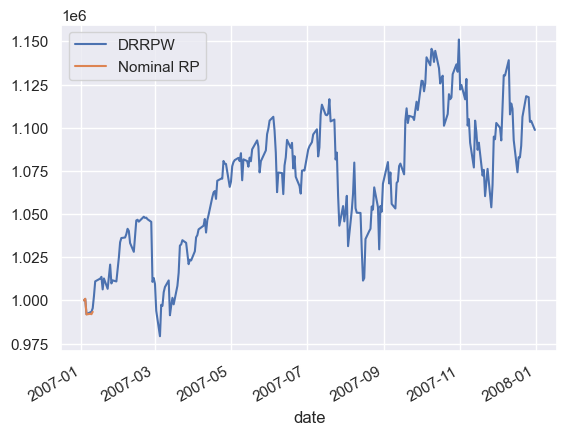

In [32]:
ax = drrpw.plot(x='date', y='Wealth', legend=False)
rp.plot(x='date', y='Wealth', ax=ax, legend=False)
# rp.plot(x='date', y='Wealth', legend=False)
ax.legend(['DRRPW', 'Nominal RP'])
plt.savefig('test.png')

In [27]:
portVal2 = portVal
portVal2['date'] = pd.to_datetime(portVal2['date'])
portVal2 = portVal2.merge(returns[['date','RF']], how='left', on='date')
portVal2['RF'] = portVal2['RF']/365 # Annual risk free rate
portVal2['ret'] = portVal2['Wealth'].pct_change()
portVal2['ExcessRet'] = portVal2['ret'] - portVal2['RF']
SR = portVal2['ExcessRet'].mean()/portVal2['ExcessRet'].std()


-0.3133906609289943

In [ ]:
def calculateSharpe(portVal):
    portVal['RF'] = portVal['RF']/365 # Annual risk free rate
    portVal['ret'] = portVal['Wealth'].pct_change()
    portVal['ExcessRet'] = portVal['ret'] - portVal['RF']
    SR = portVal['ExcessRet'].mean()/portVal['ExcessRet'].std()

    return SR


def plotWealth(holdings):
    print(holdings.head())

def plotHoldings(holdings):
    pass


In [ ]:
TODO:
1. Write Risk Parity solver in CVXOPT
2. Write the new Dist. Robust RP in CVXOPT
3. Figure out how to use cvxpylayers
4. Make wealth, SR and holdings graphs code

C:\Users\Rafay\AppData\Local\Temp\ipykernel_19260\3636925383.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  [x for x in list(round(holdings.sum(axis=1),3)) if x!=1.0]


[]

In [ ]:
from enum import Enum
class Optimizers(Enum):
    MVO = 1
    RP = 2

In [ ]:
Optimizers.MVO

<Optimizers.MVO: 1>